In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from lib.utils import make_dir_permanent
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


# Apprenticeship learning MMA

In [457]:
def show_link(df, download_link=False):
    if download_link:
        df.name.apply(lambda x: None if pexists(f'./loss_figs/{x}.jpg') else os.system(f'rsync -avzL v:/h/kingsley/node/loss_figs/{x}.jpg ./loss_figs/'))

    return HTML(df.to_html(
        render_links=True,
        escape=False,
    ))

In [477]:
df = pd.read_csv('./results/mma_new3.csv')
df['val_a'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/val_a.jpg">link</a>', axis=1)
df['b_val_a'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/best_val_a.jpg">link</a>', axis=1)
df['test_a'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/test_a.jpg">link</a>', axis=1)
df['b_test_a'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/best_test_a.jpg">link</a>', axis=1)
df['r'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/r.jpg">link</a>', axis=1)
df['br'] = df.apply(lambda r: f'<a href="/user/kingsley/view/irl_nodegam/results/figures/{r["name"]}/best_r.jpg">link</a>', axis=1)

In [478]:
show_link(df.iloc[-5:])

There are 2 best val_a. Maybe choose the later one would help?

## 1002: running MMA on the next state v.s. current state

In [399]:
df_tmp = df[df.name.apply(lambda x: x.startswith('1002'))]
df_tmp

name     mdp    opt_r  opt_r_std  bc_val_a  \
4  1002_linearmdp_uniform_g0.9  linear  1.70770  0.007526   1          
7  1002_gammdp_uniform_g0.9     gam    -0.88336  0.002482   1          

   bc_test_a      bc_r  bc_r_std  best_idx  best_val_a  best_test_a   best_r  \
4  0.99968    1.688900  0.023542  7         0.71755     0.73613      1.62890   
7  0.99968   -0.022967  0.009578  100       0.24155     0.24298     -0.97349   

   best_r_std  pi_best_test_a  pi_best_r  fold  seed  gamma     N  precision  \
4  0.013286    0.706800        1.60990    0     321   0.9    5000  0.001       
7  0.007334    0.066703       -0.39449    0     321   0.9    5000  0.001       

   opt_method  pi_init  n_iter disc_state_type  \
4  max_margin  uniform  100     next             
7  max_margin  uniform  100     next             

                                                                                                      val_a  \
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/val_a.jpg">link</a>   
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/val_a.jpg">link</a>      

                                                                                                         b_val_a  \
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/best_val_a.jpg">link</a>   
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/best_val_a.jpg">link</a>      

                                                                                                      test_a  \
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/test_a.jpg">link</a>   
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/test_a.jpg">link</a>      

                                                                                                         b_test_a  \
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/best_test_a.jpg">link</a>   
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/best_test_a.jpg">link</a>      

                                                                                                      r  \
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/r.jpg">link</a>   
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/r.jpg">link</a>      

                                                                                                          br  
4  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_linearmdp_uniform_g0.9/best_r.jpg">link</a>  
7  <a href="/user/kingsley/view/irl_nodegam/results/figures/1002_gammdp_uniform_g0.9/best_r.jpg">link</a>

In [398]:
df_tmp = df[df.name.apply(lambda x: x.startswith('1003'))]
df_tmp

name     mdp    opt_r  opt_r_std  bc_val_a  \
5  1003_Scurrent_gammdp_uniform_g0.9     gam    -0.88336  0.002482   1          
6  1003_Scurrent_linearmdp_uniform_g0.9  linear  1.70770  0.007526   1          

   bc_test_a      bc_r  bc_r_std  best_idx  best_val_a  best_test_a  best_r  \
5  0.99968   -0.022967  0.009578  8         0.34430     0.34100     -1.1920   
6  0.99968    1.688900  0.023542  100       0.74495     0.75973      1.6305   

   best_r_std  pi_best_test_a  pi_best_r  fold  seed  gamma     N  precision  \
5  0.007962    0.062201       -0.41399    0     321   0.9    5000  0.001       
6  0.003685    0.564270        1.39920    0     321   0.9    5000  0.001       

   opt_method  pi_init  n_iter disc_state_type  \
5  max_margin  uniform  100     current          
6  max_margin  uniform  100     current          

                                                                                                               val_a  \
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/val_a.jpg">link</a>      
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/val_a.jpg">link</a>   

                                                                                                                  b_val_a  \
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/best_val_a.jpg">link</a>      
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/best_val_a.jpg">link</a>   

                                                                                                               test_a  \
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/test_a.jpg">link</a>      
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/test_a.jpg">link</a>   

                                                                                                                  b_test_a  \
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/best_test_a.jpg">link</a>      
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/best_test_a.jpg">link</a>   

                                                                                                               r  \
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/r.jpg">link</a>      
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/r.jpg">link</a>   

                                                                                                                   br  
5  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_gammdp_uniform_g0.9/best_r.jpg">link</a>     
6  <a href="/user/kingsley/view/irl_nodegam/results/figures/1003_Scurrent_linearmdp_uniform_g0.9/best_r.jpg">link</a>

In [485]:
df = pd.read_csv('./results/mma_new3.csv')

df_tmp = df[df.name.apply(lambda x: x.startswith('1015'))]
df_tmp

name     mdp    opt_r  opt_r_std  \
17  1015_Scurrent_linearmdp_uniform_g0.9  linear  1.70770  0.007526    
18  1015_Scurrent_gammdp_uniform_g0.9     gam    -0.88336  0.002482    
19  1015_gammdp_uniform_g0.9              gam    -0.88336  0.002482    
20  1015_Scurrent_linearmdp_uniform_g0.5  linear  0.34486  0.005065    
21  1015_Scurrent_gammdp_uniform_g0.5     gam    -0.36073  0.008871    
22  1015_linearmdp_uniform_g0.5           linear  0.34486  0.005065    
23  1015_gammdp_uniform_g0.5              gam    -0.36073  0.008871    
24  1015_linearmdp_uniform_g0.9           linear  1.70770  0.007526    

    bc_val_a  bc_test_a     bc_r  bc_r_std  best_idx  best_val_a  best_test_a  \
17  1         0.99968    1.68890  0.023542  60        0.74495     0.75973       
18  1         0.99968   -0.88817  0.021522  8         0.34430     0.34100       
19  1         0.99968   -0.88817  0.021522  60        0.24125     0.24229       
20  1         0.99959    0.34262  0.001685  1         0.94915     0.94816       
21  1         0.99974   -0.35985  0.004393  1         0.96395     0.96403       
22  1         0.99959    0.34262  0.001685  4         0.96890     0.96692       
23  1         0.99974   -0.35985  0.004393  1         0.95750     0.95929       
24  1         0.99968    1.68890  0.023542  7         0.71755     0.73613       

     best_r  best_r_std  pi_best_test_a  pi_best_r  fold  seed  gamma     N  \
17  1.63050  0.003685    0.564270        1.39920    0     321   0.9    5000   
18 -6.11240  0.026881    0.062201       -6.49500    0     321   0.9    5000   
19 -7.63710  0.040364    0.066568       -6.13550    0     321   0.9    5000   
20  0.31561  0.001206    0.883590        0.27442    0     321   0.5    5000   
21 -1.08070  0.010174    0.665380       -1.16010    0     321   0.5    5000   
22  0.34132  0.003379    0.934550        0.32649    0     321   0.5    5000   
23 -1.11050  0.001483    0.747660       -1.15050    0     321   0.5    5000   
24  1.62890  0.013286    0.706800        1.60990    0     321   0.9    5000   

    precision  opt_method  pi_init  n_iter disc_state_type  
17  0.001      max_margin  uniform  60      current         
18  0.001      max_margin  uniform  60      current         
19  0.001      max_margin  uniform  60      next            
20  0.001      max_margin  uniform  60      current         
21  0.001      max_margin  uniform  60      current         
22  0.001      max_margin  uniform  60      next            
23  0.001      max_margin  uniform  60      next            
24  0.001      max_margin  uniform  60      next

# AIRL MIMIC3 real data

## Baselines

what if always guessing 0,0 actions?

In [55]:
from lib.mimic3.dataset import HypotensionDataset

In [56]:
test_loader = HypotensionDataset.make_loader(
    split='test',
    batch_size=128,
    shuffle=False,
    num_workers=0,
)

In [58]:
total, num = 0, 0
for batch in test_loader:
    states, actions, next_states, dones = HypotensionDataset.extract_s_and_a_pairs(batch)
    
    num += (actions == 0).sum().item()
    total += actions.shape[0]

In [59]:
num / total

0.751127639872151

## NODEGAM model

### 1008 MIMIC3 GAM

In [471]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1008' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(60, 85)


name  \
1955  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
1847  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8     
1856  1008_mimic3_gam_dlr0.0005_aob0_ls0.005_aGAM_nl2_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s120_dn0.0_dns0.8   
1820  1008_mimic3_gam_dlr0.0005_aob1_ls0.005_aGAM_nl1_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s164_dn0.0_dns0.8   
1861  1008_mimic3_gam_dlr0.001_aob0_ls0.005_aGAM_nl3_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s161_dn0.0_dns0.8    
1862  1008_mimic3_gam_dlr0.001_aob1_ls0.005_aGAM_nl3_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s146_dn0.1_dns0.8    
1819  1008_mimic3_gam_dlr0.0008_aob0_ls0.005_aGAM_nl1_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s30_dn0.0_dns0.8    
1956  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl3_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8    
1837  1008_mimic3_gam_dlr0.0005_aob0_ls0.005_aGAM_nl1_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s36_dn0.1_dns0.8    
1920  1008_mimic3_gam_dlr0.001_aob1_ls0.005_aGAM_nl1_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s8_dn0.0_dns0.8      
1960  1008_mimic3_gam_dlr0.0008_aob0_ls0.005_aGAM_nl3_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s86_dn0.1_dns0.8    
1975  1008_mimic3_gam_dlr0.0008_aob0_ls0.01_aGAM_nl3_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s157_dn0.1_dns0.8    
1867  1008_mimic3_gam_dlr0.0005_aob0_ls0.01_aGAM_nl3_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s39_dn0.1_dns0.8     
1843  1008_mimic3_gam_dlr0.0005_aob0_ls0.005_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s86_dn0.0_dns0.8    
1959  1008_mimic3_gam_dlr0.001_aob1_ls0.005_aGAM_nl3_nt300_ad1_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s56_dn0.0_dns0.8     
1864  1008_mimic3_gam_dlr0.0005_aob0_ls0.01_aGAM_nl3_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s47_dn0.1_dns0.8     
1928  1008_mimic3_gam_dlr0.001_aob0_ls0.005_aGAM_nl1_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s43_dn0.0_dns0.8     
1836  1008_mimic3_gam_dlr0.0005_aob0_ls0.005_aGAM_nl2_nt200_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s16_dn0.0_dns0.8    
1852  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl3_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s65_dn0.0_dns0.8     
1992  1008_mimic3_gam_dlr0.001_aob1_ls0.01_aGAM_nl3_nt300_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s184_dn0.1_dns0.8     

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
1955  12     2456         0.75154  0.21093    0.92011        
1847  26     5102         0.75008  0.20543    0.92055        
1856  46     8882         0.74953  0.22400    0.93293        
1820  20     3968         0.74776  0.20241    0.93494        
1861  19     3779         0.74739  0.19512    0.95196        
1862  22     4346         0.74684  0.20397    0.94096        
1819  14     2834         0.74515  0.22015    0.92816        
1956  25     4913         0.74448  0.21365    0.90732        
1837  36     6992         0.74442  0.21502    0.91970        
1920  25     4913         0.74378  0.21082    0.93458        
1960  27     5291         0.74365  0.19847    0.92659        
1975  48     9260         0.74321  0.22662    0.90536        
1867  33     6425         0.74286  0.21008    0.93160        
1843  29     5669         0.74283  0.21082    0.92313        
1959  18     3590         0.74245  0.2115

In [385]:
# df['log_gen_lr'] = np.log10(df['gen_lr'])
# df['log_disc_lr'] = np.log10(df['disc_lr'])
# df['log_gen_wd'] = df['gen_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_disc_wd'] = df['disc_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_l2_lambda'] = df['l2_lambda'].apply(lambda x: np.log10(x) if x > 0 else -7)

# for k in ['noise', 'noise_epochs','batch_size', # general
#           'log_disc_lr', 'log_disc_wd', 'shaping', 'airl_obj', 'airl_anneal_epochs', 'label_smoothing', 'same_act_use_exp', 'disc_state_type', 'ga2m', # disc
#           'disc_arch', 'num_layers', 'num_trees', 'addi_tree_dim', 'depth', 'output_dropout', 'last_dropout', 'colsample_bytree', # disc nodegam
#           'anneal_steps', 'log_l2_lambda', 'dim_att', # disc nodegam
#           'sync_rate', 'beta', 'gen_n_hidden', 'gen_n_layer', 'gen_dropout', 'log_gen_lr', 'log_gen_wd', # generator
#           'update_q_by_gen', 'sample_stdev', 'ent_reg', 'bc_kl', 'bc_kl_anneal', 'use_bn',# generator
#          ]:
#     df.plot.scatter(k, 'val_a')
# #     ax = df.plot.scatter(k, 'train_gen_loss')
# #     ax.set_ylim(0, 50)

### 1008 MIMIC3 Linear

In [383]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1008' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(28, 66)


name  \
212  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8    
204  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8    
188  1008_mimic3_linear_dlr0.0005_aob1_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s162_dn0.0_dns0.8    
220  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s182_dn0.1_dns0.8    
208  1008_mimic3_linear_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s11_dn0.0_dns0.8      
221  1008_mimic3_linear_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s19_dn0.1_dns0.8      
186  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s85_dn0.0_dns0.8     
193  1008_mimic3_linear_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s177_dn0.1_dns0.8   
206  1008_mimic3_linear_dlr0.001_aob1_ls0.01_fnl4_fdr0.5_glr0.0008_bca0.5_s199_dn0.1_dns0.8     
219  1008_mimic3_linear_dlr0.0005_aob0_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s36_dn0.1_dns0.8    
181  1008_mimic3_linear_dlr0.001_aob1_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s61_dn0.1_dns0.8     
199  1008_mimic3_linear_dlr0.001_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s109_dn0.1_dns0.8     
216  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s148_dn0.0_dns0.8    
217  1008_mimic3_linear_dlr0.0008_aob1_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s148_dn0.0_dns0.8   
207  1008_mimic3_linear_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s163_dn0.0_dns0.8     
172  1008_mimic3_linear_dlr0.0008_aob1_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s141_dn0.1_dns0.8   
187  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s198_dn0.0_dns0.8    
200  1008_mimic3_linear_dlr0.0005_aob1_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s151_dn0.0_dns0.8   
218  1008_mimic3_linear_dlr0.0005_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s182_dn0.0_dns0.8    
198  1008_mimic3_linear_dlr0.001_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s57_dn0.0_dns0.8      

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
212  36     6992         0.75644  0.20817    0.92451       0.46500              
204  24     4724         0.74929  0.19355    0.95545       0.39180              
188  10     2078         0.74860  0.20807    0.93762       0.42083              
220  46     8882         0.74611  0.23072    0.91222       0.45806              
208  31     6047         0.74611  0.21271    0.90036       0.47863              
221  43     8315         0.74524  0.22264    0.90352       0.47078              
186  12     2456         0.74514  0.20749    0.94173       0.40423              
193  17     3401         0.74397  0.20251    0.94387       0.39733              
206  26     5102         0.74237  0.19284    0.93657       0.40561              
219  36     6992         0.74159  0.21622    0.91565       0.43976              
181  24     4724         0.74093  0.22127    0.91930       0.43163              
199  13     2645         0.74021  0.20994    0.91202       0.44229              
216  40     7748         0.73999  0.22195    0.91198       0.44174              
217  39     7559         0.73825  0.20731    0.91121       0.43833              
207  19     3779         0.73784  0.22323    0.89976       0.45706              
172  11     2267         0.73630  0.20749    0.91260       0.43058              
187  15     3023         0.73572  0.21699    0.91424       0.42616              
200  23     4535         0.73425  0.20471    0.94632       0.36650              
218  46     8882         0.73345  0.22372    0.89783       0.44842              
198  17     3401         0.73226  0.20587    0.91000       0.42406              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
212  0.69325       0.488590     0.69320          0.47429          
204  0.69352       0.426680     0.69315          0.50000          
188  0.76794       0.029426     0.69700          0.50000          
220  0.69254       0.586330     0.69318          0.49132          
208  0.69376  

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


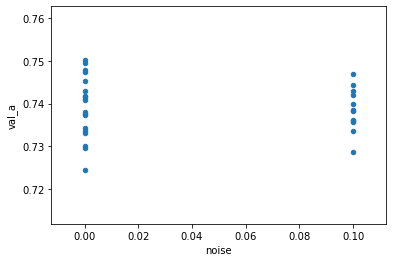

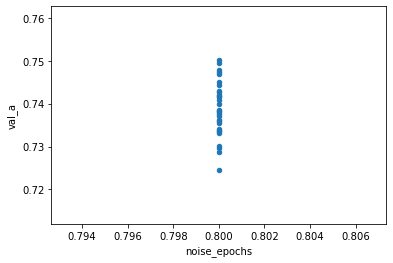

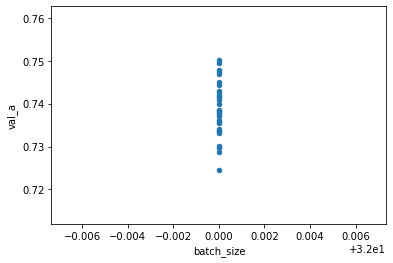

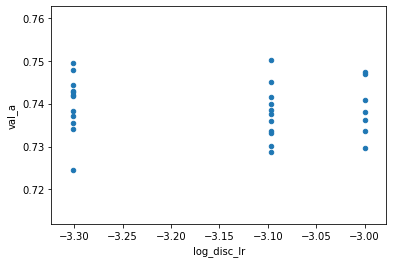

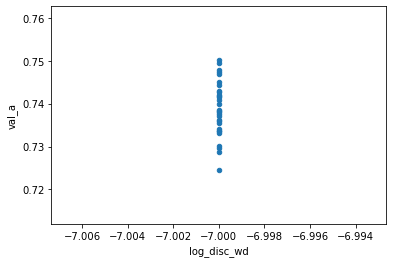

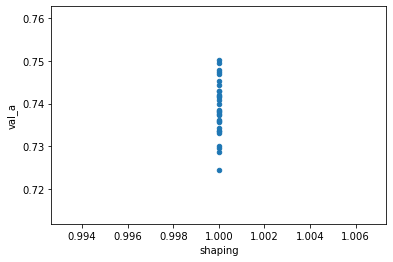

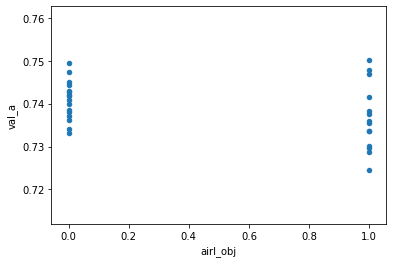

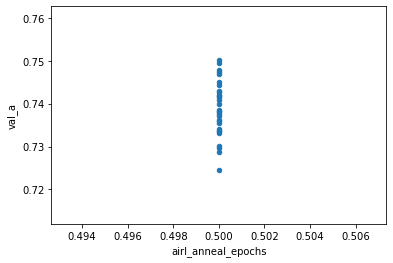

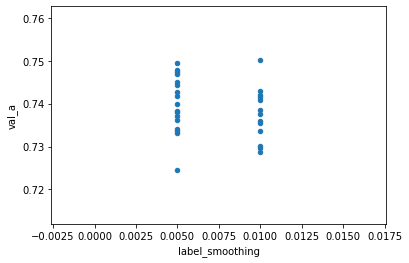

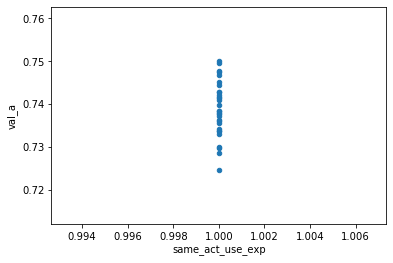

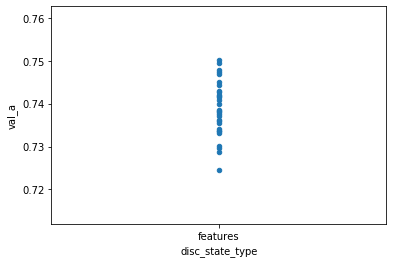

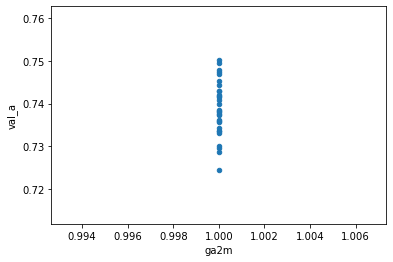

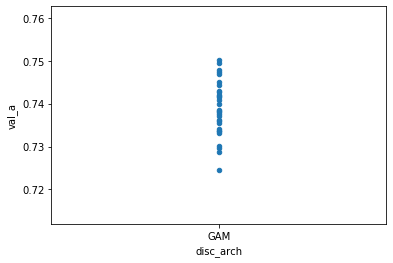

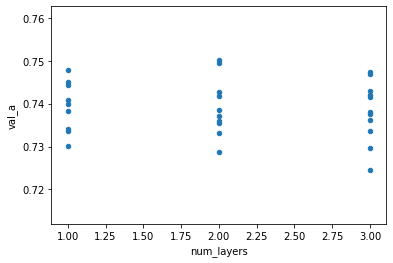

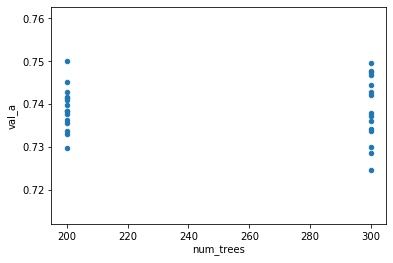

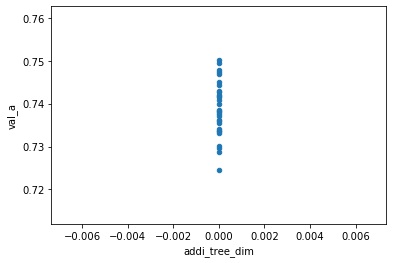

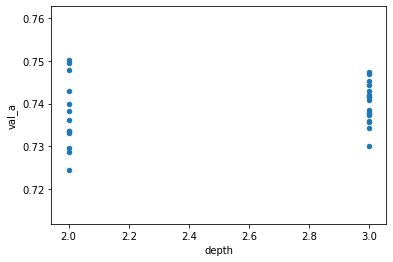

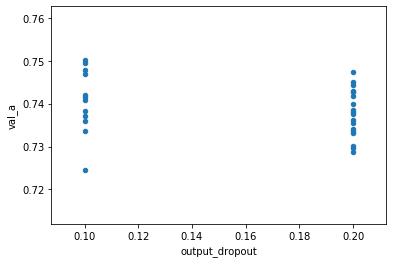

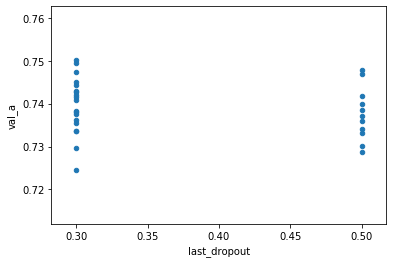

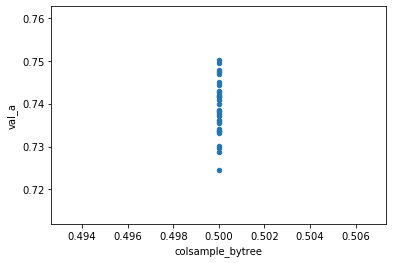

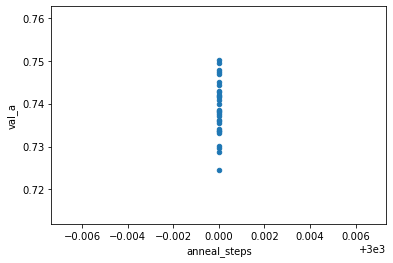

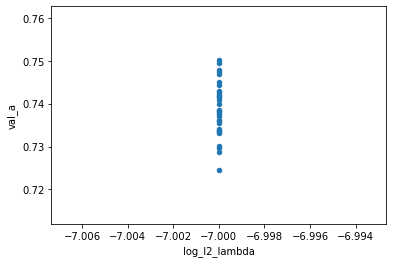

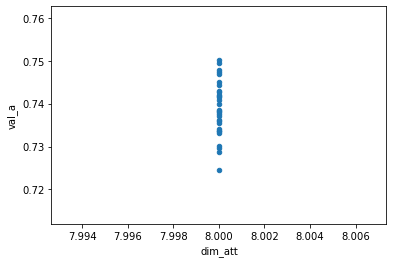

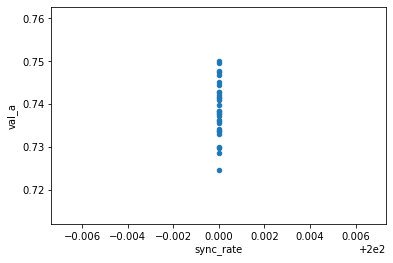

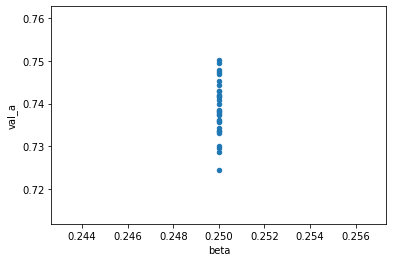

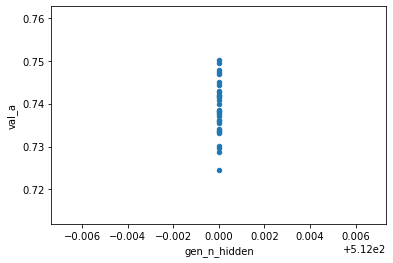

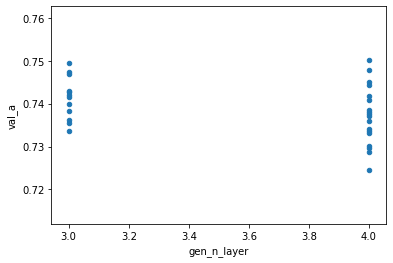

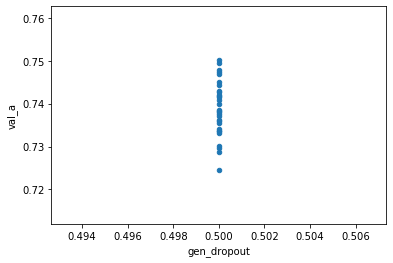

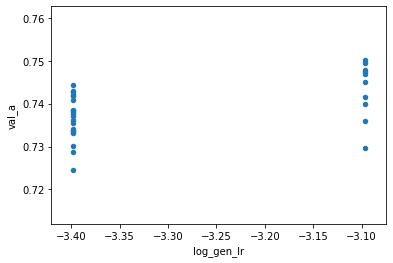

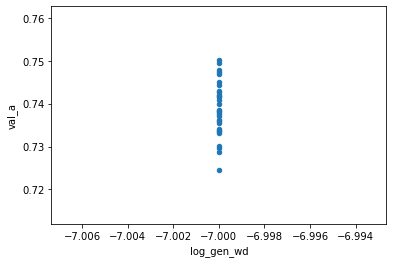

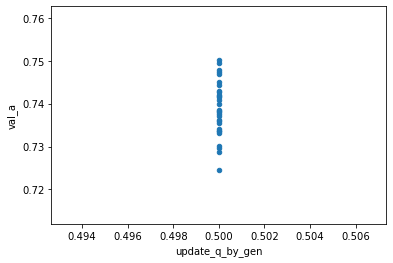

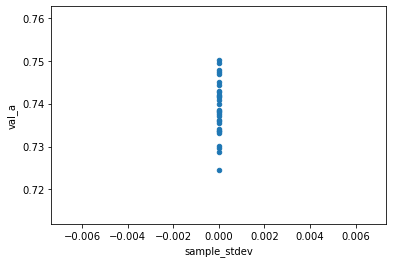

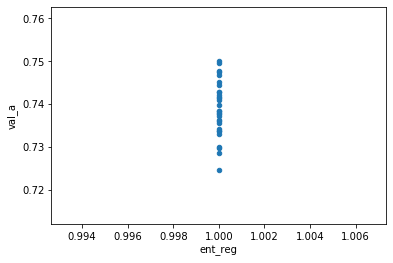

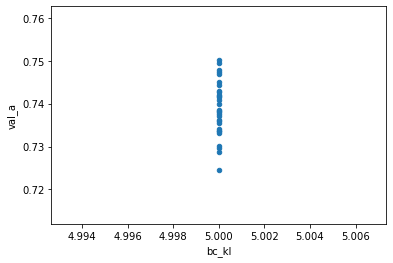

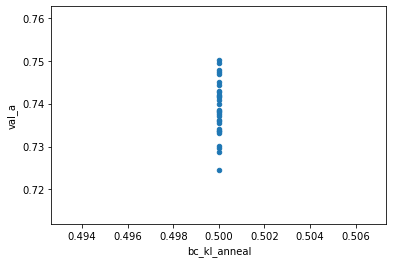

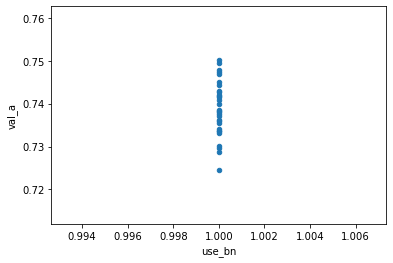

In [380]:
df['log_gen_lr'] = np.log10(df['gen_lr'])
df['log_disc_lr'] = np.log10(df['disc_lr'])
df['log_gen_wd'] = df['gen_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
df['log_disc_wd'] = df['disc_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
df['log_l2_lambda'] = df['l2_lambda'].apply(lambda x: np.log10(x) if x > 0 else -7)

for k in ['noise', 'noise_epochs','batch_size', # general
          'log_disc_lr', 'log_disc_wd', 'shaping', 'airl_obj', 'airl_anneal_epochs', 'label_smoothing', 'same_act_use_exp', 'disc_state_type', 'ga2m', # disc
          'disc_arch', 'num_layers', 'num_trees', 'addi_tree_dim', 'depth', 'output_dropout', 'last_dropout', 'colsample_bytree', # disc nodegam
          'anneal_steps', 'log_l2_lambda', 'dim_att', # disc nodegam
          'sync_rate', 'beta', 'gen_n_hidden', 'gen_n_layer', 'gen_dropout', 'log_gen_lr', 'log_gen_wd', # generator
          'update_q_by_gen', 'sample_stdev', 'ent_reg', 'bc_kl', 'bc_kl_anneal', 'use_bn',# generator
         ]:
    df.plot.scatter(k, 'val_a')
#     ax = df.plot.scatter(k, 'train_gen_loss')
#     ax.set_ylim(0, 50)

In [382]:
# df.plot.scatter('train_disc_auc', 'val_a', c='bc_kl', cmap='seismic', sharex=False)
# df.plot.scatter('test_exp_loss', 'val_a', c='bc_kl', cmap='seismic', sharex=False)

### 1009 MIMIC3 GAM current

In [386]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1009' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(30, 85)


name  \
1859  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8     
1863  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.005_aGAM_nl3_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s194_dn0.0_dns0.8   
1866  1009_mimic3_gam_scurrent_dlr0.0008_aob0_ls0.005_aGAM_nl3_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s113_dn0.1_dns0.8   
1823  1009_mimic3_gam_scurrent_dlr0.001_aob1_ls0.01_aGAM_nl1_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s141_dn0.1_dns0.8     
1844  1009_mimic3_gam_scurrent_dlr0.0005_aob0_ls0.01_aGAM_nl2_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s193_dn0.1_dns0.8    
1868  1009_mimic3_gam_scurrent_dlr0.001_aob0_ls0.005_aGAM_nl3_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s182_dn0.1_dns0.8    
1833  1009_mimic3_gam_scurrent_dlr0.0008_aob0_ls0.005_aGAM_nl2_nt200_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s19_dn0.0_dns0.8    
1860  1009_mimic3_gam_scurrent_dlr0.0005_aob0_ls0.01_aGAM_nl3_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s168_dn0.1_dns0.8    
1825  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl2_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s61_dn0.0_dns0.8     
1834  1009_mimic3_gam_scurrent_dlr0.001_aob0_ls0.01_aGAM_nl1_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s181_dn0.1_dns0.8     
1838  1009_mimic3_gam_scurrent_dlr0.0005_aob0_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s166_dn0.1_dns0.8    
1853  1009_mimic3_gam_scurrent_dlr0.001_aob0_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s126_dn0.0_dns0.8     
1851  1009_mimic3_gam_scurrent_dlr0.001_aob1_ls0.005_aGAM_nl2_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s132_dn0.0_dns0.8    
1821  1009_mimic3_gam_scurrent_dlr0.0008_aob1_ls0.005_aGAM_nl1_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s35_dn0.0_dns0.8    
1857  1009_mimic3_gam_scurrent_dlr0.001_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s184_dn0.0_dns0.8     
1816  1009_mimic3_gam_scurrent_dlr0.001_aob0_ls0.01_aGAM_nl1_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s95_dn0.1_dns0.8      
1842  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl2_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s64_dn0.1_dns0.8     
1824  1009_mimic3_gam_scurrent_dlr0.0008_aob0_ls0.01_aGAM_nl1_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s136_dn0.1_dns0.8    
1826  1009_mimic3_gam_scurrent_dlr0.0008_aob0_ls0.005_aGAM_nl2_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s37_dn0.0_dns0.8    
1858  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s79_dn0.0_dns0.8     

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
1859  23     4535         0.74943  0.21593    0.94097        
1863  28     5480         0.74370  0.20832    0.93607        
1866  46     8882         0.74348  0.22777    0.91240        
1823  23     4535         0.74288  0.21762    0.91124        
1844  21     4157         0.74245  0.20586    0.93998        
1868  47     9071         0.74176  0.22185    0.90662        
1833  32     6236         0.74131  0.21087    0.92817        
1860  48     9260         0.74062  0.23116    0.89949        
1825  24     4724         0.74001  0.22063    0.91185        
1834  40     7748         0.73883  0.22138    0.89064        
1838  26     5102         0.73747  0.21133    0.91110        
1853  36     6992         0.73745  0.21111    0

In [385]:
# df['log_gen_lr'] = np.log10(df['gen_lr'])
# df['log_disc_lr'] = np.log10(df['disc_lr'])
# df['log_gen_wd'] = df['gen_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_disc_wd'] = df['disc_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_l2_lambda'] = df['l2_lambda'].apply(lambda x: np.log10(x) if x > 0 else -7)

# for k in ['noise', 'noise_epochs','batch_size', # general
#           'log_disc_lr', 'log_disc_wd', 'shaping', 'airl_obj', 'airl_anneal_epochs', 'label_smoothing', 'same_act_use_exp', 'disc_state_type', 'ga2m', # disc
#           'disc_arch', 'num_layers', 'num_trees', 'addi_tree_dim', 'depth', 'output_dropout', 'last_dropout', 'colsample_bytree', # disc nodegam
#           'anneal_steps', 'log_l2_lambda', 'dim_att', # disc nodegam
#           'sync_rate', 'beta', 'gen_n_hidden', 'gen_n_layer', 'gen_dropout', 'log_gen_lr', 'log_gen_wd', # generator
#           'update_q_by_gen', 'sample_stdev', 'ent_reg', 'bc_kl', 'bc_kl_anneal', 'use_bn',# generator
#          ]:
#     df.plot.scatter(k, 'val_a')
# #     ax = df.plot.scatter(k, 'train_gen_loss')
# #     ax.set_ylim(0, 50)

### 1009 MIMIC3 Linear current

In [387]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1009' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(27, 66)


name  \
196  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8     
189  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s47_dn0.1_dns0.8    
211  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s142_dn0.0_dns0.8     
214  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s185_dn0.0_dns0.8   
194  1009_mimic3_linear_scurrent_dlr0.0005_aob1_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s165_dn0.0_dns0.8   
167  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s61_dn0.1_dns0.8     
210  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s153_dn0.0_dns0.8    
209  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s17_dn0.1_dns0.8     
197  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s157_dn0.0_dns0.8    
192  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s52_dn0.1_dns0.8     
203  1009_mimic3_linear_scurrent_dlr0.0005_aob1_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s165_dn0.1_dns0.8   
201  1009_mimic3_linear_scurrent_dlr0.0005_aob1_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s82_dn0.1_dns0.8     
184  1009_mimic3_linear_scurrent_dlr0.0005_aob0_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s17_dn0.1_dns0.8    
182  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.01_fnl4_fdr0.5_glr0.0008_bca0.5_s68_dn0.1_dns0.8     
213  1009_mimic3_linear_scurrent_dlr0.0008_aob0_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s92_dn0.1_dns0.8    
180  1009_mimic3_linear_scurrent_dlr0.0005_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s189_dn0.0_dns0.8    
173  1009_mimic3_linear_scurrent_dlr0.0008_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s185_dn0.0_dns0.8    
183  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s171_dn0.0_dns0.8    
175  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s12_dn0.0_dns0.8      
205  1009_mimic3_linear_scurrent_dlr0.0008_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s10_dn0.0_dns0.8     

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
196  24     4724         0.74478  0.21212    0.91410       0.45117              
189  21     4157         0.74466  0.19605    0.96287       0.36628              
211  39     7559         0.74151  0.20712    0.93987       0.39754              
214  47     9071         0.74076  0.22735    0.90233       0.46057              
194  20     3968         0.74074  0.21627    0.90529       0.45542              
167  24     4724         0.74047  0.21543    0.93322       0.40624              
210  35     6803         0.74015  0.20881    0.93104       0.40913              
209  33     6425         0.73922  0.21956    0.91489       0.43459              
197  31     6047         0.73916  0.20957    0.93325       0.40260              
192  25     4913         0.73909  0.22047    0.92628       0.41450              
203  31     6047         0.73907  0.21228    0.91024       0.44227              
201  27     5291         0.73586  0.19667    0.94356       0.37570              
184  33     6425         0.73431  0.22191    0.91714       0.41729              
182  20     3968         0.73422  0.19136    0.95238       0.35593              
213  43     8315         0.73389  0.21845    0.91062       0.42742              
180  22     4346         0.73359  0.22030    0.90587       0.43486              
173  43     8315         0.73310  0.21701    0.89824       0.44673              
183  47     9071         0.73243  0.22018    0.90885       0.42649              
175  34     6614         0.73144  0.20913    0.90668       0.42755              
205  35     6803         0.73085  0.21479    0.91521       0.41115              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
196  0.69264       0.517400     0.69314          0.49776          
189  0.69277       0.517350     0.6

In [390]:
# df['log_gen_lr'] = np.log10(df['gen_lr'])
# df['log_disc_lr'] = np.log10(df['disc_lr'])
# df['log_gen_wd'] = df['gen_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_disc_wd'] = df['disc_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_l2_lambda'] = df['l2_lambda'].apply(lambda x: np.log10(x) if x > 0 else -7)

# for k in ['noise', 'noise_epochs','batch_size', # general
#           'log_disc_lr', 'log_disc_wd', 'shaping', 'airl_obj', 'airl_anneal_epochs', 'label_smoothing', 'same_act_use_exp', 'disc_state_type', 'ga2m', # disc
#           'disc_arch', 'num_layers', 'num_trees', 'addi_tree_dim', 'depth', 'output_dropout', 'last_dropout', 'colsample_bytree', # disc nodegam
#           'anneal_steps', 'log_l2_lambda', 'dim_att', # disc nodegam
#           'sync_rate', 'beta', 'gen_n_hidden', 'gen_n_layer', 'gen_dropout', 'log_gen_lr', 'log_gen_wd', # generator
#           'update_q_by_gen', 'sample_stdev', 'ent_reg', 'bc_kl', 'bc_kl_anneal', 'use_bn',# generator
#          ]:
#     df.plot.scatter(k, 'val_a')
# #     ax = df.plot.scatter(k, 'train_gen_loss')
# #     ax.set_ylim(0, 50)

### 1010 MIMIC3 FCNN

In [391]:
df = pd.read_csv('./results/AIRL_MIMIC3_FCNN_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1010' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(25, 65)


name  \
23  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8     
31  1010_mimic3_fcnn_dlr0.001_aob0_ls0.01_dnl5_dnh32_ddr0.5_fnl3_fdr0.5_glr0.0008_bca0.5_s112_dn0.1_dns0.8      
34  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh128_ddr0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s36_dn0.1_dns0.8     
18  1010_mimic3_fcnn_dlr0.001_aob0_ls0.01_dnl3_dnh256_ddr0.3_fnl3_fdr0.5_glr0.0008_bca0.5_s26_dn0.1_dns0.8      
48  1010_mimic3_fcnn_dlr0.001_aob1_ls0.005_dnl5_dnh256_ddr0.3_fnl3_fdr0.5_glr0.0004_bca0.5_s196_dn0.0_dns0.8    
40  1010_mimic3_fcnn_dlr0.001_aob0_ls0.01_dnl2_dnh128_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s100_dn0.1_dns0.8     
14  1010_mimic3_fcnn_dlr0.0008_aob0_ls0.005_dnl3_dnh128_ddr0.5_fnl4_fdr0.5_glr0.0008_bca0.5_s140_dn0.0_dns0.8   
11  1010_mimic3_fcnn_dlr0.0005_aob0_ls0.01_dnl2_dnh64_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s69_dn0.0_dns0.8      
33  1010_mimic3_fcnn_dlr0.0005_aob1_ls0.005_dnl5_dnh128_ddr0.5_fnl4_fdr0.5_glr0.0008_bca0.5_s110_dn0.0_dns0.8   
21  1010_mimic3_fcnn_dlr0.0005_aob0_ls0.005_dnl5_dnh256_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s14_dn0.0_dns0.8    
10  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl5_dnh256_ddr0.3_fnl4_fdr0.5_glr0.0008_bca0.5_s56_dn0.1_dns0.8     
0   1010_mimic3_fcnn_dlr0.0005_aob0_ls0.005_dnl2_dnh256_ddr0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s42_dn0.0_dns0.8    
9   1010_mimic3_fcnn_dlr0.0008_aob1_ls0.005_dnl2_dnh64_ddr0.3_fnl4_fdr0.5_glr0.0004_bca0.5_s139_dn0.1_dns0.8    
29  1010_mimic3_fcnn_dlr0.0008_aob0_ls0.005_dnl3_dnh32_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s92_dn0.1_dns0.8     
4   1010_mimic3_fcnn_dlr0.0008_aob0_ls0.01_dnl2_dnh64_ddr0.3_fnl4_fdr0.5_glr0.0008_bca0.5_s156_dn0.0_dns0.8     
38  1010_mimic3_fcnn_dlr0.0005_aob1_ls0.005_dnl4_dnh64_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s13_dn0.0_dns0.8     
42  1010_mimic3_fcnn_dlr0.0005_aob1_ls0.01_dnl4_dnh32_ddr0.3_fnl3_fdr0.5_glr0.0004_bca0.5_s180_dn0.1_dns0.8     
19  1010_mimic3_fcnn_dlr0.001_aob1_ls0.005_dnl3_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s68_dn0.0_dns0.8      
44  1010_mimic3_fcnn_dlr0.001_aob1_ls0.005_dnl3_dnh32_ddr0.3_fnl3_fdr0.5_glr0.0004_bca0.5_s25_dn0.1_dns0.8      
26  1010_mimic3_fcnn_dlr0.0008_aob1_ls0.01_dnl5_dnh128_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s19_dn0.1_dns0.8     

    epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
23  20     3968         0.74947  0.20525    0.95056       0.40076              
31  18     3590         0.74854  0.23123    0.93186       0.43066              
34  36     6992         0.74833  0.21889    0.92226       0.44672              
18  19     3779         0.74799  0.21533    0.90949       0.46793              
48  30     5858         0.74079  0.21531    0.92790       0.41633              
40  47     9071         0.74075  0.23655    0.90638       0.45354              
14  12     2456         0.74063  0.21786    0.92616       0.41891              
11  19     3779         0.73944  0.20963    0.91914       0.42782              
33  20     3968         0.73786  0.21399    0.91114       0.43737              
21  20     3968         0.73714  0.20534    0.91797       0.42358              
10  13     2645         0.73664  0.19743    0.94573       0.37406              
0   43     8315         0.73554  0.21931    0.89200       0.46423              
9   14     2834         0.73503  0.21923    0.89998       0.44901              
29  27     5291         0.73430  0.21686    0.91173       0.42663              
4   13     2645         0.73354  0.21327    0.91000       0.42754              
38  32     6236         0.73267  0.21209    0.91074       0.42388              
42  34     6614         0.73215  0.21301    0.90261       0.43657              
19  13     2645         0.73201  0.20082    0.89872       0.44291              
44  40     7748         0.73113  0.21196    0.89392       0.44886              
26  10     2078         0.73097  0.20363    0.93760       0.37267              

    val_exp_loss  val_exp_acc  train_disc_loss  tr

### 1010 MIMIC3 FCNN (current)

In [392]:
df = pd.read_csv('./results/AIRL_MIMIC3_FCNN_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1011' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(25, 65)


name  \
39  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8       
37  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.005_dnl3_dnh256_ddr0.3_fnl3_fdr0.5_glr0.0004_bca0.5_s43_dn0.1_dns0.8     
47  1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.01_dnl5_dnh32_ddr0.3_fnl3_fdr0.5_glr0.0008_bca0.5_s105_dn0.0_dns0.8      
45  1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.01_dnl4_dnh64_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s42_dn0.0_dns0.8       
35  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.005_dnl5_dnh256_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s14_dn0.1_dns0.8     
27  1011_mimic3_fcnn_scurrent_dlr0.0005_aob0_ls0.01_dnl3_dnh256_ddr0.5_fnl4_fdr0.5_glr0.0008_bca0.5_s110_dn0.0_dns0.8    
32  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl3_dnh256_ddr0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s149_dn0.0_dns0.8     
30  1011_mimic3_fcnn_scurrent_dlr0.0005_aob1_ls0.005_dnl2_dnh64_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s196_dn0.1_dns0.8    
36  1011_mimic3_fcnn_scurrent_dlr0.0005_aob1_ls0.005_dnl4_dnh32_ddr0.5_fnl3_fdr0.5_glr0.0004_bca0.5_s126_dn0.1_dns0.8    
49  1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.01_dnl5_dnh128_ddr0.3_fnl4_fdr0.5_glr0.0008_bca0.5_s43_dn0.1_dns0.8      
43  1011_mimic3_fcnn_scurrent_dlr0.0008_aob0_ls0.005_dnl5_dnh64_ddr0.3_fnl3_fdr0.5_glr0.0004_bca0.5_s41_dn0.0_dns0.8     
2   1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.01_dnl2_dnh32_ddr0.5_fnl4_fdr0.5_glr0.0004_bca0.5_s23_dn0.0_dns0.8       
12  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl5_dnh128_ddr0.3_fnl4_fdr0.5_glr0.0004_bca0.5_s191_dn0.1_dns0.8     
46  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.005_dnl5_dnh128_ddr0.5_fnl4_fdr0.5_glr0.0008_bca0.5_s101_dn0.1_dns0.8    
28  1011_mimic3_fcnn_scurrent_dlr0.0008_aob0_ls0.005_dnl5_dnh256_ddr0.3_fnl3_fdr0.5_glr0.0008_bca0.5_s41_dn0.0_dns0.8    
17  1011_mimic3_fcnn_scurrent_dlr0.0005_aob0_ls0.005_dnl2_dnh256_ddr0.5_fnl3_fdr0.5_glr0.0008_bca0.5_s155_dn0.1_dns0.8   
15  1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.005_dnl2_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s170_dn0.0_dns0.8     
20  1011_mimic3_fcnn_scurrent_dlr0.001_aob0_ls0.01_dnl5_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s72_dn0.1_dns0.8       
13  1011_mimic3_fcnn_scurrent_dlr0.0005_aob0_ls0.01_dnl2_dnh128_ddr0.5_fnl4_fdr0.5_glr0.0008_bca0.5_s118_dn0.1_dns0.8    
24  1011_mimic3_fcnn_scurrent_dlr0.0005_aob0_ls0.005_dnl3_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s157_dn0.0_dns0.8    

    epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
39  26     5102         0.74655  0.21150    0.90948       0.46403              
37  35     6803         0.74589  0.22350    0.91566       0.45151              
47  38     7370         0.74519  0.20909    0.92148       0.43949              
45  44     8504         0.74437  0.22687    0.90662       0.46301              
35  20     3968         0.74270  0.21444    0.91633       0.44162              
27  20     3968         0.74233  0.21521    0.90988       0.45179              
32  24     4724         0.74153  0.21698    0.91362       0.44310              
30  30     5858         0.74142  0.21158    0.92495       0.42317              
36  29     5669         0.73868  0.21002    0.92210       0.42063              
49  40     7748         0.73842  0.20150    0.90682       0.44640              
43  33     6425         0.73804  0.21294    0.91224       0.43596              
2   21     4157         0.73565  0.21083    0.92009       0.41582              
12  21     4157         0.73424  0.20585    0.90675       0.43510              
46  20     3968         0.73419  0.21475    0.90241       0.44249              
28  31     6047         0.73379  0.19720    0.95736       0.34611              
17  39     7559         0.73324  0.20389    0.93394       0.38520              
15  45     8693         0.73284  0.21352    0.90000       0.44298              
20  28     5480         0.73205  0.20145    0.92671       0.39451              
13  44     8504         0.73059

In [390]:
# df['log_gen_lr'] = np.log10(df['gen_lr'])
# df['log_disc_lr'] = np.log10(df['disc_lr'])
# df['log_gen_wd'] = df['gen_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_disc_wd'] = df['disc_wd'].apply(lambda x: np.log10(x) if x > 0 else -7)
# df['log_l2_lambda'] = df['l2_lambda'].apply(lambda x: np.log10(x) if x > 0 else -7)

# for k in ['noise', 'noise_epochs','batch_size', # general
#           'log_disc_lr', 'log_disc_wd', 'shaping', 'airl_obj', 'airl_anneal_epochs', 'label_smoothing', 'same_act_use_exp', 'disc_state_type', 'ga2m', # disc
#           'disc_arch', 'num_layers', 'num_trees', 'addi_tree_dim', 'depth', 'output_dropout', 'last_dropout', 'colsample_bytree', # disc nodegam
#           'anneal_steps', 'log_l2_lambda', 'dim_att', # disc nodegam
#           'sync_rate', 'beta', 'gen_n_hidden', 'gen_n_layer', 'gen_dropout', 'log_gen_lr', 'log_gen_wd', # generator
#           'update_q_by_gen', 'sample_stdev', 'ent_reg', 'bc_kl', 'bc_kl_anneal', 'use_bn',# generator
#          ]:
#     df.plot.scatter(k, 'val_a')
# #     ax = df.plot.scatter(k, 'train_gen_loss')
# #     ax.set_ylim(0, 50)

### 1014 MIMIC3 No bc

In [413]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1014' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(40, 85)


name  \
1908  1014_mimic3_gam_nobc_dlr0.0008_aob1_ls0.01_aGAM_nl3_nt300_ad1_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca-1_s117_dn0.1_dns0.8    
1870  1014_mimic3_gam_nobc_dlr0.001_aob0_ls0.005_aGAM_nl1_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s171_dn0.1_dns0.8    
1899  1014_mimic3_gam_nobc_dlr0.0005_aob0_ls0.005_aGAM_nl3_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca-1_s150_dn0.1_dns0.8   
1887  1014_mimic3_gam_nobc_dlr0.0005_aob1_ls0.005_aGAM_nl2_nt400_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s188_dn0.1_dns0.8   
1871  1014_mimic3_gam_nobc_dlr0.0008_aob1_ls0.005_aGAM_nl1_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca-1_s125_dn0.1_dns0.8   
1898  1014_mimic3_gam_nobc_dlr0.0008_aob0_ls0.005_aGAM_nl3_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s79_dn0.1_dns0.8    
1906  1014_mimic3_gam_nobc_dlr0.001_aob1_ls0.01_aGAM_nl3_nt300_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca-1_s149_dn0.0_dns0.8     
1889  1014_mimic3_gam_nobc_dlr0.001_aob0_ls0.005_aGAM_nl2_nt400_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s127_dn0.1_dns0.8    
1897  1014_mimic3_gam_nobc_dlr0.0008_aob1_ls0.01_aGAM_nl3_nt200_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s62_dn0.0_dns0.8     
1875  1014_mimic3_gam_nobc_dlr0.001_aob0_ls0.01_aGAM_nl1_nt300_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s29_dn0.0_dns0.8      
1891  1014_mimic3_gam_nobc_dlr0.0005_aob0_ls0.005_aGAM_nl2_nt300_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s87_dn0.0_dns0.8    
1880  1014_mimic3_gam_nobc_dlr0.001_aob0_ls0.01_aGAM_nl1_nt300_ad1_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca-1_s166_dn0.0_dns0.8     
1882  1014_mimic3_gam_nobc_dlr0.0005_aob1_ls0.005_aGAM_nl1_nt300_ad1_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s67_dn0.1_dns0.8    
1884  1014_mimic3_gam_nobc_dlr0.001_aob0_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s77_dn0.0_dns0.8      
1883  1014_mimic3_gam_nobc_dlr0.001_aob1_ls0.01_aGAM_nl1_nt400_ad1_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s189_dn0.0_dns0.8     
1873  1014_mimic3_gam_nobc_dlr0.001_aob1_ls0.005_aGAM_nl1_nt200_ad1_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca-1_s67_dn0.0_dns0.8     
1894  1014_mimic3_gam_nobc_dlr0.0008_aob0_ls0.005_aGAM_nl2_nt400_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s6_dn0.0_dns0.8     
1893  1014_mimic3_gam_nobc_dlr0.0005_aob1_ls0.01_aGAM_nl2_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s58_dn0.1_dns0.8     
1879  1014_mimic3_gam_nobc_dlr0.0005_aob0_ls0.01_aGAM_nl1_nt300_ad1_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s149_dn0.0_dns0.8    
1902  1014_mimic3_gam_nobc_dlr0.0008_aob0_ls0.005_aGAM_nl3_nt400_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s187_dn0.1_dns0.8   

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
1908  0      188          0.53948  0.18280    0.71445        
1870  0      188          0.53402  0.19369    0.69974        
1899  0      188          0.52050  0.18304    0.67151        
1887  0      188          0.51669  0.18662    0.67613        
1871  0      188          0.51478  0.18418    0.66993        
1898  0      188          0.51318  0.19979    0.66567        
1906  0      188          0.50548  0.18008    0.66223        
1889  0      188          0.50473  0.20123    0.61901        
1897  0      188          0.49995  0.17452    0.67122        
1875  0      188          0.48978  0.14505    0.70670        
1891  0      188          0.47492  0.18060    0.64804        
1880  0      188          0.46137  0.17543    0.65524        
1882  0      188          0.45526  0.19817    0.56235        
1884  0      188       

### 1014 MIMIC3 w/ gamma=0.5

In [423]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1014' in x and 'g0.5' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(29, 85)


name  \
1993  1014_mimic3_gam_g0.5_dlr0.0008_aob0_ls0.01_aGAM_nl3_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s141_dn0.1_dns0.8    
1984  1014_mimic3_gam_g0.5_dlr0.0008_aob0_ls0.01_aGAM_nl1_nt300_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8    
1970  1014_mimic3_gam_g0.5_dlr0.0005_aob0_ls0.01_aGAM_nl1_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s84_dn0.1_dns0.8     
1973  1014_mimic3_gam_g0.5_dlr0.0008_aob1_ls0.01_aGAM_nl1_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s11_dn0.0_dns0.8     
1967  1014_mimic3_gam_g0.5_dlr0.001_aob1_ls0.01_aGAM_nl1_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s66_dn0.1_dns0.8      
1989  1014_mimic3_gam_g0.5_dlr0.0005_aob1_ls0.01_aGAM_nl2_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s125_dn0.0_dns0.8    
1997  1014_mimic3_gam_g0.5_dlr0.0008_aob1_ls0.01_aGAM_nl3_nt200_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s169_dn0.1_dns0.8    
1988  1014_mimic3_gam_g0.5_dlr0.001_aob1_ls0.005_aGAM_nl2_nt300_ad1_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s125_dn0.1_dns0.8    
1994  1014_mimic3_gam_g0.5_dlr0.001_aob1_ls0.005_aGAM_nl3_nt300_ad1_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s183_dn0.0_dns0.8    
1979  1014_mimic3_gam_g0.5_dlr0.0008_aob0_ls0.005_aGAM_nl2_nt200_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0004_bca0.5_s94_dn0.0_dns0.8    
1977  1014_mimic3_gam_g0.5_dlr0.0005_aob0_ls0.01_aGAM_nl2_nt200_ad1_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s134_dn0.1_dns0.8    
1972  1014_mimic3_gam_g0.5_dlr0.0008_aob1_ls0.005_aGAM_nl1_nt200_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s150_dn0.1_dns0.8   
1986  1014_mimic3_gam_g0.5_dlr0.0008_aob0_ls0.01_aGAM_nl3_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca0.5_s81_dn0.1_dns0.8     
1971  1014_mimic3_gam_g0.5_dlr0.0005_aob1_ls0.01_aGAM_nl1_nt200_ad0_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s143_dn0.0_dns0.8    
1995  1014_mimic3_gam_g0.5_dlr0.0008_aob0_ls0.005_aGAM_nl3_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s74_dn0.1_dns0.8    
1964  1014_mimic3_gam_g0.5_dlr0.0008_aob1_ls0.005_aGAM_nl1_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca0.5_s152_dn0.1_dns0.8   
1996  1014_mimic3_gam_g0.5_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt300_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s193_dn0.0_dns0.8    
1987  1014_mimic3_gam_g0.5_dlr0.0005_aob1_ls0.005_aGAM_nl2_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca0.5_s55_dn0.0_dns0.8    
1974  1014_mimic3_gam_g0.5_dlr0.001_aob0_ls0.005_aGAM_nl2_nt200_ad1_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s99_dn0.1_dns0.8     
1965  1014_mimic3_gam_g0.5_dlr0.0005_aob0_ls0.01_aGAM_nl1_nt200_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca0.5_s105_dn0.1_dns0.8    

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
1993  23     4535         0.74510  0.22269    0.91487        
1984  25     4913         0.73932  0.22477    0.89547        
1970  15     3023         0.73642  0.21362    0.91161        
1973  17     3401         0.73614  0.22204    0.89741        
1967  12     2456         0.73558  0.22350    0.88504        
1989  24     4724         0.73520  0.21784    0.90364        
1997  20     3968         0.73441  0.21628    0.91798        
1988  24     4724         0.73433  0.21376    0.90480        
1994  16     3212         0.73418  0.21735    0.92293        
1979  11     2267         0.73364  0.21891    0.88666        
1977  10     2078         0.73274  0.20224    0.92038        
1972  22     4346         0.73104  0.21956    0.89282        
1986  13     2645         0.73096  0.21475    0.90179        
197

In [424]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1014' in x and 'g0.5' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(28, 66)


name  \
293  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s123_dn0.0_dns0.8    
289  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s171_dn0.1_dns0.8     
283  1014_mimic3_linear_g0.5_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s63_dn0.1_dns0.8     
290  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s23_dn0.1_dns0.8    
280  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s93_dn0.0_dns0.8      
300  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s114_dn0.1_dns0.8   
301  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s18_dn0.0_dns0.8     
297  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s53_dn0.0_dns0.8     
278  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.0_dns0.8     
288  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.0_dns0.8    
277  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s7_dn0.1_dns0.8       
282  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.1_dns0.8    
292  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s65_dn0.0_dns0.8     
294  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s127_dn0.1_dns0.8   
287  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s187_dn0.0_dns0.8   
295  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s106_dn0.1_dns0.8     
296  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.01_fnl4_fdr0.5_glr0.0008_bca0.5_s127_dn0.0_dns0.8    
302  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s115_dn0.0_dns0.8    
279  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s67_dn0.0_dns0.8     
298  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s69_dn0.1_dns0.8      

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
293  11     2267         0.73644  0.21424    0.90446       0.44507              
289  10     2078         0.73610  0.21374    0.90372       0.44544              
283  11     2267         0.73597  0.20195    0.93381       0.39290              
290  26     5102         0.73518  0.22295    0.89173       0.46372              
280  16     3212         0.73325  0.21418    0.91990       0.40957              
300  23     4535         0.73217  0.21294    0.92139       0.40403              
301  21     4157         0.73207  0.21575    0.90052       0.43997              
297  11     2267         0.73199  0.22133    0.88526       0.46622              
278  23     4535         0.73150  0.21671    0.90051       0.43844              
288  23     4535         0.73145  0.21677    0.90039       0.43850              
277  11     2267         0.73099  0.20757    0.90934       0.42172              
282  23     4535         0.73069  0.21973    0.89731       0.44175              
292  11     2267         0.73064  0.21095    0.90993       0.41975              
294  19     3779         0.72985  0.21170    0.91366       0.41112              
287  26     5102         0.72983  0.21113    0.91341       0.41149              
295  19     3779         0.72971  0.21910    0.90233       0.43037              
296  19     3779         0.72923  0.20629    0.91972       0.39890              
302  27     5291         0.72907  0.21778    0.90535       0.42339              
279  13     2645         0.72796  0.21056    0.90816       0.41548              
298  15     3023         0.72786  0.21688    0.89732       0.43401              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
293  0.69226       0.656560     0.69315          0.50000          
289  0.69144       0.612670     0.69302          0.53093          
283  0.69229       0.609930     0.69307         

### 1015 MIMIC3 No BC w/ gamma=0.5

In [425]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1015' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(29, 85)


name  \
2010  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob0_ls0.005_aGAM_nl2_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s175_dn0.0_dns0.8    
2003  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob0_ls0.01_aGAM_nl1_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca-1_s142_dn0.1_dns0.8    
2025  1015_mimic3_gam_g0.5_nobc_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s74_dn0.1_dns0.8    
1999  1015_mimic3_gam_g0.5_nobc_dlr0.0008_aob1_ls0.005_aGAM_nl1_nt200_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s194_dn0.0_dns0.8   
2027  1015_mimic3_gam_g0.5_nobc_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt300_ad1_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s89_dn0.1_dns0.8    
2008  1015_mimic3_gam_g0.5_nobc_dlr0.0008_aob0_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s87_dn0.1_dns0.8     
2009  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob1_ls0.005_aGAM_nl2_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s117_dn0.1_dns0.8    
2022  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob0_ls0.01_aGAM_nl3_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s170_dn0.0_dns0.8     
2013  1015_mimic3_gam_g0.5_nobc_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt300_ad0_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0004_bca-1_s73_dn0.1_dns0.8     
2016  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob0_ls0.005_aGAM_nl2_nt300_ad1_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s33_dn0.1_dns0.8    
2000  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob0_ls0.005_aGAM_nl1_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0004_bca-1_s186_dn0.1_dns0.8    
2006  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob0_ls0.01_aGAM_nl1_nt300_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca-1_s155_dn0.0_dns0.8    
2023  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob1_ls0.005_aGAM_nl3_nt300_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl4_fdr0.5_glr0.0008_bca-1_s30_dn0.0_dns0.8    
2012  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob0_ls0.01_aGAM_nl2_nt200_ad1_td3_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca-1_s153_dn0.1_dns0.8    
2017  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob0_ls0.01_aGAM_nl2_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca-1_s42_dn0.1_dns0.8      
2021  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob1_ls0.01_aGAM_nl3_nt300_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca-1_s185_dn0.1_dns0.8     
2011  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob1_ls0.01_aGAM_nl2_nt200_ad1_td3_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca-1_s155_dn0.0_dns0.8     
2019  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob1_ls0.01_aGAM_nl2_nt200_ad1_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s142_dn0.1_dns0.8     
2002  1015_mimic3_gam_g0.5_nobc_dlr0.0005_aob1_ls0.01_aGAM_nl1_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s115_dn0.0_dns0.8    
2005  1015_mimic3_gam_g0.5_nobc_dlr0.001_aob1_ls0.01_aGAM_nl1_nt300_ad0_td4_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0004_bca-1_s123_dn0.1_dns0.8     

      epoch  global_step     val_a  val_bal_a  val_act0_acc  \
2010  10     2078         0.162060  0.079334   0.214260       
2003  13     2645         0.146770  0.078519   0.191810       
2025  12     2456         0.136140  0.078223   0.174430       
1999  12     2456         0.131110  0.076485   0.153570       
2027  11     2267         0.128250  0.098796   0.117760       
2008  10     2078         0.121070  0.088420   0.142500       
2009  16     3212         0.117250  0.087554   0.128130       
2022  10     2078         0.100940  0.067589   0.115280       
2013  11     2267         0.100800  0.080596   0.118270       
2016  14     2834         0.098680  0.072166   0.108120       
2000  10     2078         0.098613  0.084533   0.105160       
2006  13     2645         0.097732 

In [424]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1014' in x and 'g0.5' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
print(df.shape)
df.head(20)

(28, 66)


name  \
293  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s123_dn0.0_dns0.8    
289  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s171_dn0.1_dns0.8     
283  1014_mimic3_linear_g0.5_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s63_dn0.1_dns0.8     
290  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s23_dn0.1_dns0.8    
280  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s93_dn0.0_dns0.8      
300  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s114_dn0.1_dns0.8   
301  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s18_dn0.0_dns0.8     
297  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.005_fnl4_fdr0.5_glr0.0008_bca0.5_s53_dn0.0_dns0.8     
278  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.0_dns0.8     
288  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.0_dns0.8    
277  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s7_dn0.1_dns0.8       
282  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s89_dn0.1_dns0.8    
292  1014_mimic3_linear_g0.5_dlr0.001_aob0_ls0.005_fnl4_fdr0.5_glr0.0004_bca0.5_s65_dn0.0_dns0.8     
294  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s127_dn0.1_dns0.8   
287  1014_mimic3_linear_g0.5_dlr0.0005_aob1_ls0.005_fnl3_fdr0.5_glr0.0004_bca0.5_s187_dn0.0_dns0.8   
295  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s106_dn0.1_dns0.8     
296  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.01_fnl4_fdr0.5_glr0.0008_bca0.5_s127_dn0.0_dns0.8    
302  1014_mimic3_linear_g0.5_dlr0.0008_aob1_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s115_dn0.0_dns0.8    
279  1014_mimic3_linear_g0.5_dlr0.0008_aob0_ls0.01_fnl3_fdr0.5_glr0.0004_bca0.5_s67_dn0.0_dns0.8     
298  1014_mimic3_linear_g0.5_dlr0.001_aob1_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s69_dn0.1_dns0.8      

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
293  11     2267         0.73644  0.21424    0.90446       0.44507              
289  10     2078         0.73610  0.21374    0.90372       0.44544              
283  11     2267         0.73597  0.20195    0.93381       0.39290              
290  26     5102         0.73518  0.22295    0.89173       0.46372              
280  16     3212         0.73325  0.21418    0.91990       0.40957              
300  23     4535         0.73217  0.21294    0.92139       0.40403              
301  21     4157         0.73207  0.21575    0.90052       0.43997              
297  11     2267         0.73199  0.22133    0.88526       0.46622              
278  23     4535         0.73150  0.21671    0.90051       0.43844              
288  23     4535         0.73145  0.21677    0.90039       0.43850              
277  11     2267         0.73099  0.20757    0.90934       0.42172              
282  23     4535         0.73069  0.21973    0.89731       0.44175              
292  11     2267         0.73064  0.21095    0.90993       0.41975              
294  19     3779         0.72985  0.21170    0.91366       0.41112              
287  26     5102         0.72983  0.21113    0.91341       0.41149              
295  19     3779         0.72971  0.21910    0.90233       0.43037              
296  19     3779         0.72923  0.20629    0.91972       0.39890              
302  27     5291         0.72907  0.21778    0.90535       0.42339              
279  13     2645         0.72796  0.21056    0.90816       0.41548              
298  15     3023         0.72786  0.21688    0.89732       0.43401              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
293  0.69226       0.656560     0.69315          0.50000          
289  0.69144       0.612670     0.69302          0.53093          
283  0.69229       0.609930     0.69307         

### 1015 best

####  GAM

In [470]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1015' in x and 'best' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
# df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
for disc_state_time, df2 in df.groupby('disc_state_time'):
    print(disc_state_time, df2.shape)
    print(df2.test_a.mean(), df2.test_a.std())
    display(df2.head(20))

current (5, 85)
0.7420519999999999 0.009259069607687367


name  \
2033  1015_mimic3_best_f1__gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2034  1015_mimic3_best_f3__gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2035  1015_mimic3_best_f0__gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2036  1015_mimic3_best_f4__gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2037  1015_mimic3_best_f2__gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
2033  21     4157         0.72964  0.18891    0.93730        
2034  26     5102         0.73248  0.20738    0.92326        
2035  23     4535         0.74952  0.21664    0.93947        
2036  26     5102         0.75367  0.19930    0.95831        
2037  33     6425         0.73472  0.21131    0.91520        

      val_act_others_acc  val_exp_loss  val_exp_acc  train_disc_loss  \
2033  0.35796             0.78325       0.093585     0.70604           
2034  0.37996             0.90705       0.002448     0.74284           
2035  0.42013             0.86969       0.002987     0.70919           
2036  0.38301             0.83399       0.051865     0.71678           
2037  0.39706             0.95720       0.003639     0.76838           

      train_disc_auc  train_gen_loss  train_gen_entropy   test_a  test_bal_a  \
2033  0.55148         2.4852          0.93017            0.73604  0.19108      
2034  0.49612         1.9940          0.63253            0.73603  0.21044      
2035  0.51001         2.5859          1.04390            0.74846  0.21423      
2036  0.49587         3.0052          0.80898            0.75520  0.19743      
2037  0.47802         3.4453          0.89084            0.73453  0.21355      

      test_act0_acc  test_act_others_acc  test_exp_loss  test_exp_acc  \
2033  0.93800        0.36472              0.78046        0.096345       
2034  0.92232        0.38104              0.90322        0.003764       
2035  0.93941        0.39314              0.86777        0.003017       
2036  0.95887        0.38120              0.83015        0.051632       
2037  0.91470        0.41218              0.95813        0.004971       

                               arch  gpus backend  seed  random_search  \
2033  AIRL_MIMIC3_NODEGAM_Lightning  1     None    29    0               
2034  AIRL_MIMIC3_NODEGAM_Lightning  1     None    29    0               
2035  AIRL_MIMIC3_NODEGAM_Lightning  1     None    29    0               
2036  AIRL_MIMIC3_NODEGAM_Lightning  1     None    29    0               
2037  AIRL_MIMIC3_NODEGAM_Lightning  1     None    29    0               

         qos  ignore_prev_runs  \
2033  normal  0                  
2034  normal  0                  
2035  normal  0                  
2036  normal  0                  
2037  normal  0                  

                                                                                                                                         load_from_hparams  \
2033  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2034  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2035  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_dns0.8   
2036  1009_mimic3_gam_scurrent_dlr0.0005_aob1_ls0.01_aGAM_nl3_nt200_ad0_td2_ld0.5_cs0.5_an3000_la0_ll1_od0.2_fnl3_fdr0.5_glr0.0008_bca0.5_s29_dn0.0_

next (5, 85)
0.7411220000000001 0.005475008675792237


name  \
2028  1015_mimic3_best_f2__gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2029  1015_mimic3_best_f3__gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2030  1015_mimic3_best_f1__gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2031  1015_mimic3_best_f0__gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2032  1015_mimic3_best_f4__gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
2028  21     4157         0.73378  0.17765    0.94544        
2029  33     6425         0.73824  0.20737    0.90816        
2030  25     4913         0.73905  0.21322    0.92917        
2031  26     5102         0.75074  0.20598    0.92065        
2032  25     4913         0.73443  0.20697    0.91483        

      val_act_others_acc  val_exp_loss  val_exp_acc  train_disc_loss  \
2028  0.33780             0.85096       0.007129     0.71141           
2029  0.42426             0.90255       0.033993     0.75107           
2030  0.39874             0.94981       0.000734     0.72591           
2031  0.45611             0.84815       0.035252     0.76603           
2032  0.40768             0.84238       0.053615     0.72679           

      train_disc_auc  train_gen_loss  train_gen_entropy   test_a  test_bal_a  \
2028  0.47917         3.6557          0.79365            0.73330  0.17969      
2029  0.49265         2.5446          0.67957            0.74224  0.20980      
2030  0.49306         2.2017          0.79531            0.74496  0.21479      
2031  0.51653         3.6564          0.67341            0.74695  0.20329      
2032  0.47555         3.0403          0.70506            0.73816  0.20630      

      test_act0_acc  test_act_others_acc  test_exp_loss  test_exp_acc  \
2028  0.94454        0.35535              0.85123        0.008154       
2029  0.90788        0.42660              0.89624        0.041785       
2030  0.93012        0.40456              0.94588        0.000374       
2031  0.92062        0.42377              0.84634        0.037310       
2032  0.91636        0.41093              0.83791        0.056098       

                               arch  gpus backend  seed  random_search  \
2028  AIRL_MIMIC3_NODEGAM_Lightning  1     None    97    0               
2029  AIRL_MIMIC3_NODEGAM_Lightning  1     None    97    0               
2030  AIRL_MIMIC3_NODEGAM_Lightning  1     None    97    0               
2031  AIRL_MIMIC3_NODEGAM_Lightning  1     None    97    0               
2032  AIRL_MIMIC3_NODEGAM_Lightning  1     None    97    0               

         qos  ignore_prev_runs  \
2028  normal  0                  
2029  normal  0                  
2030  normal  0                  
2031  normal  0                  
2032  normal  0                  

                                                                                                                                load_from_hparams  \
2028  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2029  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2030  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2031  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_an3000_la0_ll1_od0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
2032  1008_mimic3_gam_dlr0.0008_aob1_ls0.01_aGAM_nl2_nt200_ad0_td2_ld0.3_cs0.5_a

In [484]:
df = pd.read_csv('./results/AIRL_MIMIC3_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1017' in x and 'best' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
# df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
for disc_state_time, df2 in df.groupby('disc_state_time'):
    print(disc_state_time, df2.shape)
    print(df2.test_a.mean(), df2.test_a.std())
    display(df2.head(20))

next (5, 85)
0.746564 0.0025525242408251467


name  \
2043  1017_mimic3_best_f0__gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2044  1017_mimic3_best_f4__gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2045  1017_mimic3_best_f1__gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2046  1017_mimic3_best_f2__gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2047  1017_mimic3_best_f3__gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   

      epoch  global_step    val_a  val_bal_a  val_act0_acc  \
2043  12     2456         0.75154  0.21093    0.92011        
2044  10     2078         0.74299  0.21676    0.92430        
2045  16     3212         0.74318  0.19608    0.93660        
2046  20     3968         0.74561  0.20592    0.94068        
2047  47     9071         0.73846  0.23177    0.88919        

      val_act_others_acc  val_exp_loss  val_exp_acc  train_disc_loss  \
2043  0.45922             0.77179       0.073689     0.70268           
2044  0.41460             0.76644       0.110480     0.70457           
2045  0.39698             0.79053       0.041324     0.70584           
2046  0.38065             0.88837       0.001485     0.71042           
2047  0.45994             1.03590       0.019654     1.08840           

      train_disc_auc  train_gen_loss  train_gen_entropy   test_a  test_bal_a  \
2043  0.50761         3.8206          0.87617            0.74849  0.20834      
2044  0.48531         3.3200          0.58168            0.74734  0.21481      
2045  0.48367         3.7965          0.79923            0.74889  0.19810      
2046  0.48361         2.4816          0.79414            0.74541  0.20961      
2047  0.49347         2.4779          0.88354            0.74269  0.23575      

      test_act0_acc  test_act_others_acc  test_exp_loss  test_exp_acc  \
2043  0.92021        0.42893              0.77046        0.081625       
2044  0.92519        0.42077              0.76369        0.119470       
2045  0.93707        0.40291              0.78812        0.038597       
2046  0.93990        0.39743              0.88928        0.001690       
2047  0.88947        0.46298              1.02660        0.022824       

                               arch  gpus backend  seed  random_search  \
2043  AIRL_MIMIC3_NODEGAM_Lightning  1     None    190   0               
2044  AIRL_MIMIC3_NODEGAM_Lightning  1     None    190   0               
2045  AIRL_MIMIC3_NODEGAM_Lightning  1     None    190   0               
2046  AIRL_MIMIC3_NODEGAM_Lightning  1     None    190   0               
2047  AIRL_MIMIC3_NODEGAM_Lightning  1     None    190   0               

         qos  ignore_prev_runs  \
2043  normal  0                  
2044  normal  0                  
2045  normal  0                  
2046  normal  0                  
2047  normal  0                  

                                                                                                                                  load_from_hparams  \
2043  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2044  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2045  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2046  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_ad0_td4_ld0.5_cs0.5_an3000_la0_ll1_od0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s190_dn0.1_dns0.8   
2047  1008_mimic3_gam_dlr0.0008_aob1_ls0.005_aGAM_nl3_nt200_

 #### Linear

In [469]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1015' in x and 'best' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
# df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
for disc_state_time, df2 in df.groupby('disc_state_time'):
    print(disc_state_time, df2.shape)
    print(df2.test_a.mean(), df2.test_a.std())
    display(df2.head(20))

current (5, 66)
0.741326 0.004284417113213884


name  \
305  1015_mimic3_best_f1__linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
308  1015_mimic3_best_f3__linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
310  1015_mimic3_best_f0__linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
312  1015_mimic3_best_f2__linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
314  1015_mimic3_best_f4__linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
305  36     6992         0.73410  0.20851    0.93229       0.37937              
308  21     4157         0.73096  0.20414    0.91485       0.39118              
310  24     4724         0.74468  0.21218    0.91387       0.45128              
312  44     8504         0.74472  0.22081    0.91441       0.42726              
314  46     8882         0.73821  0.22746    0.90361       0.43864              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
305  0.69297       0.48282      0.69327          0.47309          
308  0.69192       0.60799      0.69325          0.46908          
310  0.69370       0.42513      0.69322          0.47347          
312  0.69315       0.49921      0.69312          0.49854          
314  0.69241       0.55002      0.69313          0.50775          

     train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
305  4.4894          0.99536            0.74038  0.21098     0.93272         
308  3.7175          0.80959            0.73439  0.20685     0.91375         
310  3.5605          0.81989            0.74271  0.20901     0.91464         
312  2.4380          0.72240            0.74541  0.22248     0.91385         
314  2.5680          0.60258            0.74374  0.22527     0.90625         

     test_act_others_acc  test_exp_loss  test_exp_acc                   arch  \
305  0.38674              0.69274        0.49267       AIRL_MIMIC3_Lightning   
308  0.39260              0.69201        0.59723       AIRL_MIMIC3_Lightning   
310  0.42277              0.69360        0.42454       AIRL_MIMIC3_Lightning   
312  0.44404              0.69322        0.49404       AIRL_MIMIC3_Lightning   
314  0.44532              0.69250        0.54766       AIRL_MIMIC3_Lightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
305  1     None    130   0              normal  0                  
308  1     None    130   0              normal  0                  
310  1     None    130   0              normal  0                  
312  1     None    130   0              normal  0                  
314  1     None    130   0              normal  0                  

                                                                                   load_from_hparams  \
305  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
308  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
310  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
312  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   
314  1009_mimic3_linear_scurrent_dlr0.001_aob0_ls0.01_fnl4_fdr0.5_glr0.0004_bca0.5_s130_dn0.1_dns0.8   

     notsave_epochs  batch_size  gamma  noise  noise_epochs  epochs  patience  \
305  20              32          1.0    0.1    0.8           100     40         
308  20              32          1.0    0.1    0.8           100     40         
310  20              32          1.0    0.1    0.8           100     40         
312  20              32          1.0    0.1    0.8           100     40         
314  20              32          1.0    0.1    0.8           100     40         

     workers  fold  disc_lr  disc_wd  shaping  label_smoothing  a

next (5, 66)
0.747842 0.00788919957917152


name  \
306  1015_mimic3_best_f2__linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
307  1015_mimic3_best_f1__linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
309  1015_mimic3_best_f3__linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
311  1015_mimic3_best_f4__linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
313  1015_mimic3_best_f0__linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
306  39     7559         0.73954  0.20892    0.93020       0.38283              
307  13     2645         0.74677  0.21230    0.89927       0.47380              
309  17     3401         0.75044  0.20557    0.94432       0.39219              
311  30     5858         0.73921  0.20436    0.94220       0.37154              
313  36     6992         0.75638  0.20875    0.92408       0.46558              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
306  0.69293       0.51292      0.69315          0.49732          
307  0.69314       0.50595      0.69312          0.51020          
309  0.69364       0.44111      0.69322          0.48632          
311  0.69329       0.50828      0.69305          0.54012          
313  0.69325       0.48859      0.69320          0.47429          

     train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
306  3.1051          0.87835            0.73806  0.21074     0.92952         
307  4.0214          0.82393            0.75221  0.21342     0.89942         
309  4.1413          0.92817            0.75381  0.20805     0.94251         
311  4.7919          0.93689            0.74055  0.20122     0.94156         
313  6.2120          0.72988            0.75458  0.20577     0.92473         

     test_act_others_acc  test_exp_loss  test_exp_acc                   arch  \
306  0.39551              0.69284        0.51924       AIRL_MIMIC3_Lightning   
307  0.48154              0.69318        0.50517       AIRL_MIMIC3_Lightning   
309  0.39421              0.69348        0.45466       AIRL_MIMIC3_Lightning   
311  0.37143              0.69337        0.50298       AIRL_MIMIC3_Lightning   
313  0.43794              0.69335        0.47550       AIRL_MIMIC3_Lightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
306  1     None    165   0              normal  0                  
307  1     None    165   0              normal  0                  
309  1     None    165   0              normal  0                  
311  1     None    165   0              normal  0                  
313  1     None    165   0              normal  0                  

                                                                           load_from_hparams  \
306  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
307  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
309  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
311  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   
313  1008_mimic3_linear_dlr0.0005_aob0_ls0.01_fnl3_fdr0.5_glr0.0008_bca0.5_s165_dn0.1_dns0.8   

     notsave_epochs  batch_size  gamma  noise  noise_epochs  epochs  patience  \
306  10              32          1.0    0.1    0.8           100     50         
307  10              32          1.0    0.1    0.8           100     50         
309  10              32          1.0    0.1    0.8           100     50         
311  10              32          1.0    0.1    0.8           100     50         
313  10              32          1.0    0.1    0.8           100     50         

     workers  fold  disc_lr  disc_wd  shaping  label_smoothing  airl_obj  \
306  0        2     0.0005   0        1        0.01             0          
3

In [486]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1016' in x and 'best' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
# df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
for disc_state_time, df2 in df.groupby('disc_state_time'):
    print(disc_state_time, df2.shape)
    print(df2.test_a.mean(), df2.test_a.std())
    display(df2.head(20))

next (5, 66)
0.748892 0.0038943125195597932


name  \
315  1016_mimic3_best_f3__linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
316  1016_mimic3_best_f2__linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
317  1016_mimic3_best_f0__linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
318  1016_mimic3_best_f1__linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
319  1016_mimic3_best_f4__linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
315  22     4346         0.75177  0.19293    0.95111       0.38344              
316  14     2834         0.74411  0.20055    0.94441       0.36939              
317  24     4724         0.74961  0.19377    0.95529       0.39295              
318  30     5858         0.74209  0.19991    0.93679       0.39359              
319  48     9260         0.74249  0.22333    0.91997       0.42101              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
315  0.69338       0.46932      0.69315          0.5              
316  0.69285       0.67373      0.69315          0.5              
317  0.69352       0.42668      0.69315          0.5              
318  0.69324       0.47375      0.69315          0.5              
319  0.69389       0.38900      0.69315          0.5              

     train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
315  4.8252          1.04110            0.75475  0.19388     0.94946         
316  2.2165          0.66225            0.74420  0.20291     0.94374         
317  3.2887          0.80363            0.75010  0.19102     0.95526         
318  5.6615          0.62990            0.74787  0.20142     0.93716         
319  2.4774          0.60000            0.74754  0.22119     0.92246         

     test_act_others_acc  test_exp_loss  test_exp_acc                   arch  \
315  0.38372              0.69348        0.45290       AIRL_MIMIC3_Lightning   
316  0.38720              0.69289        0.65479       AIRL_MIMIC3_Lightning   
317  0.36832              0.69348        0.42110       AIRL_MIMIC3_Lightning   
318  0.39985              0.69328        0.46192       AIRL_MIMIC3_Lightning   
319  0.42635              0.69396        0.36716       AIRL_MIMIC3_Lightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
315  1     None    192   0              normal  0                  
316  1     None    192   0              normal  0                  
317  1     None    192   0              normal  0                  
318  1     None    192   0              normal  0                  
319  1     None    192   0              normal  0                  

                                                                           load_from_hparams  \
315  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
316  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
317  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
318  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   
319  1008_mimic3_linear_dlr0.001_aob0_ls0.005_fnl3_fdr0.5_glr0.0008_bca0.5_s192_dn0.0_dns0.8   

     notsave_epochs  batch_size  gamma  noise  noise_epochs  epochs  patience  \
315  10              32          1.0    0.0    0.8           100     50         
316  10              32          1.0    0.0    0.8           100     50         
317  10              32          1.0    0.0    0.8           100     50         
318  10              32          1.0    0.0    0.8           100     50         
319  10              32          1.0    0.0    0.8           100     50         

     workers  fold  disc_lr  disc_wd  shaping  label_smoothing  airl_obj  \
315  0        3     0.001    0        1        0.005            0          
3

#### FCNN

In [445]:
df = pd.read_csv('./results/AIRL_MIMIC3_FCNN_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1015' in x and 'best' in x)]
# df = df[df.name.apply(lambda x: 'nobc' in x)] # Does not seem to work...
# df = df.sort_values('val_bal_a', ascending=False)
# df = df.sort_values('val_a', ascending=False)
# df = df.sort_values('test_a', ascending=False)
# df = df.sort_values('val_exp_loss', ascending=True)
# df = df.sort_values('train_gen_loss', ascending=True)
# df = df.sort_values('val_act_others_acc', ascending=False)
for disc_state_time, df2 in df.groupby('disc_state_time'):
    print(disc_state_time, df2.shape)
    print(df2.test_a.mean(), df2.test_a.std())
    display(df2.head(20))

current (5, 65)
0.738008 0.005006208145892455


name  \
140  1015_mimic3_best_f4__fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
142  1015_mimic3_best_f3__fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
146  1015_mimic3_best_f2__fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
147  1015_mimic3_best_f1__fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
149  1015_mimic3_best_f0__fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
140  25     4913         0.73087  0.20055    0.91502       0.39733              
142  33     6425         0.73435  0.20958    0.90249       0.42366              
146  20     3968         0.73246  0.19521    0.93361       0.35612              
147  25     4913         0.73668  0.20971    0.92224       0.40455              
149  26     5102         0.74687  0.21131    0.91048       0.46316              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
140  0.87646       0.002760     0.72081          0.51347          
142  0.93459       0.001854     0.74615          0.49653          
146  0.84366       0.013244     0.72454          0.48163          
147  0.87505       0.000343     0.72296          0.52673          
149  0.87612       0.001456     0.76327          0.50224          

     train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
140  2.6890          0.74016            0.73399  0.20015     0.91657         
142  2.8934          0.63619            0.73829  0.21247     0.90208         
146  4.1712          0.86296            0.73198  0.19820     0.93278         
147  2.4961          0.71149            0.74279  0.21143     0.92357         
149  3.3947          0.62754            0.74299  0.20831     0.91036         

     test_act_others_acc  test_exp_loss  test_exp_acc  \
140  0.39871              0.87176        0.002589       
142  0.42619              0.92928        0.002734       
146  0.37272              0.84412        0.009824       
147  0.41043              0.87022        0.000374       
149  0.43153              0.87464        0.001469       

                           arch  gpus backend  seed  random_search     qos  \
140  AIRL_MIMIC3_FCNN_Lightning  1     None    97    0              normal   
142  AIRL_MIMIC3_FCNN_Lightning  1     None    97    0              normal   
146  AIRL_MIMIC3_FCNN_Lightning  1     None    97    0              normal   
147  AIRL_MIMIC3_FCNN_Lightning  1     None    97    0              normal   
149  AIRL_MIMIC3_FCNN_Lightning  1     None    97    0              normal   

     ignore_prev_runs  \
140  0                  
142  0                  
146  0                  
147  0                  
149  0                  

                                                                                                  load_from_hparams  \
140  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
142  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
146  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
147  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   
149  1011_mimic3_fcnn_scurrent_dlr0.001_aob1_ls0.01_dnl4_dnh32_ddr0.1_fnl4_fdr0.5_glr0.0008_bca0.5_s97_dn0.0_dns0.8   

     notsave_epochs  batch_size  gamma  noise  noise_epochs  epochs  patience  \
140  20              32          1      0.0    0.8           100     50         
142  20              32          1      0.0    0.8           100     50         
146  20              32          1      0.0    0.8           100     50

next (5, 65)
0.7442939999999999 0.004248167840375375


name  \
141  1015_mimic3_best_f3__fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
143  1015_mimic3_best_f2__fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
144  1015_mimic3_best_f0__fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
145  1015_mimic3_best_f1__fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
148  1015_mimic3_best_f4__fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   

     epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
141  47     9071         0.73696  0.22954    0.89858       0.43832              
143  21     4157         0.73868  0.19127    0.93990       0.36223              
144  20     3968         0.74950  0.20525    0.95052       0.40091              
145  28     5480         0.73896  0.21172    0.89609       0.45772              
148  42     8126         0.74376  0.20573    0.94050       0.38742              

     val_exp_loss  val_exp_acc  train_disc_loss  train_disc_auc  \
141  0.69158       0.56934      0.69225          0.50477          
143  0.69075       0.53037      0.69794          0.42976          
144  0.69160       0.51990      0.69200          0.54469          
145  0.69461       0.46932      0.69385          0.50267          
148  0.69167       0.54216      0.69034          0.55678          

     train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
141  6.7567          1.11180            0.74111  0.23372     0.89873         
143  5.2146          0.80368            0.73876  0.19329     0.93954         
144  2.7910          0.71848            0.74895  0.20229     0.95047         
145  4.8786          0.71722            0.74546  0.21370     0.89693         
148  3.2067          0.80945            0.74719  0.20473     0.94104         

     test_act_others_acc  test_exp_loss  test_exp_acc  \
141  0.44074              0.69177        0.55681        
143  0.37953              0.69077        0.52919        
144  0.37393              0.69234        0.51315        
145  0.46698              0.69496        0.46285        
148  0.39122              0.69147        0.55268        

                           arch  gpus backend  seed  random_search     qos  \
141  AIRL_MIMIC3_FCNN_Lightning  1     None    22    0              normal   
143  AIRL_MIMIC3_FCNN_Lightning  1     None    22    0              normal   
144  AIRL_MIMIC3_FCNN_Lightning  1     None    22    0              normal   
145  AIRL_MIMIC3_FCNN_Lightning  1     None    22    0              normal   
148  AIRL_MIMIC3_FCNN_Lightning  1     None    22    0              normal   

     ignore_prev_runs  \
141  0                  
143  0                  
144  0                  
145  0                  
148  0                  

                                                                                           load_from_hparams  \
141  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
143  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
144  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
145  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   
148  1010_mimic3_fcnn_dlr0.001_aob0_ls0.005_dnl3_dnh256_ddr0.1_fnl3_fdr0.5_glr0.0008_bca0.5_s22_dn0.0_dns0.8   

     notsave_epochs  batch_size  gamma  noise  noise_epochs  epochs  patience  \
141  10              32          1      0.0    0.8           100     50         
143  10              32          1      0.0    0.8           100     50         
144  10              32          1      0.0    0.8           100     50         
145  10              32          1      0.0    0.8           100   

## Linear model

In [303]:
df = pd.read_csv('./results/AIRL_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: '0930' in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df.sort_values('val_a', ascending=False)
df.head()

name  \
85  0930_mimic3_linear_dlr0.0005_ls0.005_sr100_fnl3_fdr0.5_glr0.0004_gwd5e-06_uqbg1.0_bc5_bca0.5_s181_dn0.1_dns0.8_bs32   
84  0930_mimic3_linear_dlr0.001_ls0.0_sr200_fnl3_fdr0.5_glr0.0004_gwd5e-06_uqbg0.0_bc2_bca0.8_s13_dn0.0_dns0.8_bs32       
80  0930_mimic3_linear_dlr0.001_ls0.0_sr200_fnl3_fdr0.3_glr0.0002_gwd5e-06_uqbg0.0_bc10_bca0.8_s171_dn0.0_dns0.8_bs32     
82  0930_mimic3_linear_dlr0.0005_ls0.005_sr100_fnl3_fdr0.5_glr0.0004_gwd5e-06_uqbg0.0_bc10_bca0.8_s26_dn0.0_dns0.8_bs32   
74  0930_mimic3_linear_dlr0.0005_ls0.005_sr100_fnl4_fdr0.5_glr0.0004_gwd5e-06_uqbg1.0_bc5_bca0.5_s160_dn0.1_dns0.8_bs64   

    epoch  global_step    val_a  val_bal_a  val_act0_acc  val_act_others_acc  \
85  16     3212         0.73721  0.21196    0.90693       0.44291              
84  17     3401         0.73560  0.21512    0.90569       0.44065              
80  13     2645         0.73511  0.21943    0.89677       0.45477              
82  36     6992         0.73424  0.22074    0.90089       0.44525              
74  12     1234         0.73350  0.21556    0.90135       0.44243              

    val_exp_loss  val_exp_acc  train_disc_loss  train_disc_exp_acc  \
85  0.88808       0.032487     0.70663          0.13333              
84  0.90233       0.034339     0.70569          0.11290              
80  0.85128       0.034536     0.71766          0.11765              
82  1.03530       0.039918     0.74070          0.15714              
74  0.84195       0.030735     0.74010          0.31884              

    train_disc_gen_acc  train_disc_exp_loss  train_disc_gen_loss  \
85  0.86667             0.76969              0.64357               
84  0.88710             0.79567              0.61572               
80  0.88235             0.76400              0.67132               
82  0.84286             0.84656              0.63484               
74  0.69565             0.70350              0.77670               

    train_gen_loss  train_gen_entropy   test_a  test_bal_a  test_act0_acc  \
85  4.0522          0.82841            0.73557  0.20905     0.90820         
84  2.0958          0.98894            0.73408  0.21201     0.90623         
80  13.2800         1.09910            0.73230  0.21702     0.89748         
82  3.2542          0.77906            0.73319  0.21897     0.90151         
74  3.5548          0.78176            0.72985  0.21201     0.90105         

    test_act_others_acc  test_exp_loss  test_exp_acc                   arch  \
85  0.41433              0.88503        0.037111      AIRL_MIMIC3_Lightning   
84  0.41373              0.89894        0.040088      AIRL_MIMIC3_Lightning   
80  0.42492              0.84889        0.039473      AIRL_MIMIC3_Lightning   
82  0.41995              1.02880        0.046240      AIRL_MIMIC3_Lightning   
74  0.41125              0.83983        0.035583      AIRL_MIMIC3_Lightning   

    gpus backend  seed  random_search     qos  ignore_prev_runs  \
85  1     None    181   0              normal  0                  
84  1     None    13    0              normal  0                  
80  1     None    171   0              normal  0                  
82  1     None    26    0              normal  0                  
74  1     None    160   0              normal  0                  

   load_from_hparams  notsave_epochs  batch_size  gamma  noise  noise_epochs  \
85  None              10              32          1.0    0.1    0.8            
84  None              10              32          1.0    0.0    0.8            
80  None              10              32          1.0    0.0    0.8            
82  None              10              32          1.0    0.0    0.8            
74  None              10              64          1.0    0.1    0.8            

    epochs  patience  workers  fold  disc_lr  disc_wd  shaping  \
85  60      40        0        0     0.0005   0        1         
84  60      40        0        0     0.0010   0        1         
80  60      40        0        0     0.0010  

# GRU transition model

Note the copy performance of smoothed l1 loss is:

0.2308

In [72]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
df = df[df.name.apply(lambda x: x.startswith('0813'))]
df = df.sort_values('val_loss')
df.head(10)

name  \
215  0813_gru_s321_lr0.0005_bs32_nh64_nl2_dr0.5_fnh64_fnl2_fdr0.5_tfe80_tfr0.1_a0.99_ui0    
183  0813_gru_s321_lr0.002_bs32_nh128_nl3_dr0.5_fnh64_fnl2_fdr0.5_tfe60_tfr0.1_a0.99_ui0    
213  0813_gru_s321_lr0.0005_bs32_nh64_nl1_dr0.5_fnh128_fnl2_fdr0.5_tfe80_tfr0.2_a0.99_ui0   
216  0813_gru_s321_lr0.0005_bs32_nh128_nl1_dr0.5_fnh128_fnl2_fdr0.5_tfe80_tfr0.2_a0.9_ui0   
179  0813_gru_s321_lr0.002_bs64_nh128_nl3_dr0.5_fnh128_fnl4_fdr0.5_tfe80_tfr0.1_a1.0_ui0    
188  0813_gru_s321_lr0.001_bs32_nh128_nl3_dr0.5_fnh64_fnl3_fdr0.5_tfe60_tfr0.1_a1.0_ui0     
209  0813_gru_s321_lr0.001_bs64_nh128_nl2_dr0.5_fnh128_fnl3_fdr0.5_tfe80_tfr0.1_a0.9_ui1    
181  0813_gru_s321_lr0.002_bs32_nh128_nl3_dr0.5_fnh64_fnl2_fdr0.5_tfe60_tfr0.2_a0.99_ui0    
182  0813_gru_s321_lr0.001_bs32_nh64_nl1_dr0.5_fnh64_fnl2_fdr0.5_tfe40_tfr0.2_a0.9_ui0      
223  0813_gru_s321_lr0.001_bs32_nh128_nl1_dr0.5_fnh128_fnl3_fdr0.5_tfe60_tfr0.1_a0.99_ui0   

     epoch  global_step  val_loss  val_ind_loss  train_loss  train_reg_loss  \
215  500    131500.0     0.67064   0.26674       0.69736     0.70098          
183  200    52600.0      0.67251   0.27438       0.72515     0.72919          
213  500    131500.0     0.67527   0.26825       0.68454     0.68813          
216  500    131500.0     0.67564   0.23177       0.62241     0.65838          
179  200    26400.0      0.67631   0.69125       0.71092     0.71092          
188  200    52600.0      0.67710   0.69761       0.70846     0.70846          
209  500    66000.0      0.67725   0.26386       0.66675     0.70574          
181  200    52600.0      0.67734   0.27907       0.69012     0.69349          
182  200    52600.0      0.67850   0.24605       0.63426     0.67302          
223  77     20513.0      0.67970   0.28618       0.72569     0.72902          

     train_ind_loss  test_loss  test_ind_loss                     arch  gpus  \
215  0.33936         0.66754    0.27115        HypotensionGRULightning  1      
183  0.32474         0.67056    0.27834        HypotensionGRULightning  1      
213  0.32904         0.67342    0.27239        HypotensionGRULightning  1      
216  0.29875         0.67301    0.23593        HypotensionGRULightning  1      
179  0.69087         0.67470    0.69125        HypotensionGRULightning  1      
188  0.69846         0.67564    0.69768        HypotensionGRULightning  1      
209  0.31584         0.67637    0.26797        HypotensionGRULightning  1      
181  0.35641         0.67453    0.28274        HypotensionGRULightning  1      
182  0.28542         0.67670    0.24997        HypotensionGRULightning  1      
223  0.39511         0.68069    0.29009        HypotensionGRULightning  1      

    backend  seed  random_search  ignore_prev_runs load_from_hparams  epochs  \
215  None    321   0              0                 None              500      
183  None    321   0              0                 None              200      
213  None    321   0              0                 None              500      
216  None    321   0              0                 None              500      
179  None    321   0              0                 None              200      
188  None    321   0              0                 None              200      
209  None    321   0              0                 None              500      
181  None    321   0              0                 None              200      
182  None    321   0              0                 None              200      
223  None    321   0              0                 None              500      

     patience      lr  batch_size  n_hidden  n_layer  dropout  fc_n_hidden  \
215 -999       0.0005  32          64        2        0.5      64            
183 -999       0.0020  32          128       3        0.5      64            
213 -999       0.0005  32          64        1        0.5      128           
216 -999       0.0005  32          128       1        0.5      128           
179 -999       0.0020  64          128 

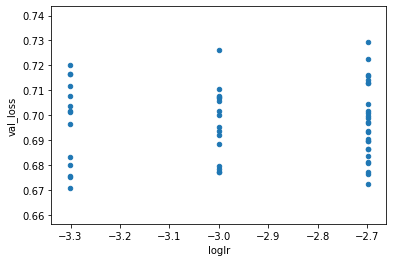

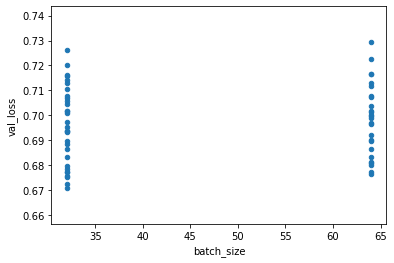

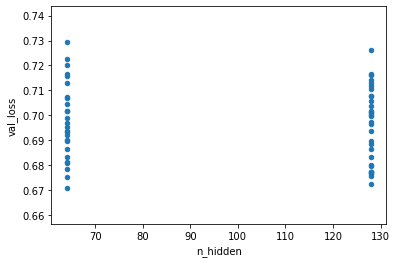

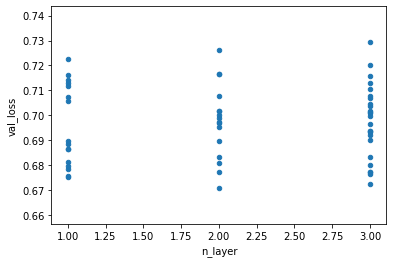

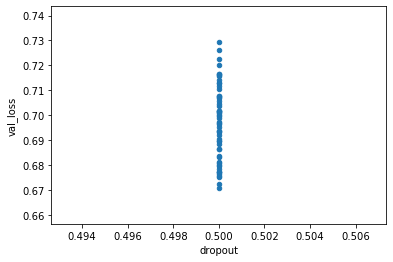

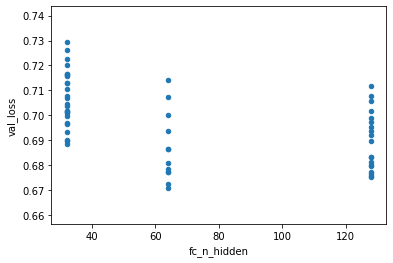

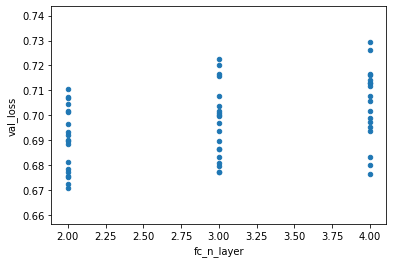

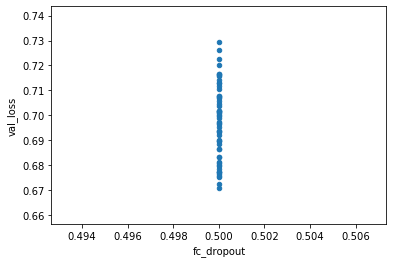

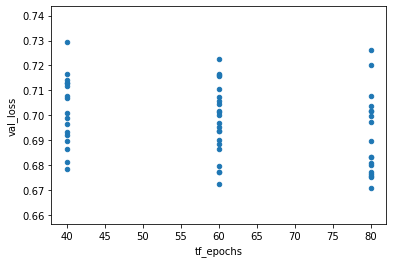

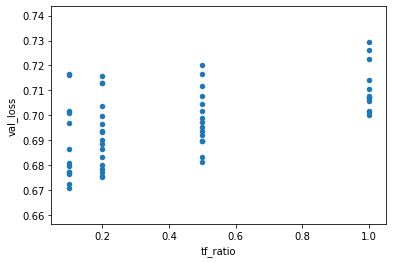

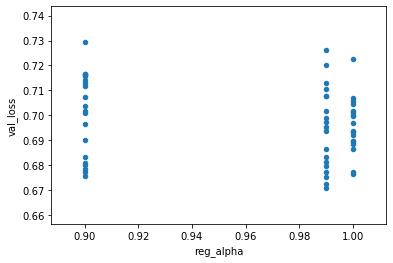

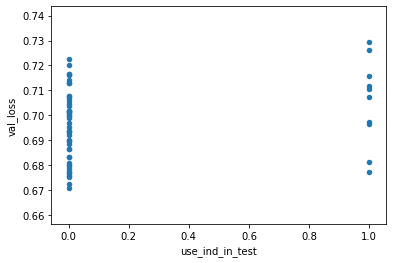

In [29]:
df['loglr'] = np.log10(df['lr'])
for k in ['loglr', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 'fc_n_hidden', 'fc_n_layer', 'fc_dropout', 'tf_epochs', 
          'tf_ratio', 'reg_alpha', 'use_ind_in_test']:
    df.plot.scatter(k, 'val_loss')

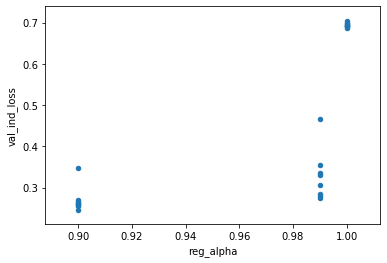

In [25]:
df.plot.scatter(k, 'val_ind_loss')

Based on the above analysis, we can have different range of hparams.
Do a second random search on 0731

In [31]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
df = df.sort_values('val_loss')
df = df[df.name.apply(lambda x: x.startswith('0731'))]
df.head(10)

name  epoch  global_step  \
47  0731_gru_s98_lr0.0002_bs16_hd1024_ld1_dr0.5_bp0  15     2111.0        
32  0731_gru_s61_lr0.0005_bs16_hd512_ld1_dr0.5_bp0   11     1583.0        
38  0731_gru_s57_lr0.0005_bs16_hd1024_ld1_dr0.3_bp0  9      1319.0        
23  0731_gru_s62_lr0.001_bs16_hd512_ld1_dr0.3_bp0    8      1187.0        
43  0731_gru_s56_lr0.0005_bs16_hd1024_ld1_dr0.3_bp0  7      1055.0        
24  0731_gru_s15_lr0.0005_bs16_hd256_ld2_dr0.3_bp0   11     1583.0        
40  0731_gru_s46_lr0.0002_bs16_hd512_ld2_dr0.7_bp0   23     3167.0        
36  0731_gru_s48_lr0.0002_bs16_hd512_ld2_dr0.7_bp0   22     3035.0        
21  0731_gru_s59_lr0.002_bs16_hd256_ld1_dr0.7_bp0    4      659.0         
63  0731_gru_s64_lr0.0005_bs16_hd1024_ld2_dr0.5_bp0  6      923.0         

    val_loss  val_ind_loss  train_loss  train_reg_loss  train_ind_loss  \
47  0.17607  -999.0         0.17677    -999.0          -999.0            
32  0.17622  -999.0         0.18912    -999.0          -999.0            
38  0.17657  -999.0         0.18865    -999.0          -999.0            
23  0.17699  -999.0         0.14079    -999.0          -999.0            
43  0.17699  -999.0         0.16504    -999.0          -999.0            
24  0.17750  -999.0         0.20449    -999.0          -999.0            
40  0.17766  -999.0         0.23090    -999.0          -999.0            
36  0.17788  -999.0         0.18439    -999.0          -999.0            
21  0.17810  -999.0         0.20388    -999.0          -999.0            
63  0.17877  -999.0         0.18298    -999.0          -999.0            

    test_loss  test_ind_loss                     arch  gpus backend  seed  \
47  0.17081   -999.0          HypotensionGRULightning  1     None    98     
32  0.17023   -999.0          HypotensionGRULightning  1     None    61     
38  0.16896   -999.0          HypotensionGRULightning  1     None    57     
23  0.16857   -999.0          HypotensionGRULightning  1     None    62     
43  0.17213   -999.0          HypotensionGRULightning  1     None    56     
24  0.17265   -999.0          HypotensionGRULightning  1     None    15     
40  0.17150   -999.0          HypotensionGRULightning  1     None    46     
36  0.17193   -999.0          HypotensionGRULightning  1     None    48     
21  0.17385   -999.0          HypotensionGRULightning  1     None    59     
63  0.17300   -999.0          HypotensionGRULightning  1     None    64     

    random_search  ignore_prev_runs load_from_hparams  epochs      lr  \
47  0              0                 None              100     0.0002   
32  0              0                 None              100     0.0005   
38  0              0                 None              100     0.0005   
23  0              0                 None              100     0.0010   
43  0              0                 None              100     0.0005   
24  0              0                 None              100     0.0005   
40  0              0                 None              100     0.0002   
36  0              0                 None              100     0.0002   
21  0              0                 None              100     0.0020   
63  0              0                 None              100     0.0005   

    batch_size  n_hidden  n_layer  dropout  fc_n_hidden  fc_n_layer  \
47  16         -999      -999      0.5     -999         -999          
32  16         -999      -999      0.5     -999         -999          
38  16         -999      -999      0.3     -999         -999          
23  16         -999      -999      0.3     -999         -999          
43  16         -999      -999      0.3     -999         -999          
24  16         -999      -999      0.3     -999         -999          
40  16         -999      -999      0.7     -999         -999          
36  16         -999      -999      0.7     -999         -999          
21  16         -999      -999      0.7     -999         -999          
63  16         -999      -999      0.5     -

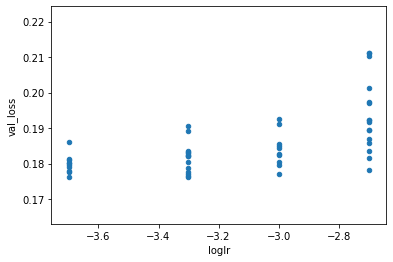

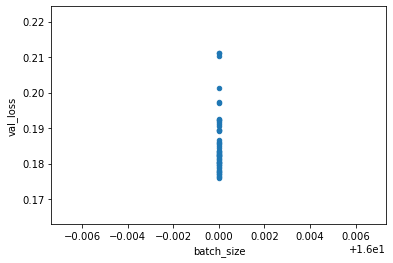

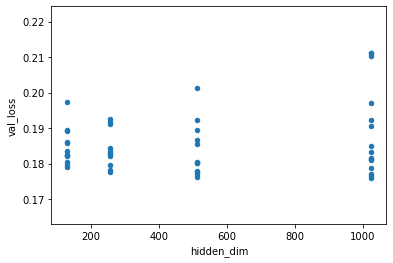

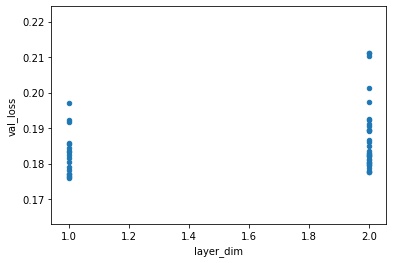

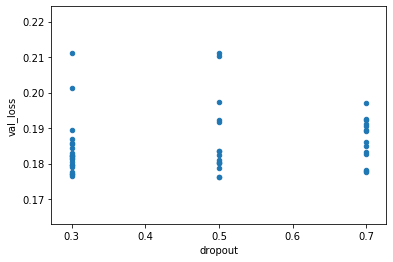

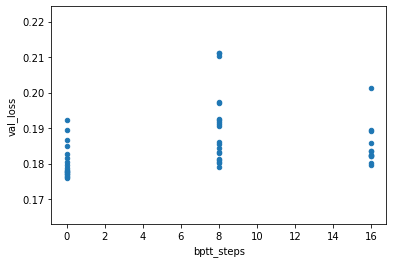

In [33]:
df['loglr'] = np.log10(df['lr'])
for k in ['loglr', 'batch_size', 'hidden_dim', 'layer_dim', 'dropout', 'bptt_steps']:
    df.plot.scatter(k, 'val_loss')

## Final results: 0825 choose the best!

In [177]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
df = df.sort_values('val_loss')
df = df[df.name.apply(lambda x: x.startswith('0906'))]
print(df.shape)
df.head(10)

(96, 42)


name  \
626  0906_gru_s39_lr0.0005_wd1e-05_bs128_nh128_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl2_ano64_adr0.3     
670  0906_gru_s41_lr0.0005_wd1e-06_bs256_nh64_nl1_dr0.0_fnh128_fnl2_fdr0.15_anh64_anl2_ano128_adr0.3      
633  0906_gru_s34_lr0.0005_wd0.0_bs256_nh128_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl4_ano64_adr0.3       
650  0906_gru_s195_lr0.0005_wd0.0_bs256_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.3_anh64_anl2_ano128_adr0.3        
635  0906_gru_s104_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl4_ano128_adr0.3     
653  0906_gru_s69_lr0.0005_wd1e-06_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.3_anh128_anl2_ano128_adr0.3      
607  0906_gru_s162_lr0.001_wd1e-05_bs128_nh128_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl2_ano64_adr0.3     
686  0906_gru_s128_lr0.001_wd1e-05_bs128_nh32_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl4_ano64_adr0.3       
639  0906_gru_s113_lr0.002_wd1e-05_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl2_ano64_adr0.3       
661  0906_gru_s165_lr0.0005_wd1e-05_bs256_nh128_nl1_dr0.0_fnh128_fnl2_fdr0.15_anh128_anl2_ano128_adr0.3   

     epoch  global_step  val_loss  train_loss  train_reg_loss  test_loss  \
626  67     3127.0      -0.029493  0.013609    0.013609       -0.014428    
670  200    4600.0      -0.027696 -0.001327   -0.001327       -0.014572    
633  85     1977.0      -0.026947 -0.021037   -0.021037       -0.012093    
650  200    4600.0      -0.026560 -0.011339   -0.011339       -0.011705    
635  78     3633.0      -0.025929 -0.038255   -0.038255       -0.012979    
653  200    9200.0      -0.025422  0.038916    0.038916       -0.012643    
607  39     1839.0      -0.024898  0.013569    0.013569       -0.010551    
686  200    9200.0      -0.024592 -0.011956   -0.011956       -0.010635    
639  84     3909.0      -0.024506 -0.028153   -0.028153       -0.002305    
661  106    2460.0      -0.024203  0.000942    0.000942       -0.006744    

                        arch  gpus backend  seed  random_search  \
626  HypotensionGRULightning  1     None    39    0               
670  HypotensionGRULightning  1     None    41    0               
633  HypotensionGRULightning  1     None    34    0               
650  HypotensionGRULightning  1     None    195   0               
635  HypotensionGRULightning  1     None    104   0               
653  HypotensionGRULightning  1     None    69    0               
607  HypotensionGRULightning  1     None    162   0               
686  HypotensionGRULightning  1     None    128   0               
639  HypotensionGRULightning  1     None    113   0               
661  HypotensionGRULightning  1     None    165   0               

     ignore_prev_runs load_from_hparams  epochs  patience      lr        wd  \
626  0                 None              200     50        0.0005  0.000010   
670  0                 None              200     50        0.0005  0.000001   
633  0                 None              200     50        0.0005  0.000000   
650  0                 None              200     50        0.0005  0.000000   
635  0                 None              200     50        0.0010  0.000010   
653  0                 None              200     50        0.0005  0.000001   
607  0                 None              200     50        0.0010  0.000010   
686  0                 None              200     50        0.0010  0.000010   
639  0                 None              200     50        0.0020  0.000010   
661  0                 None              200     50        0.0005  0.000010   

     batch_size  n_hidden  n_layer  dropout  fc_n_hidden  fc_n_layer  \
626  128         128       1        0.0      256          2            
670  256         64        1        0.0      128          2            
633  256         128       1        0.0      256          2            
650  256         64        1        0.0      256          2            
635  128         64        1        0.0      256          2            
653  128         64        1        0.0     

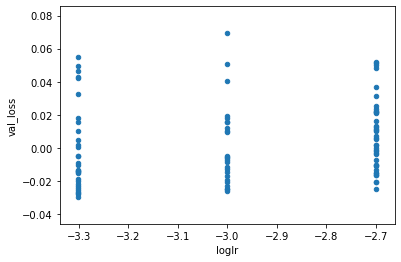

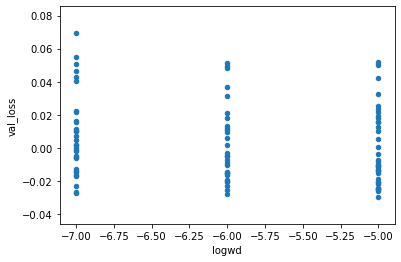

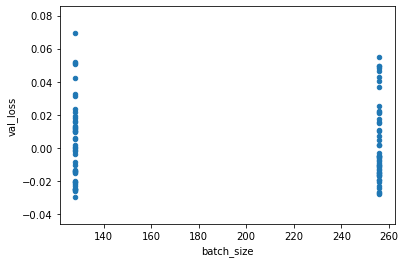

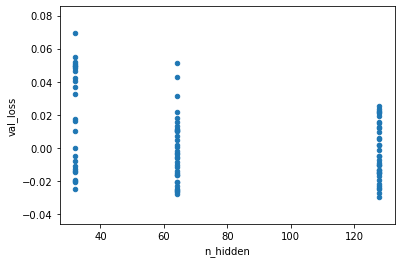

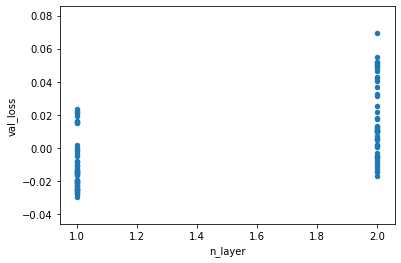

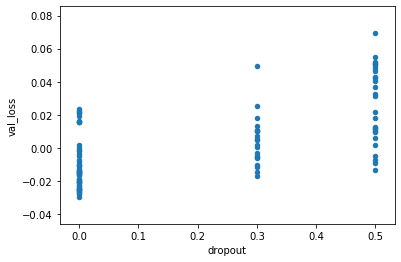

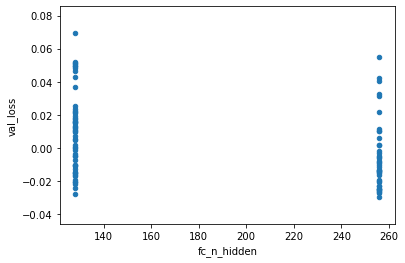

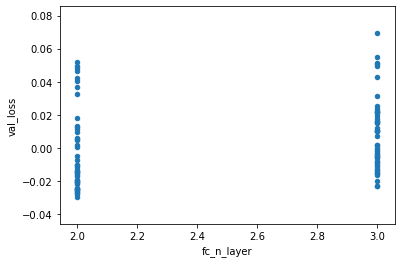

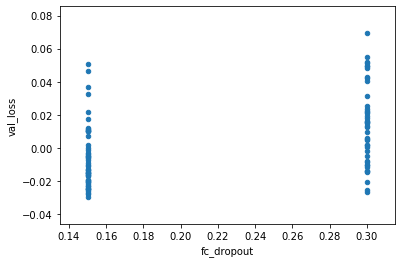

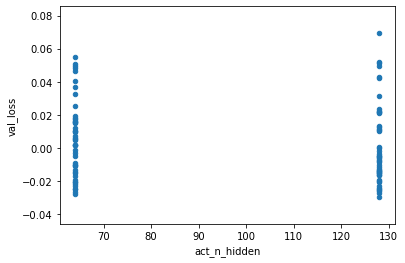

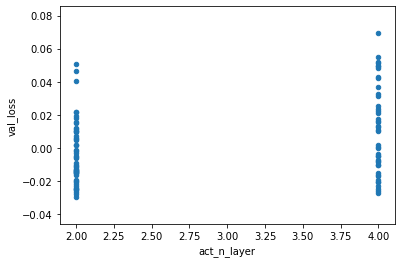

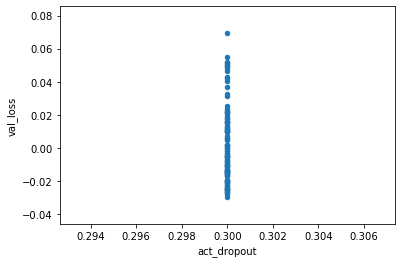

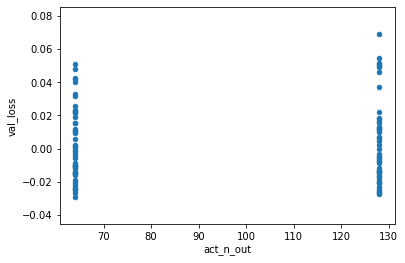

In [179]:
df['loglr'] = np.log10(df['lr'])
df['logwd'] = df['wd'].apply(lambda x: np.log10(x) if x not in [-999, 0] else -7)
for k in ['loglr', 'logwd', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 
          'fc_n_hidden', 'fc_n_layer', 'fc_dropout',
          'act_n_hidden', 'act_n_layer', 'act_dropout', 'act_n_out',
#           'tf_epochs', 'tf_ratio', 'reg_alpha', 'use_ind_in_test', # Ideas I tried but don't work
         ]:
    df.plot.scatter(k, 'val_loss')

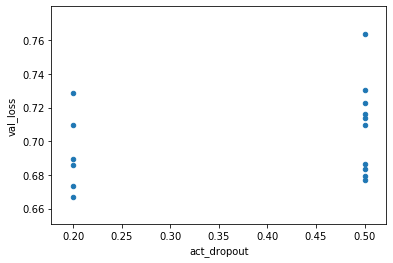

In [43]:
df[df.act_n_layer == 2].plot.scatter('act_dropout', 'val_loss')

## GRU with Gaussian (0915)

In [236]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
# df = df.sort_values('val_loss')
df = df.sort_values('val_loss')
df = df[df.name.apply(lambda x: x.startswith('0915_gru_gauss'))]
print(df.shape)
df.head(10)

(40, 43)


name  \
846  0915_gru_gauss_s53_lr0.001_wd0.0_bs256_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh64_anl1_ano64_adr0.0         
860  0915_gru_gauss_s110_lr0.0005_wd1e-05_bs256_nh128_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl0_ano64_adr0.0   
853  0915_gru_gauss_s143_lr0.002_wd1e-05_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.3_anh64_anl1_ano96_adr0.0       
855  0915_gru_gauss_s124_lr0.001_wd0.0_bs256_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh64_anl2_ano32_adr0.3         
859  0915_gru_gauss_s175_lr0.0005_wd0.0_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh64_anl2_ano96_adr0.3       
788  0915_gru_gauss_s81_lr0.0005_wd1e-05_bs256_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh64_anl0_ano32_adr0.0       
861  0915_gru_gauss_s110_lr0.002_wd1e-06_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.3_anh128_anl2_ano64_adr0.3      
789  0915_gru_gauss_s132_lr0.0005_wd0.0_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl2_ano96_adr0.3       
829  0915_gru_gauss_s92_lr0.0005_wd0.0_bs256_nh256_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh64_anl0_ano96_adr0.0       
785  0915_gru_gauss_s20_lr0.0005_wd1e-06_bs256_nh256_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh64_anl2_ano32_adr0.3     

     epoch  global_step  val_loss  train_loss  train_reg_loss  test_loss  \
846  200    4800.0      -0.045590 -0.052732   -0.052732       -0.044303    
860  200    4800.0      -0.045316 -0.052951   -0.052951       -0.043259    
853  200    4800.0      -0.043455 -0.047377   -0.047377       -0.043137    
855  200    4800.0      -0.042644 -0.038874   -0.038874       -0.041566    
859  200    4800.0      -0.042033 -0.055321   -0.055321       -0.040623    
788  250    6000.0      -0.041518 -0.016534   -0.016534       -0.040555    
861  200    4800.0      -0.040953 -0.023952   -0.023952       -0.039762    
789  250    12000.0     -0.040651  0.475920    0.475920       -0.040100    
829  68     1655.0      -0.039516 -0.054939   -0.054939       -0.038156    
785  72     1751.0      -0.039209 -0.049321   -0.049321       -0.038500    

                        arch  gpus backend  seed  random_search  \
846  HypotensionGRULightning  1     None    53    0               
860  HypotensionGRULightning  1     None    110   0               
853  HypotensionGRULightning  1     None    143   0               
855  HypotensionGRULightning  1     None    124   0               
859  HypotensionGRULightning  1     None    175   0               
788  HypotensionGRULightning  1     None    81    0               
861  HypotensionGRULightning  1     None    110   0               
789  HypotensionGRULightning  1     None    132   0               
829  HypotensionGRULightning  1     None    92    0               
785  HypotensionGRULightning  1     None    20    0               

     ignore_prev_runs load_from_hparams  workers  epochs  patience      lr  \
846  0                 None              0        200     50        0.0010   
860  0                 None              0        200     50        0.0005   
853  0                 None              0        200     50        0.0020   
855  0                 None              0        200     50        0.0010   
859  0                 None              0        200     50        0.0005   
788  0                 None             -999      250     50        0.0005   
861  0                 None              0        200     50        0.0020   
789  0                 None             -999      250     50        0.0005   
829  0                 None              0        200     50        0.0005   
785  0                 None             -999      250     50        0.0005   

           wd  batch_size  n_hidden  n_layer  dropout  fc_n_hidden  \
846  0.000000  256         64        1        0.0      512           
860  0.000010  256         128       1        0.0      256           
853  0.000010  256         64        1        0.0      384           
855  0.000000  256         64        1        0.0      512           
859  0.000000  256         64        1        0.0      384           
788  0.000010  25

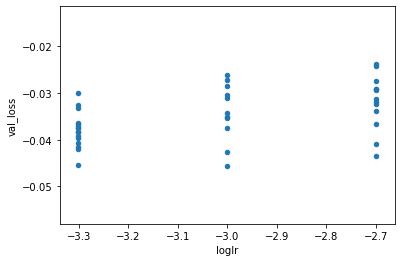

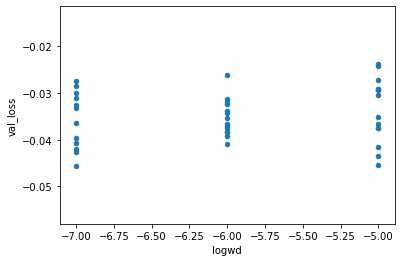

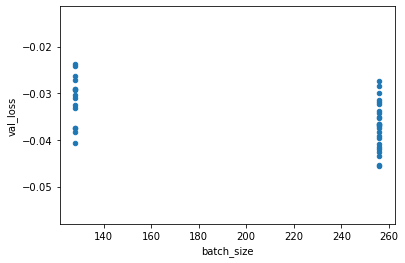

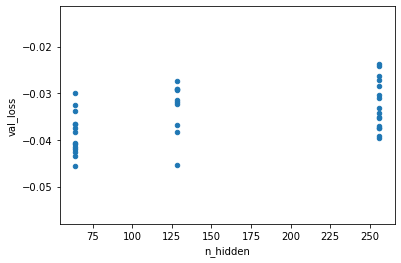

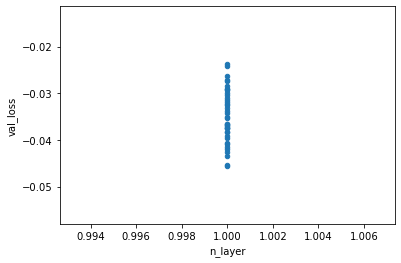

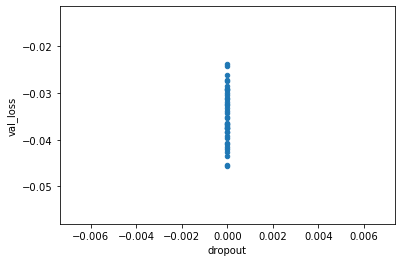

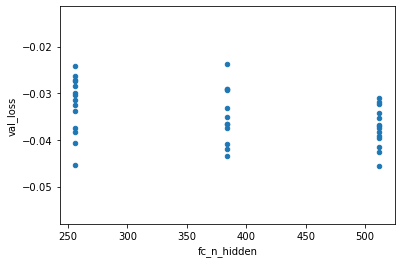

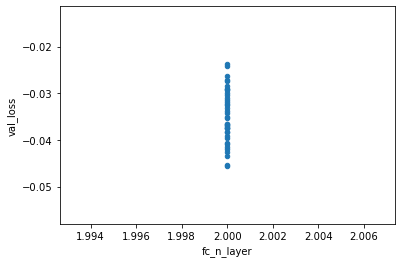

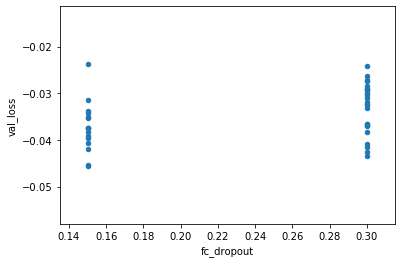

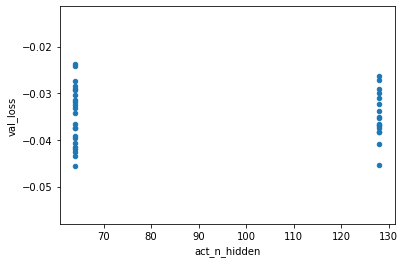

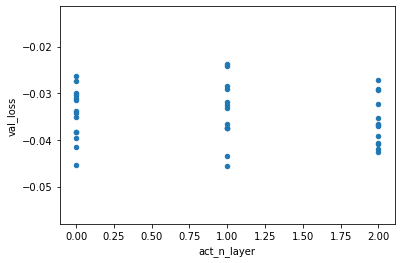

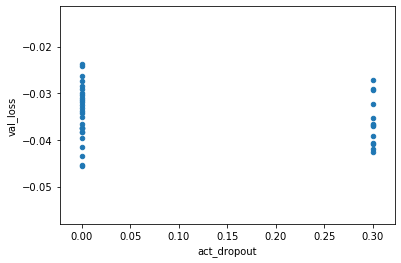

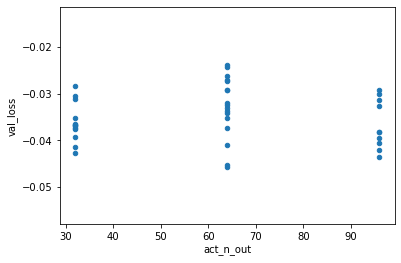

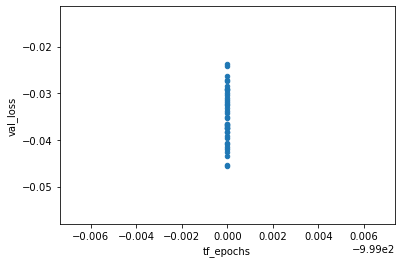

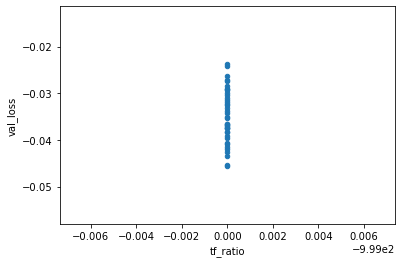

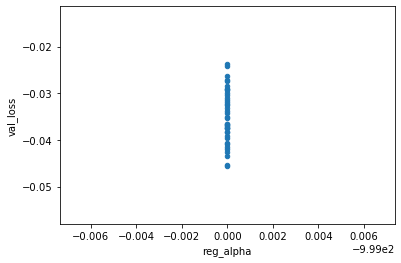

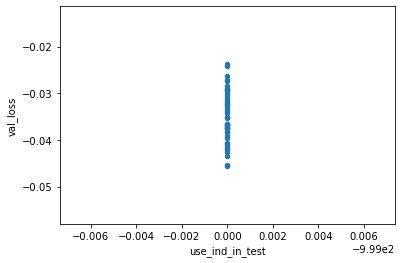

In [237]:
df['loglr'] = np.log10(df['lr'])
df['logwd'] = df['wd'].apply(lambda x: np.log10(x) if x not in [-999, 0] else -7)
for k in ['loglr', 'logwd', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 
          'fc_n_hidden', 'fc_n_layer', 'fc_dropout',
          'act_n_hidden', 'act_n_layer', 'act_dropout', 'act_n_out',
          'tf_epochs', 'tf_ratio', 'reg_alpha', 'use_ind_in_test']:
    df.plot.scatter(k, 'val_loss')

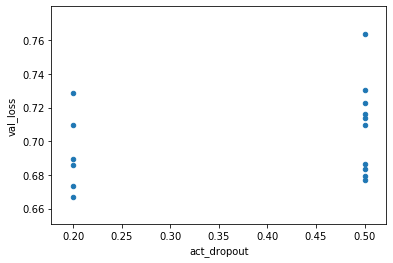

In [43]:
df[df.act_n_layer == 2].plot.scatter('act_dropout', 'val_loss')

## GRU with L1 (0915)

In [238]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
# df = df.sort_values('val_loss')
df = df.sort_values('val_loss')
df = df[df.name.apply(lambda x: x.startswith('0915_gru_l1'))]
print(df.shape)
df.head(10)

(44, 43)


name  \
854  0915_gru_l1_s97_lr0.0005_wd1e-05_bs128_nh128_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh128_anl0_ano32_adr0.0    
852  0915_gru_l1_s51_lr0.002_wd1e-05_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh128_anl0_ano96_adr0.0      
831  0915_gru_l1_w2_s141_lr0.001_wd1e-06_bs128_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh128_anl2_ano96_adr0.3   
847  0915_gru_l1_s146_lr0.001_wd1e-06_bs256_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh64_anl2_ano32_adr0.3       
863  0915_gru_l1_s113_lr0.001_wd1e-06_bs128_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh64_anl2_ano64_adr0.3       
842  0915_gru_l1_s164_lr0.0005_wd1e-05_bs256_nh128_nl1_dr0.0_fnh384_fnl2_fdr0.3_anh128_anl1_ano64_adr0.0    
838  0915_gru_l1_s5_lr0.0005_wd1e-05_bs256_nh256_nl1_dr0.0_fnh512_fnl2_fdr0.3_anh64_anl0_ano64_adr0.0       
784  0915_gru_l1_s28_lr0.0005_wd0.0_bs128_nh256_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh128_anl2_ano32_adr0.3      
851  0915_gru_l1_s79_lr0.0005_wd1e-06_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh64_anl2_ano64_adr0.3      
856  0915_gru_l1_s57_lr0.001_wd1e-06_bs128_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl0_ano32_adr0.0       

     epoch  global_step  val_loss  train_loss  train_reg_loss  test_loss  \
854  200    9600.0       0.18352   0.30192     0.30192         0.18455     
852  200    9600.0       0.18382   0.38445     0.38445         0.18501     
831  200    9600.0       0.18464   0.35652     0.35652         0.18597     
847  200    4800.0       0.18474   0.18388     0.18388         0.18580     
863  200    9600.0       0.18487   0.24508     0.24508         0.18600     
842  110    2663.0       0.18495   0.18912     0.18912         0.18624     
838  69     1679.0       0.18498   0.18339     0.18339         0.18610     
784  61     2975.0       0.18502   0.29282     0.29282         0.18626     
851  200    4800.0       0.18504   0.18475     0.18475         0.18605     
856  200    9600.0       0.18517   0.30923     0.30923         0.18625     

                        arch  gpus backend  seed  random_search  \
854  HypotensionGRULightning  1     None    97    0               
852  HypotensionGRULightning  1     None    51    0               
831  HypotensionGRULightning  1     None    141   0               
847  HypotensionGRULightning  1     None    146   0               
863  HypotensionGRULightning  1     None    113   0               
842  HypotensionGRULightning  1     None    164   0               
838  HypotensionGRULightning  1     None    5     0               
784  HypotensionGRULightning  1     None    28    0               
851  HypotensionGRULightning  1     None    79    0               
856  HypotensionGRULightning  1     None    57    0               

     ignore_prev_runs load_from_hparams  workers  epochs  patience      lr  \
854  0                 None              0        200     50        0.0005   
852  0                 None              0        200     50        0.0020   
831  0                 None              2        200     50        0.0010   
847  0                 None              0        200     50        0.0010   
863  0                 None              0        200     50        0.0010   
842  0                 None              0        200     50        0.0005   
838  0                 None              0        200     50        0.0005   
784  0                 None             -999      250     50        0.0005   
851  0                 None              0        200     50        0.0005   
856  0                 None              0        200     50        0.0010   

           wd  batch_size  n_hidden  n_layer  dropout  fc_n_hidden  \
854  0.000010  128         128       1        0.0      384           
852  0.000010  128         64        1        0.0      256           
831  0.000001  128         64        1        0.0      512           
847  0.000001  256         64        1        0.0      512           
863  0.000001  128         64        1        0.0      512           
842  0.000010  256         128       1        0

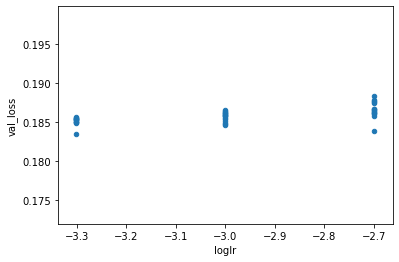

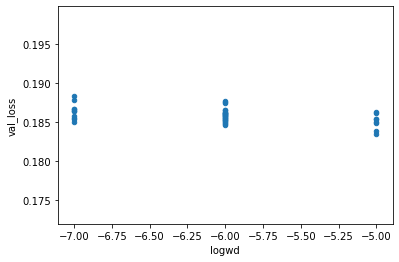

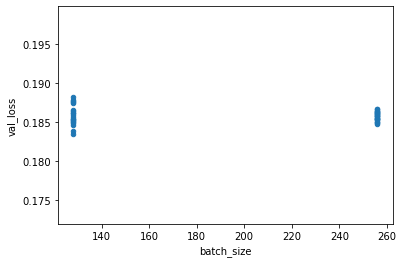

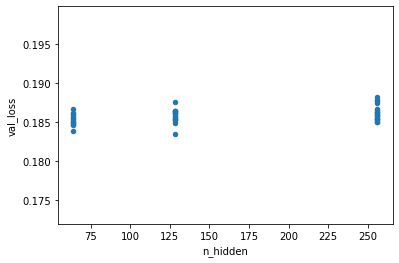

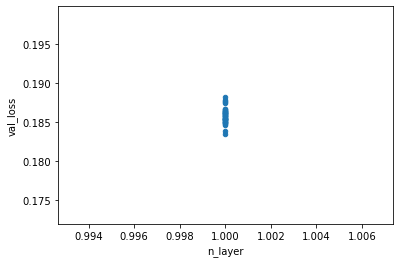

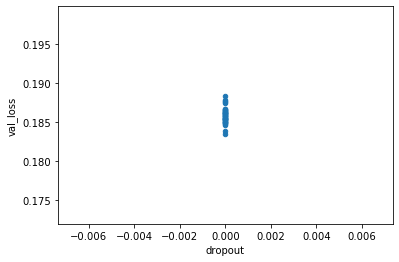

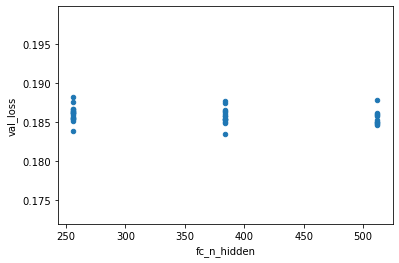

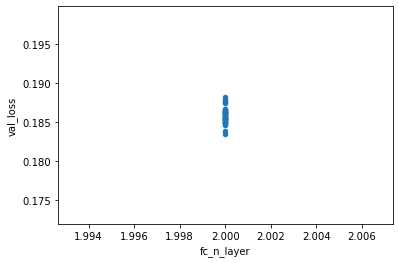

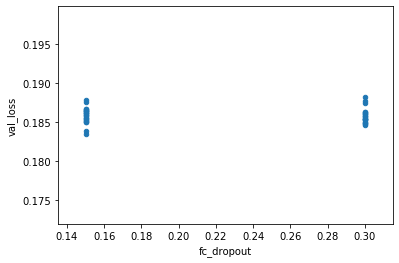

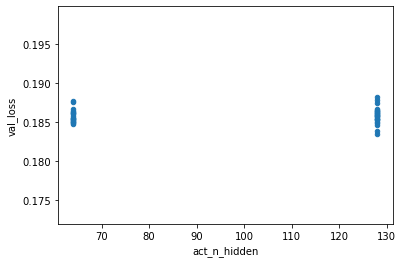

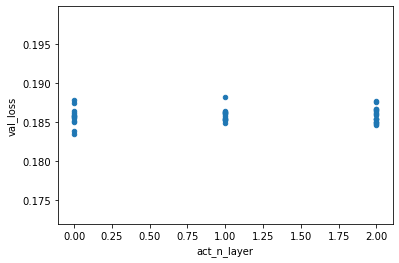

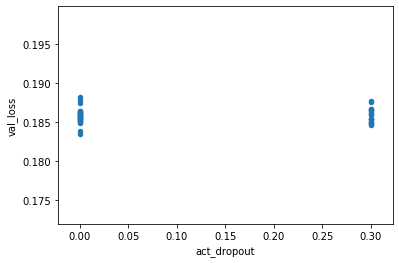

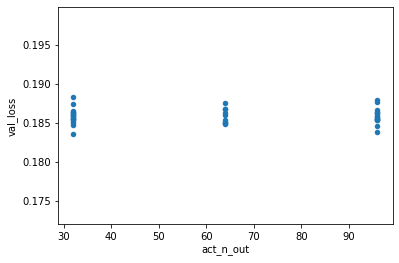

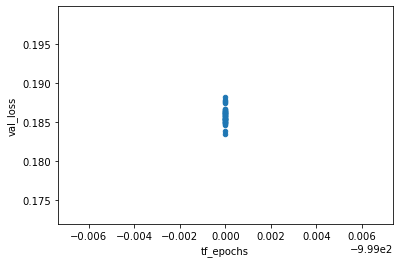

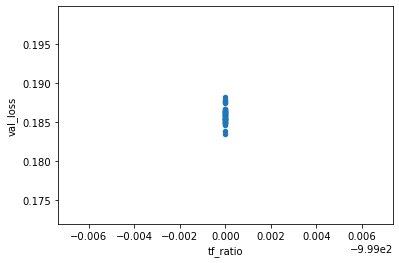

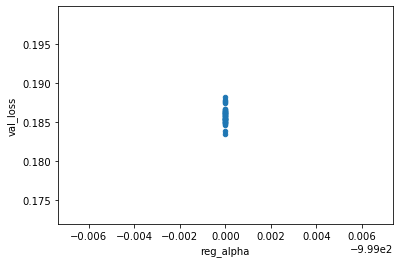

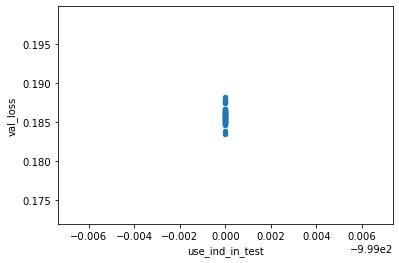

In [239]:
df['loglr'] = np.log10(df['lr'])
df['logwd'] = df['wd'].apply(lambda x: np.log10(x) if x not in [-999, 0] else -7)
for k in ['loglr', 'logwd', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 
          'fc_n_hidden', 'fc_n_layer', 'fc_dropout',
          'act_n_hidden', 'act_n_layer', 'act_dropout', 'act_n_out',
          'tf_epochs', 'tf_ratio', 'reg_alpha', 'use_ind_in_test']:
    df.plot.scatter(k, 'val_loss')

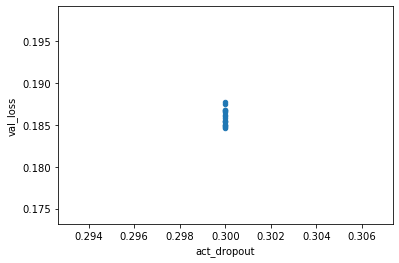

In [240]:
df[df.act_n_layer == 2].plot.scatter('act_dropout', 'val_loss')

## GRU with L1 with IPTW (0921)

In [272]:
df = pd.read_csv('results/HypotensionGRULightning_results.csv')
# df = df.sort_values('val_loss')
df = df.sort_values('test_loss')
df = df[df.name.apply(lambda x: x.startswith('0921'))]
print(df.shape)
df.head(10)

# df['overall_loss'] = 0.7 * df['train_loss'] + 0.15 * 

(45, 45)


name  \
896  0921_gru_l1_iptw_s75_lr0.0005_wd1e-05_bs128_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh128_anl1_ano32_adr0.0   
902  0921_gru_l1_iptw_s48_lr0.0005_wd0.0_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh64_anl2_ano64_adr0.3      
900  0921_gru_l1_iptw_s174_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh64_anl2_ano64_adr0.3    
888  0921_gru_l1_iptw_s143_lr0.001_wd0.0_bs128_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh64_anl2_ano32_adr0.3      
891  0921_gru_l1_iptw_s93_lr0.0005_wd1e-05_bs256_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl2_ano32_adr0.3    
878  0921_gru_l1_iptw_s112_lr0.001_wd0.0_bs256_nh64_nl1_dr0.0_fnh512_fnl2_fdr0.15_anh64_anl2_ano96_adr0.3      
873  0921_gru_l1_iptw_s27_lr0.0005_wd1e-05_bs256_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh128_anl2_ano64_adr0.3   
885  0921_gru_l1_iptw_s25_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh64_anl2_ano32_adr0.3     
870  0921_gru_l1_iptw_s23_lr0.001_wd1e-05_bs256_nh64_nl1_dr0.0_fnh256_fnl2_fdr0.15_anh64_anl0_ano96_adr0.0     
899  0921_gru_l1_iptw_s172_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh384_fnl2_fdr0.15_anh128_anl0_ano64_adr0.0   

     epoch  global_step  val_loss  train_loss  train_reg_loss  test_loss  \
896  47     2303.0       0.24154   0.28474     0.28474         0.32335     
902  118    2855.0       0.24169   0.16096     0.16096         0.32699     
900  43     2111.0       0.24355   0.38070     0.38070         0.32831     
888  26     1295.0       0.24937   0.29925     0.29925         0.33188     
891  80     1943.0       0.24564   0.19379     0.19379         0.33205     
878  61     1487.0       0.25112   0.20720     0.20720         0.33364     
873  43     1055.0       0.25466   0.20977     0.20977         0.33516     
885  22     1103.0       0.25242   0.36744     0.36744         0.33528     
870  49     1199.0       0.24969   0.17541     0.17541         0.33717     
899  70     3407.0       0.25584   0.39498     0.39498         0.33735     

                        arch  gpus backend  seed  random_search  \
896  HypotensionGRULightning  1     None    75    0               
902  HypotensionGRULightning  1     None    48    0               
900  HypotensionGRULightning  1     None    174   0               
888  HypotensionGRULightning  1     None    143   0               
891  HypotensionGRULightning  1     None    93    0               
878  HypotensionGRULightning  1     None    112   0               
873  HypotensionGRULightning  1     None    27    0               
885  HypotensionGRULightning  1     None    25    0               
870  HypotensionGRULightning  1     None    23    0               
899  HypotensionGRULightning  1     None    172   0               

     ignore_prev_runs load_from_hparams  notsave_epochs  workers  epochs  \
896  0                 None              0               0        200      
902  0                 None              0               0        200      
900  0                 None              0               0        200      
888  0                 None              0               0        200      
891  0                 None              0               0        200      
878  0                 None              0               0        200      
873  0                 None              0               0        200      
885  0                 None              0               0        200      
870  0                 None              0               0        200      
899  0                 None              0               0        200      

     patience      lr       wd  batch_size  n_hidden  n_layer  dropout  \
896  50        0.0005  0.00001  128         64        1        0.0       
902  50        0.0005  0.00000  256         64        1        0.0       
900  50        0.0010  0.00001  128         64        1        0.0       
888  50        0.0010  0.00000  128         64        1        0.0       
891  50        0.0005  0.00001  256         64        1        0.0       
878  50        

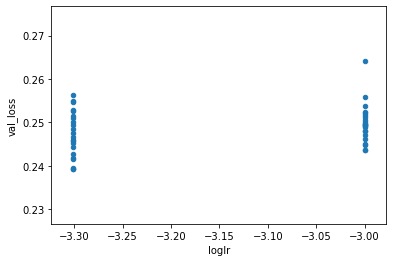

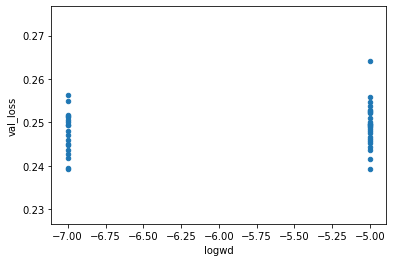

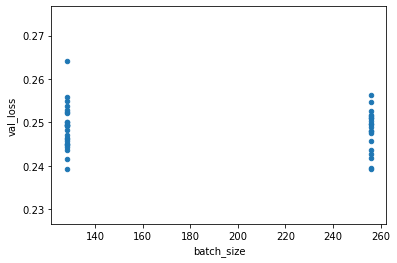

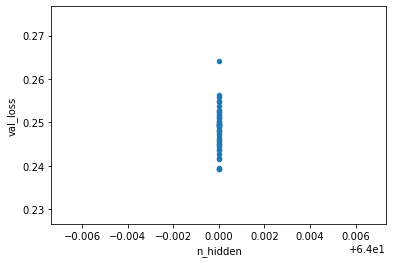

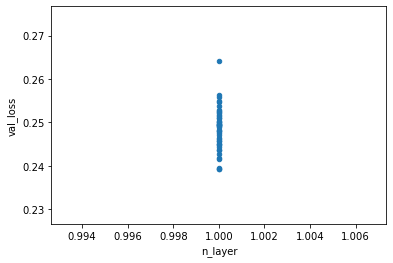

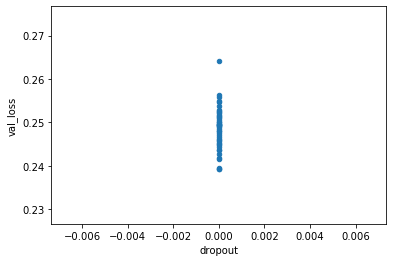

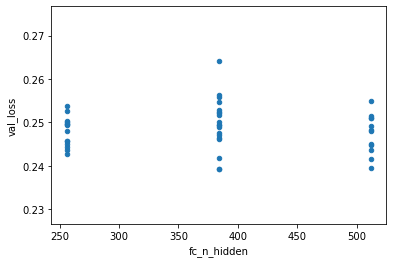

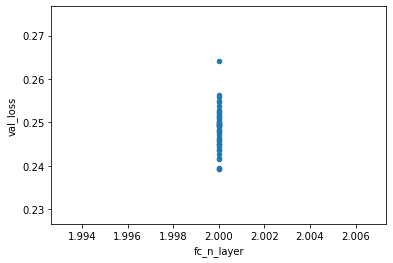

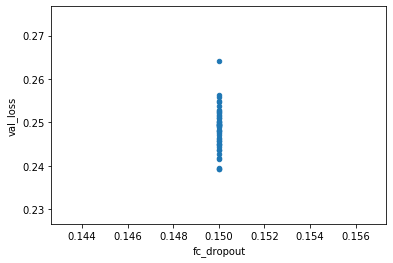

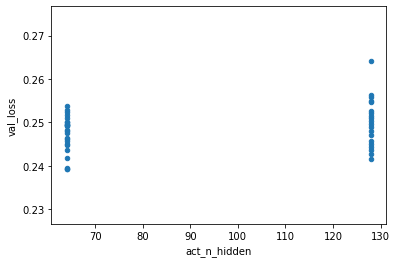

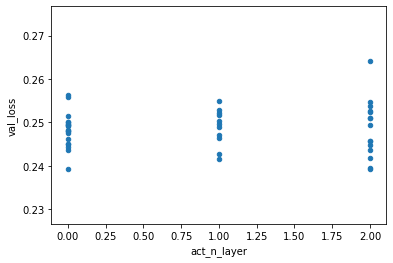

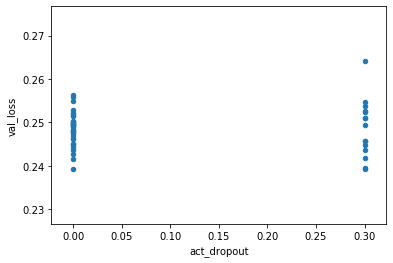

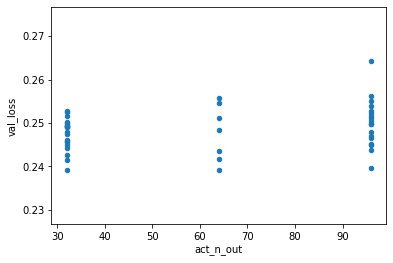

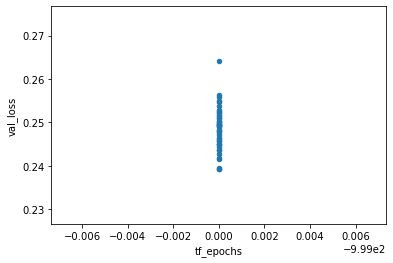

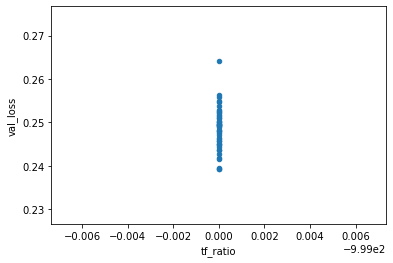

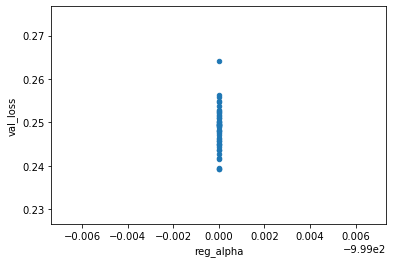

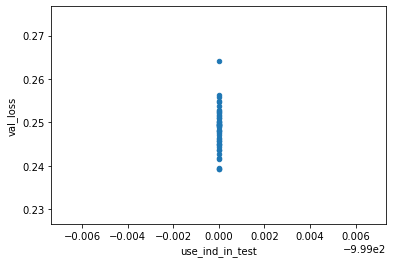

In [269]:
df['loglr'] = np.log10(df['lr'])
df['logwd'] = df['wd'].apply(lambda x: np.log10(x) if x not in [-999, 0] else -7)
for k in ['loglr', 'logwd', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 
          'fc_n_hidden', 'fc_n_layer', 'fc_dropout',
          'act_n_hidden', 'act_n_layer', 'act_dropout', 'act_n_out',
          'tf_epochs', 'tf_ratio', 'reg_alpha', 'use_ind_in_test']:
    df.plot.scatter(k, 'val_loss')

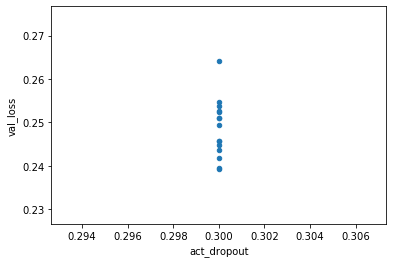

In [270]:
df[df.act_n_layer == 2].plot.scatter('act_dropout', 'val_loss')

## Hypotension LR performance

# AIRL

For linear with region 0.292~0.236 (bc alone is around 0.29 / 0.30):
- uniform_linear_projection_g0.9: pi_best_r 0.345
- bc_linear_projection_g0.9 also makes sense: pi_best_r 0.285

Or we can choose:
- uniform_linear_max_margin_g0.9: best_r 0.256 or pi_best_r 0.363 (wierd!?)
- bc_linear_max_margin_g0.9: best_r 0.257 or pi_best_r 0.282

See gam baseline (0.147~0.088, bc around 0.159):
- uniform_gam_max_margin_g0.9: best_r 0.406 or pi_best_r 0.353
- bc_gam_max_margin_g0.9: just choose behavior cloning, best_r: 0.159

## NODEGAM model

In [79]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
# df = df[df.name.apply(lambda x: '0719' in x)]
df = df.sort_values('val_a', ascending=False)
df.head()

name  \
173  0826_sim_s321_disc_lr0.0005_bs512_nl3_nt200_ad1_td3_od0.0_ld0.5_cs1.0_an2000_ug20_dn0.2_dns10              
61   0730_mg0.5_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
29   0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000         
4    0719_gammdp_nodegam_s321_lr0.0005_bs512_ud50_dn0.2_dns20_nl3_nt100_ad0_td3_od0.0_ld0.3_cs1.0_an2000        
197  0826_sim_s321_disc_lr0.001_bs512_nl2_nt100_ad0_td3_od0.0_ld0.0_cs1.0_an2000_ug20_dn0.2_dns20               

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
173  16     2668         0.99875  0.046194    0               1.8685            
61   13     2197         0.99875  0.046194    0              -999.0000          
29   13     2197         0.99865  0.026777    0              -999.0000          
4    23     3767         0.99865  0.035023    0              -999.0000          
197  54     8634         0.99845  0.024245    0               7.1945            

      test_a  test_reward  test_reward_std                    arch  gpus  \
173  0.99033 -0.024421     0.006807         AIRL_NODEGAM_Lightning  1      
61   0.97198 -0.052320     0.009397         AIRL_NODEGAM_Lightning  1      
29   0.97242 -0.046855     0.013200         AIRL_NODEGAM_Lightning  1      
4    0.97547 -0.027989     0.003723         AIRL_NODEGAM_Lightning  1      
197  0.96509 -0.068467     0.009900         AIRL_NODEGAM_Lightning  1      

    backend  seed  random_search  ignore_prev_runs  \
173  None    321   0              0                  
61   None    321   0              0                  
29   None    321   0              0                  
4    None    321   0              0                  
197  None    321   0              0                  

                                                                                      load_from_hparams  \
173  None                                                                                                 
61   0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
29   None                                                                                                 
4    None                                                                                                 
197  None                                                                                                 

     gamma  noise  noise_epochs  epochs  patience  mdp  fold model_gamma  \
173  0.9    0.2    10            100     30        gam  0     0.9          
61   0.9   -999.0 -999           80     -999       gam  0     0.5          
29   0.9   -999.0 -999           80     -999       gam  0     -999         
4    0.9   -999.0 -999           80     -999       gam  0     -999         
197  0.9    0.2    20            100     30        gam  0     0.9          

        N expert_pol   disc_lr  batch_size  shaping  anneal_steps  num_trees  \
173  5000  optimal    0.0005    512.0       0        2000          200         
61   5000  optimal   -999.0000  512.0       0        3000          20          
29   5000  optimal   -999.0000  512.0       0        3000          20          
4    5000  optimal   -999.0000  512.0       0        2000          100         
197  5000  optimal    0.0010    512.0       0        2000          100         

     num_layers  addi_tree_dim  depth  output_dropout  l2_lambda  \
173  3           1              3      0.0             0.0         
61   3           0              2      0.0             0.0         
29   3           0              2      0.0             0.0         
4    3           0              3      0.0             0.0         
197  2           0              3      0.0             0.0         

     last_dropout  colsample_bytree  add_last_linear  update_gen  train_loss  \
173  0.5           1.0               1.0              20         -999.00000    
61   0.

In [80]:
df.groupby(['mdp']).apply(lambda x: x.sort_values('val_a', ascending=False).iloc[:10])

name  \
mdp                                                                                                                    
gam    173  0826_sim_s321_disc_lr0.0005_bs512_nl3_nt200_ad1_td3_od0.0_ld0.5_cs1.0_an2000_ug20_dn0.2_dns10              
       61   0730_mg0.5_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
       29   0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000         
       4    0719_gammdp_nodegam_s321_lr0.0005_bs512_ud50_dn0.2_dns20_nl3_nt100_ad0_td3_od0.0_ld0.3_cs1.0_an2000        
       197  0826_sim_s321_disc_lr0.001_bs512_nl2_nt100_ad0_td3_od0.0_ld0.0_cs1.0_an2000_ug20_dn0.2_dns20               
       185  0826_sim_s321_disc_lr0.0005_bs512_nl3_nt200_ad1_td2_od0.0_ld0.2_cs1.0_an3000_ug20_dn0.2_dns20              
       56   0719_gammdp_nodegam_s321_lr0.001_bs512_ud20_dn0.0_dns10_nl2_nt200_ad1_td3_od0.0_ld0.5_cs0.5_an5000         
       65   0730_mg0.1_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
       36   0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.05_dns10_nl3_nt100_ad0_td3_od0.0_ld0.0_cs0.5_an5000       
       62   0730_mg0.8_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
linear 72   0804_lmdp_nodegam_s321_lr0.001_bs512_ud50_dn0.1_dns20_nl1_nt50_ad1_td1_od0.0_ld0.2_cs1.0_an2000            
       160  0826_sim_s321_disc_lr0.0002_bs512_nl1_nt200_ad0_td1_od0.0_ld0.0_cs0.5_an3000_ug20_dn0.1_dns10              
       108  0804_lmdp_nodegam_s321_lr0.001_bs512_ud20_dn0.1_dns10_nl2_nt200_ad0_td1_od0.0_ld0.3_cs1.0_an3000           
       153  0826_sim_s321_disc_lr0.0005_bs512_nl3_nt100_ad0_td2_od0.0_ld0.0_cs0.5_an5000_ug20_dn0.05_dns10             
       110  0804_lmdp_nodegam_s321_lr0.001_bs512_ud20_dn0.1_dns10_nl1_nt100_ad0_td1_od0.0_ld0.0_cs0.5_an2000           
       44   0719_lmdp_nodegam_s321_lr0.001_bs512_ud20_dn0.1_dns10_nl1_nt20_ad0_td2_od0.0_ld0.3_cs1.0_an3000            
       127  0826_sim_s321_disc_lr0.0005_bs512_nl1_nt100_ad1_td1_od0.0_ld0.0_cs1.0_an3000_ug20_dn0.0_dns10              
       50   0719_lmdp_nodegam_s321_lr0.0005_bs512_ud20_dn0.05_dns20_nl1_nt200_ad1_td2_od0.0_ld0.0_cs1.0_an3000         
       88   0804_lmdp_nodegam_s321_lr0.0003_bs512_ud30_dn0.2_dns10_nl2_nt200_ad0_td2_od0.0_ld0.0_cs1.0_an5000          
       97   0804_lmdp_nodegam_s321_lr0.0003_bs512_ud30_dn0.05_dns10_nl1_nt200_ad1_td1_od0.0_ld0.3_cs0.5_an3000         

            epoch  global_step    val_a  val_reward  val_reward_std  \
mdp                                                                   
gam    173  16     2668         0.99875  0.046194    0                
       61   13     2197         0.99875  0.046194    0                
       29   13     2197         0.99865  0.026777    0                
       4    23     3767         0.99865  0.035023    0                
       197  54     8634         0.99845  0.024245    0                
       185  61     9733         0.99845  0.027673    0                
       56   78     12402        0.99840  0.021783    0                
       65   12     2040         0.99825  0.008629    0                
       36   72     11460        0.99810  0.025334    0                
       62   14     2354         0.99770  0.031413    0                
linear 72   16     2668         0.98640  1.748700    0                
       160  89     14129        0.98590  1.764400    0                
       108  20     3296         0.97760  1.694700    0                
       153  34     5494         0.97160  1.698500    0                
       110  26     4238         0.97055  1.648800    0                
       44   47     7535         0.96895  1.793300    0                
       127  10     1726         0.96790  1.700800    0                
       50   17     2825         0.96700  1.786500    0                
       88   17     2825         0.96545  1.738300  

In [7]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '0730' in x)]
# df = df.sort_values('val_a', ascending=False)
df

name  \
61  0730_mg0.5_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000     
62  0730_mg0.8_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000     
63  0730_mg0.9_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000     
64  0730_mg0.99_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000    
65  0730_mg0.1_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000     
66  0730_mg0.3_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000     
67  0730_shaping_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
68  0730_lmdp_nodegam_s321_lr0.001_bs512_ud50_dn0.1_dns20_nl3_nt100_ad0_td3_od0.0_ld0.0_cs0.5_an5000             

    epoch  global_step    val_a  val_reward  val_reward_std  train_loss  \
61  13     2197         0.99875  0.046194    0               0.531580     
62  14     2354         0.99770  0.031413    0               0.549950     
63  16     2668         0.99200 -0.014288    0              -0.039029     
64  24     3924         0.98125 -0.028694    0               0.310190     
65  12     2040         0.99825  0.008629    0               0.755380     
66  21     3453         0.98290 -0.023956    0               0.810180     
67  21     3453         0.98215 -0.049284    0               0.142690     
68  72     11460        0.87105  1.667200    0               0.000230     

     test_a  test_reward  test_reward_std                    arch  epochs  \
61  0.97198 -0.052320     0.009397         AIRL_NODEGAM_Lightning  80       
62  0.97063 -0.055456     0.006845         AIRL_NODEGAM_Lightning  80       
63  0.96841 -0.064663     0.013671         AIRL_NODEGAM_Lightning  80       
64  0.97192 -0.046434     0.007969         AIRL_NODEGAM_Lightning  80       
65  0.96676 -0.039657     0.006907         AIRL_NODEGAM_Lightning  80       
66  0.94961 -0.063278     0.007941         AIRL_NODEGAM_Lightning  80       
67  0.96613 -0.044230     0.008854         AIRL_NODEGAM_Lightning  80       
68  0.74140  1.302100     0.008359         AIRL_NODEGAM_Lightning  100      

    gpus backend  seed  random_search  ignore_prev_runs  \
61  1     None    321   0              0                  
62  1     None    321   0              0                  
63  1     None    321   0              0                  
64  1     None    321   0              0                  
65  1     None    321   0              0                  
66  1     None    321   0              0                  
67  1     None    321   0              0                  
68  1     None    321   0              0                  

                                                                                     load_from_hparams  \
61  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
62  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
63  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
64  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
65  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
66  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
67  0719_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000   
68  0717_lmdp_nodegam_s321_lr0.001_bs512_ud50_dn0.1_dns20_nl3_nt100_ad0_td3_od0.0_ld0.0_cs0.5_an5000     

       mdp  fold  gamma     N expert_pol model_gamma      lr  batch_size  \
61  gam     0     0.9    5000  optimal    0.5         0.0005  512.0        
62  gam     0     0.9    5000  optimal    0.8         0.0005  512.0   

In [14]:
# from lib.utils import make_dir_permanent

# make_dir_permanent('0730_mg0.5_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000')
# make_dir_permanent('0730_mg0.8_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000')
# make_dir_permanent('0730_mg0.9_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000')
# make_dir_permanent('0730_mg0.99_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.2_dns10_nl3_nt20_ad0_td2_od0.0_ld0.0_cs1.0_an3000')

## Linear model

In [8]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '0730' in x)]
df = df.sort_values('val_a', ascending=False)
df.head()

name  epoch  \
159  0730_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.05_dns20    43      
160  0730_gammdp_linear_s321_lr0.0003_bs512_ud20_dn0.0_dns10  6       

     global_step   val_a  val_reward  val_reward_std  train_loss   test_a  \
159  6907         0.9843  1.742500    0              -0.023246    0.81904   
160  1098         0.3735 -0.098509    0              -0.000779    0.35000   

     test_reward  test_reward_std           arch  epochs  gpus backend  seed  \
159  1.683300     0.005394         AIRLLightning  80      1     None    321    
160  0.011375     0.004413         AIRLLightning  80      1     None    321    

     random_search  ignore_prev_runs  \
159  0              0                  
160  0              0                  

                                           load_from_hparams     mdp  fold  \
159  0719_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.05_dns20    linear  0      
160  0719_gammdp_linear_s321_lr0.0003_bs512_ud20_dn0.0_dns10  gam     0      

     gamma     N expert_pol model_gamma      lr  batch_size  update_disc  \
159  0.9    5000  optimal    None        0.0010  512         30            
160  0.9    5000  optimal    None        0.0003  512         20            

     disc_n  disc_n_epochs  shaping  
159  0.05    20             0        
160  0.00    10             0

In [17]:
make_dir_permanent('0730_gammdp_linear_s321_lr|0.0003_bs512_ud20_dn0.0_dns10')
make_dir_permanent('0730_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.05_dns20')

In [19]:
df.groupby(['mdp']).apply(lambda x: x.sort_values('val_a', ascending=False).iloc[:10])

name  epoch  \
mdp                                                                           
gam    156  0719_gammdp_linear_s321_lr0.0003_bs512_ud20_dn0.0_dns10   6       
       158  0719_gammdp_linear_s321_lr0.001_bs512_ud20_dn0.05_dns10   6       
       155  0719_gammdp_linear_s321_lr0.001_bs512_ud20_dn0.1_dns10    6       
       151  0719_gammdp_linear_s321_lr0.0005_bs512_ud20_dn0.0_dns10   3       
       127  0719_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.0_dns20    6       
       128  0719_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.05_dns10   7       
       132  0719_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.1_dns20    7       
       126  0719_gammdp_linear_s321_lr0.0005_bs512_ud50_dn0.05_dns20  15      
       124  0719_gammdp_linear_s321_lr0.0005_bs512_ud50_dn0.0_dns10   14      
       125  0719_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.2_dns20    11      
linear 130  0719_lmdp_linear_s321_lr0.001_bs512_ud50_dn0.2_dns10      44      
       149  0719_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.05_dns20     42      
       153  0719_lmdp_linear_s321_lr0.001_bs512_ud20_dn0.2_dns20      44      
       133  0719_lmdp_linear_s321_lr0.001_bs512_ud50_dn0.1_dns10      40      
       129  0719_lmdp_linear_s321_lr0.001_bs512_ud50_dn0.1_dns20      43      
       145  0719_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.0_dns20      34      
       135  0719_lmdp_linear_s321_lr0.0005_bs512_ud50_dn0.2_dns20     79      
       134  0719_lmdp_linear_s321_lr0.0005_bs512_ud50_dn0.2_dns10     76      
       154  0719_lmdp_linear_s321_lr0.0005_bs512_ud20_dn0.1_dns20     76      
       150  0719_lmdp_linear_s321_lr0.0005_bs512_ud30_dn0.0_dns10     79      

            global_step    val_a  val_reward  val_reward_std  train_loss  \
mdp                                                                        
gam    156  1098         0.37320 -0.227750    0              -0.029860     
       158  1098         0.37105 -0.040645    0               0.010000     
       155  1098         0.37070  0.218260    0              -0.006559     
       151  627          0.36970  0.073003    0               0.001753     
       127  1098         0.36245 -0.402540    0              -0.004688     
       128  1255         0.36200 -0.292790    0              -0.005170     
       132  1255         0.36015 -0.258330    0              -0.008566     
       126  2511         0.35960 -0.167560    0              -0.006200     
       124  2354         0.35960 -0.176260    0              -0.000953     
       125  1883         0.35765 -0.078411    0              -0.007856     
linear 130  7064         0.99755  1.729600    0              -0.014116     
       149  6750         0.99450  1.652400    0              -0.021280     
       153  7064         0.98985  1.681300    0              -0.023612     
       133  6436         0.98465  1.677000    0              -0.019978     
       129  6907         0.98465  1.677000    0              -0.037280     
       145  5494         0.98430  1.742500    0              -0.046102     
       135  12559        0.98005  1.701200    0              -0.014231     
       134  12088        0.97900  1.704100    0              -0.041833     
       154  12088        0.97815  1.743200    0               0.018195     
       150  12559        0.90050  1.719200    0              -0.082235     

             test_a  test_reward  test_reward_std           arch  epochs  \
mdp                                                                        
gam    156  0.34945  0.017164     0.011184         AIRLLightning  80       
       158  0.35219 -0.271180     0.025687         AIRLLightning  80       
       155  0.35305 -0.230610     0.006127         AIRLLightning  80       
       151  0.35286 -0.222420     0.027923         AIRLLightning  80       
       127  0.26573  0.206250     0.018656         AIRLLightning  80       
       128  0.27496  0.154830     0.021436         AIRLLightning  80       
       132  0.22307  0.078101     0.008012  

/h/kingsley/anaconda3/envs/cu101/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


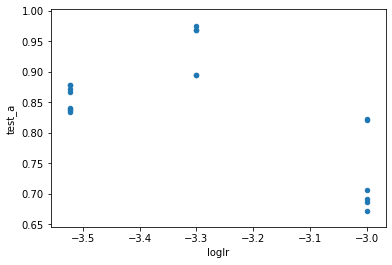

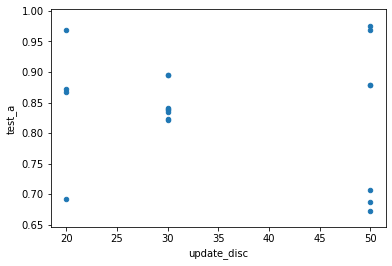

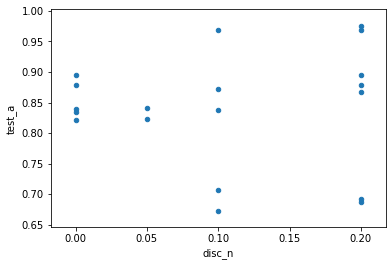

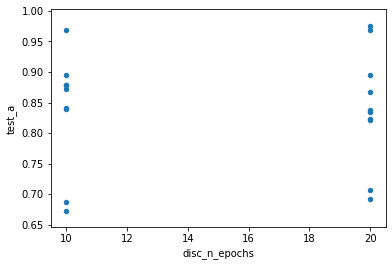

In [18]:
fdf = df[df.mdp == 'linear']
fdf['loglr'] = np.log10(fdf['lr'])
for k in ['loglr', 'update_disc', 'disc_n', 'disc_n_epochs']:
    fdf.plot.scatter(k, 'test_a')

# AIRL new code refactoring with regularized reward for disc

## 1001 linear in lmdp / gammdp

In [439]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1001' in x)]

for mdp, df2 in df.groupby('mdp'):
#     df2 = df2.sort_values('val_a', ascending=False)
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(15))

gam (23, 48)


name  \
226  1001_gammdp_linear_dlr0.001_aob1_sh0_ls0.0_ug20_s124_bs512_dn0.1_dns0.2   
177  1001_gammdp_linear_dlr0.001_ug20_s176_bs512_dn0.1_dns0.2                  
227  1001_gammdp_linear_dlr0.001_aob1_sh1_ls0.0_ug20_s177_bs512_dn0.1_dns0.2   
231  1001_gammdp_linear_dlr0.001_aob0_sh1_ls0.0_ug20_s60_bs512_dn0.05_dns0.2   
183  1001_gammdp_linear_dlr0.001_ug20_s157_bs512_dn0.2_dns0.2                  
173  1001_gammdp_linear_dlr0.001_ug20_s155_bs512_dn0.0_dns0.2                  
210  1001_gammdp_linear_dlr0.001_ug20_s82_bs512_dn0.0_dns0.2                   
168  1001_gammdp_linear_dlr0.001_ug20_s183_bs512_dn0.0_dns0.1                  
172  1001_gammdp_linear_dlr0.001_ug20_s79_bs512_dn0.1_dns0.2                   
212  1001_gammdp_linear_dlr0.001_ug20_s58_bs512_dn0.05_dns0.1                  
219  1001_gammdp_linear_dlr0.0002_aob1_sh0_ls0.0_ug20_s3_bs512_dn0.05_dns0.2   
178  1001_gammdp_linear_dlr0.001_ug20_s125_bs512_dn0.2_dns0.1                  
180  1001_gammdp_linear_dlr0.0002_ug20_s137_bs512_dn0.05_dns0.1                
162  1001_gammdp_linear_dlr0.0002_ug20_s60_bs512_dn0.0_dns0.1                  
161  1001_gammdp_linear_dlr0.0002_ug20_s107_bs512_dn0.1_dns0.1                 

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
226  22     3610         0.57385 -6.6238      0               0.59076           
177  6      1098         0.56205 -4.4173      0               0.52145           
227  21     3453         0.30845 -8.0466      0               0.64899           
231  56     8948         0.48470 -7.0736      0               0.69050           
183  15     2511         0.48515 -7.1941      0               0.44327           
173  8      1412         0.09675 -7.3064      0               0.35170           
210  99     15699        0.04400 -8.8438      0               0.21412           
168  6      1098         0.79060 -5.7441      0               0.55076           
172  1      313          0.78470 -3.9040      0               0.67888           
212  90     14286        0.09560 -7.7576      0               0.21796           
219  7      1255         0.00525 -9.8518      0               0.32883           
178  4      784          0.75340 -5.4102      0               0.65575           
180  5      941          0.11405 -8.4076      0               0.38659           
162  0      156          0.04375 -8.4653      0               0.76728           
161  0      156          0.00630 -9.5145      0               0.74936           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
226 -999.0           0.22081 -6.4490       0.008164         AIRLLightning   
177 -999.0           0.00253 -7.2757       0.048747         AIRLLightning   
227 -999.0           0.00209 -7.5630       0.006098         AIRLLightning   
231 -999.0           0.09702 -7.6937       0.007981         AIRLLightning   
183 -999.0           0.00355 -7.9515       0.010220         AIRLLightning   
173 -999.0           0.00403 -8.0672       0.020751         AIRLLightning   
210 -999.0           0.04483 -8.8830       0.038066         AIRLLightning   
168 -999.0           0.00000 -10.8980      0.022291         AIRLLightning   
172 -999.0           0.00000 -10.9470      0.048593         AIRLLightning   
212 -999.0           0.00000 -10.9710      0.042775         AIRLLightning   
219 -999.0           0.00000 -11.1170      0.034602         AIRLLightning   
178 -999.0           0.00000 -11.2060      0.065635         AIRLLightning   
180 -999.0           0.00000 -11.2290      0.013236         AIRLLightning   
162 -999.0           0.00000 -11.2360      0.021931         AIRLLightning   
161 -999.0           0.00000 -11.4200      0.045684         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
226  1     None    124   0              normal  0                  
177  1     None    176   0              normal  0                  
227  1     None    177   0              normal  0        

linear (64, 48)


name  epoch  \
245  1001_lmdp_linear_new_dlr0.0002_sh0_ug20_s44_bs512_dn0.1_dns0.2   37      
256  1001_lmdp_linear_new_dlr0.0002_sh1_ug20_s127_bs512_dn0.1_dns0.1  43      
292  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s74_bs512_dn0.0_dns0     84      
282  1001_lmdp_linear_new_dlr0.0004_sh0_ug20_s29_bs512_dn0.0_dns0     17      
244  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s23_bs512_dns0           23      
281  1001_lmdp_linear_new_dlr0.0002_sh0_ug20_s152_bs512_dn0.0_dns0    25      
295  1001_lmdp_linear_new_dlr0.0002_sh0_ug20_s63_bs512_dn0.0_dns0     45      
285  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s4_bs512_dn0.0_dns0      35      
287  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s53_bs512_dn0.1_dns0.1   36      
241  1001_lmdp_linear_new_dlr0.0004_sh0_ug20_s121_bs512_dns0          21      
254  1001_lmdp_linear_new_dlr0.0002_sh0_ug20_s4_bs512_dns0            37      
258  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s52_bs512_dn0.1_dns0.2   97      
233  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s60_bs512_dn0.1_dns0.1   22      
279  1001_lmdp_linear_new_dlr0.0004_sh1_ug20_s188_bs512_dn0.1_dns0.2  15      
247  1001_lmdp_linear_new_dlr0.0002_sh0_ug20_s56_bs512_dns0           24      

     global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
245  5965         0.98305  1.7302      0               0.69306           
256  6907         0.98965  1.6486      0               0.69643           
292  13344        0.97700  1.6955      0               0.68898           
282  2825         0.95105  1.7386      0               0.69470           
244  3767         0.96755  1.6889      0               0.69350           
281  4081         0.98135  1.7774      0               0.69087           
295  7221         0.97715  1.6674      0               0.69199           
285  5651         0.96550  1.7197      0               0.69262           
287  5808         0.97020  1.7230      0               0.69235           
241  3453         0.97440  1.6940      0               0.69193           
254  5965         0.99135  1.7137      0               0.69095           
258  15385        0.90315  1.6693      0               0.69211           
233  3610         0.90850  1.7065      0               0.68495           
279  2511         0.97095  1.7172      0               0.69136           
247  3924         0.99415  1.7114      0               0.69214           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
245  0.53436         0.86503  1.7233       0.003506         AIRLLightning   
256  0.36847         0.96690  1.7189       0.011844         AIRLLightning   
292  0.69586         0.87282  1.7150       0.013860         AIRLLightning   
282  0.42755         0.78738  1.7142       0.004046         AIRLLightning   
244  0.48285         0.94540  1.7097       0.013526         AIRLLightning   
281  0.64789         0.94235  1.7025       0.022300         AIRLLightning   
295  0.60382         0.93330  1.6976       0.031955         AIRLLightning   
285  0.55664         0.79574  1.6876       0.021875         AIRLLightning   
287  0.57733         0.69158  1.6821       0.015043         AIRLLightning   
241  0.59741         0.77450  1.6794       0.007600         AIRLLightning   
254  0.64368         0.78188  1.6733       0.013517         AIRLLightning   
258  0.58582         0.75456  1.6731       0.014814         AIRLLightning   
233  0.76941         0.79225  1.6727       0.018452         AIRLLightning   
279  0.61676         0.84709  1.6683       0.017978         AIRLLightning   
247  0.55505         0.98167  1.6657       0.007573         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
245  1     None    44    0              normal  0                  
256  1     None    127   0              normal  0                  
292  1     None    74    0              normal  0                  
282  1     None    29    0              normal  0                  
244  1     None    23    0              n

linear (44, 48)


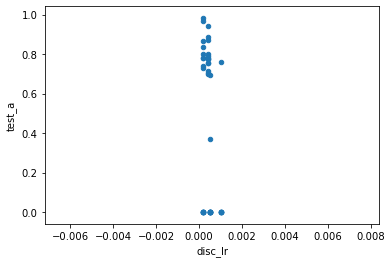

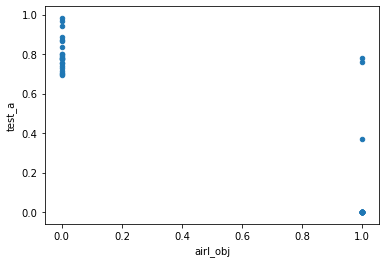

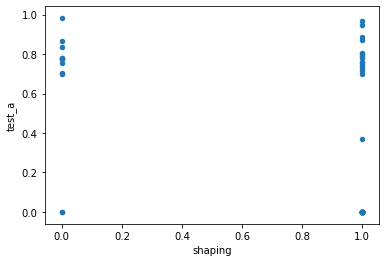

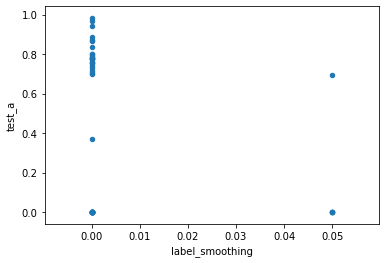

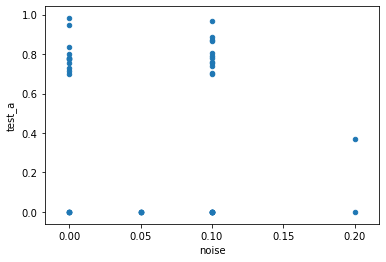

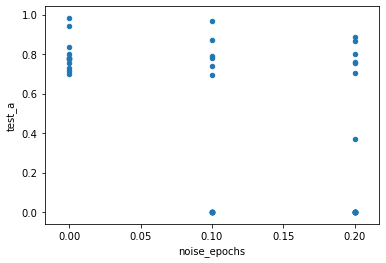

In [347]:
for mdp, df2 in df.groupby('mdp'):
    if mdp == 'gam': # skip gam mdp since model misspecification
        continue
    df2 = df2.sort_values('val_a', ascending=False)
    print(mdp, df2.shape)
    
    for k in ['disc_lr', 'airl_obj', 'shaping', 'label_smoothing', 'noise', 'noise_epochs']:
        df2.plot.scatter(k, 'test_a')
    plt.show()

## 1001 GAM in lmdp / gammdp

In [431]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1001' in x and 'new' in x)]

for mdp, df2 in df.groupby('mdp'):
#     df2 = df2.sort_values('val_a', ascending=False)
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (21, 58)


name  \
343  1001_gammdp_gam_new_dlr0.0002_sh0_nl2_nt400_ad1_td2_od0.1_ld0.0_cs1.0_an3000_ug20_s164_bs512_dns0           
316  1001_gammdp_gam_new_dlr0.0002_sh1_nl1_nt100_ad0_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s33_bs512_dns0            
320  1001_gammdp_gam_new_dlr0.0002_sh1_nl2_nt200_ad1_td2_od0.1_ld0.3_cs1.0_an3000_ug20_s76_bs512_dns0            
360  1001_gammdp_gam_new_dlr0.0002_sh1_nl2_nt400_ad0_td1_od0.0_ld0.0_cs1.0_an3000_ug20_s54_bs512_dn0.1_dns0.2    
305  1001_gammdp_gam_new_dlr0.0004_sh1_nl1_nt200_ad0_td2_od0.1_ld0.3_cs1.0_an3000_ug20_s163_bs512_dn0.1_dns0.2   
342  1001_gammdp_gam_new_dlr0.0004_sh1_nl1_nt200_ad1_td1_od0.1_ld0.3_cs1.0_an3000_ug20_s93_bs512_dn0.1_dns0.1    
307  1001_gammdp_gam_new_dlr0.0002_sh0_nl1_nt200_ad0_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s48_bs512_dn0.1_dns0.1    
336  1001_gammdp_gam_new_dlr0.0002_sh1_nl1_nt400_ad0_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s54_bs512_dn0.1_dns0.1    
346  1001_gammdp_gam_new_dlr0.0002_sh0_nl2_nt400_ad0_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s113_bs512_dns0           
335  1001_gammdp_gam_new_dlr0.0004_sh1_nl1_nt200_ad1_td2_od0.1_ld0.0_cs1.0_an3000_ug20_s134_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
343  54     8634         0.99730 -0.90245     0               0.70230           
316  15     2511         0.99845 -0.88172     0               0.69852           
320  8      1412         0.98875 -0.93715     0               0.75998           
360  70     11146        0.98245 -0.97300     0               0.70607           
305  9      1569         0.99075 -1.03280     0               0.75184           
342  78     12402        0.98725 -0.94380     0               0.70357           
307  21     3453         0.98130 -0.94463     0               0.69540           
336  95     15071        0.99935 -0.87508     0               0.68778           
346  46     7378         0.99905 -0.88833     0               0.68625           
335  36     5808         0.98245 -0.94195     0               0.68374           

     train_disc_auc   test_a  test_reward  test_reward_std  \
343  0.47589         0.98478 -0.89200      0.014803          
316  0.44794         0.99908 -0.89423      0.012587          
320  0.53558         0.97553 -0.93183      0.010496          
360  0.42975         0.97555 -0.93845      0.012791          
305  0.50452         0.95347 -0.94479      0.022909          
342  0.37915         0.95849 -0.96251      0.017430          
307  0.49634         0.95864 -0.96723      0.018852          
336  0.53845         0.95850 -0.97266      0.017636          
346  0.61505         0.95503 -0.97826      0.013556          
335  0.55750         0.95327 -0.97868      0.022786          

                       arch  gpus backend  seed  random_search     qos  \
343  AIRL_NODEGAM_Lightning  1     None    164   0              normal   
316  AIRL_NODEGAM_Lightning  1     None    33    0              normal   
320  AIRL_NODEGAM_Lightning  1     None    76    0              normal   
360  AIRL_NODEGAM_Lightning  1     None    54    0              normal   
305  AIRL_NODEGAM_Lightning  1     None    163   0              normal   
342  AIRL_NODEGAM_Lightning  1     None    93    0              normal   
307  AIRL_NODEGAM_Lightning  1     None    48    0              normal   
336  AIRL_NODEGAM_Lightning  1     None    54    0              normal   
346  AIRL_NODEGAM_Lightning  1     None    113   0              normal   
335  AIRL_NODEGAM_Lightning  1     None    134   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
343  0                 None              0               512.0       0.9     
316  0                 None              0               512.0       0.9     
320  0                 None              0               512.0       0.9     
360  0                 None              0               512.0       0.9     
305  0                 None              0               512.0       0.

linear (20, 58)


name  \
365  1001_lmdp_gam_new_dlr0.0002_sh1_nl2_nt100_ad0_td1_od0.1_ld0.3_cs0.5_an3000_ug20_s51_bs512_dn0.1_dns0.2    
377  1001_lmdp_gam_new_dlr0.0002_sh1_nl1_nt200_ad0_td2_od0.1_ld0.3_cs1.0_an3000_ug20_s115_bs512_dns0           
358  1001_lmdp_gam_new_dlr0.0004_sh1_nl2_nt100_ad1_td2_od0.0_ld0.3_cs1.0_an3000_ug20_s130_bs512_dn0.1_dns0.1   
324  1001_lmdp_gam_new_dlr0.0004_sh0_nl2_nt200_ad1_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s104_bs512_dns0           
306  1001_lmdp_gam_new_dlr0.0002_sh0_nl1_nt100_ad1_td1_od0.0_ld0.0_cs1.0_an3000_ug20_s143_bs512_dn0.1_dns0.1   
309  1001_lmdp_gam_new_dlr0.0004_sh0_nl1_nt400_ad0_td2_od0.0_ld0.0_cs1.0_an3000_ug20_s191_bs512_dn0.1_dns0.1   
372  1001_lmdp_gam_new_dlr0.0002_sh0_nl2_nt100_ad1_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s91_bs512_dns0            
384  1001_lmdp_gam_new_dlr0.0002_sh1_nl2_nt100_ad0_td1_od0.0_ld0.0_cs1.0_an3000_ug20_s159_bs512_dns0           
317  1001_lmdp_gam_new_dlr0.0004_sh0_nl2_nt400_ad1_td1_od0.1_ld0.0_cs0.5_an3000_ug20_s146_bs512_dns0           
347  1001_lmdp_gam_new_dlr0.0002_sh1_nl2_nt200_ad0_td1_od0.0_ld0.3_cs0.5_an3000_ug20_s85_bs512_dns0            

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
365  95     15071        0.90895  1.6802      0               0.68051           
377  98     15542        0.94920  1.7555      0               0.69416           
358  92     14600        0.94625  1.6697      0               0.69627           
324  32     5180         0.96710  1.7703      0               0.68961           
306  13     2197         0.95215  1.6844      0               0.70666           
309  17     2825         0.91010  1.6356      0               0.65711           
372  97     15385        0.91075  1.7217      0               0.69255           
384  93     14757        0.85520  1.7181      0               0.68928           
317  18     2982         0.87135  1.6711      0               0.79079           
347  29     4709         0.91365  1.6888      0               0.68906           

     train_disc_auc   test_a  test_reward  test_reward_std  \
365  0.67456         0.85773  1.7037       0.023192          
377  0.51514         0.80539  1.7026       0.008964          
358  0.52228         0.83279  1.6701       0.012510          
324  0.55878         0.73886  1.6701       0.012510          
306  0.37036         0.88268  1.6700       0.012543          
309  0.67743         0.76083  1.5947       0.011697          
372  0.53937         0.66798  1.5815       0.016803          
384  0.62775         0.67374  1.5796       0.019225          
317  0.31396         0.63717  1.5635       0.013739          
347  0.55634         0.61758  1.5612       0.007802          

                       arch  gpus backend  seed  random_search     qos  \
365  AIRL_NODEGAM_Lightning  1     None    51    0              normal   
377  AIRL_NODEGAM_Lightning  1     None    115   0              normal   
358  AIRL_NODEGAM_Lightning  1     None    130   0              normal   
324  AIRL_NODEGAM_Lightning  1     None    104   0              normal   
306  AIRL_NODEGAM_Lightning  1     None    143   0              normal   
309  AIRL_NODEGAM_Lightning  1     None    191   0              normal   
372  AIRL_NODEGAM_Lightning  1     None    91    0              normal   
384  AIRL_NODEGAM_Lightning  1     None    159   0              normal   
317  AIRL_NODEGAM_Lightning  1     None    146   0              normal   
347  AIRL_NODEGAM_Lightning  1     None    85    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
365  0                 None              0               512.0       0.9     
377  0                 None              0               512.0       0.9     
358  0                 None              0               512.0       0.9     
324  0                 None              0               512.0       0.9     
306  0                 None              0               512.0       0.9     
309  0       

gam (45, 58)


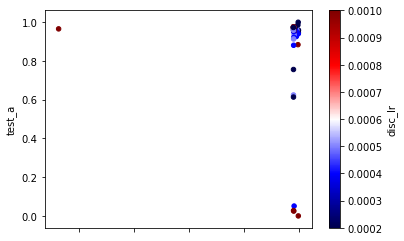

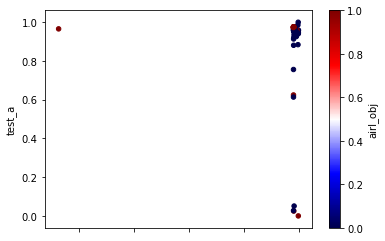

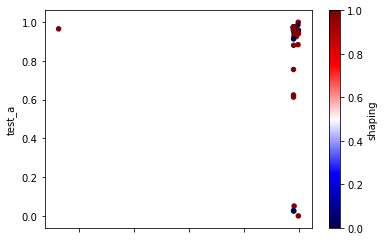

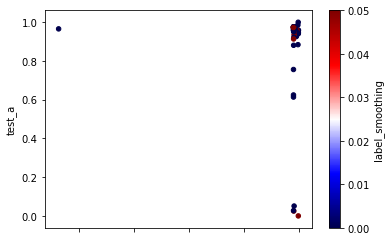

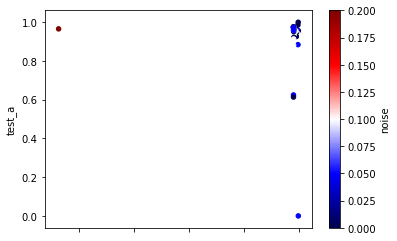

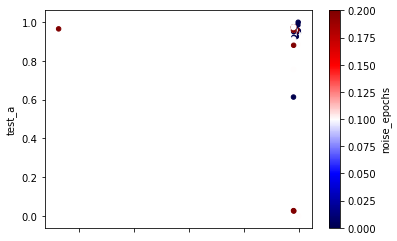

linear (54, 58)


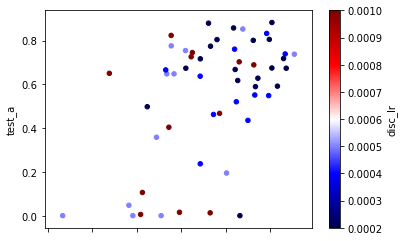

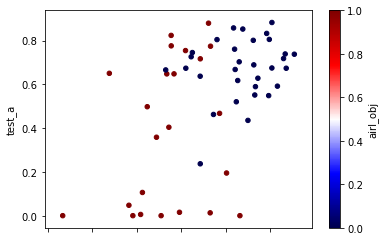

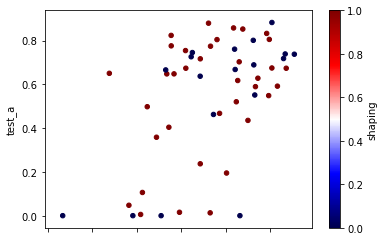

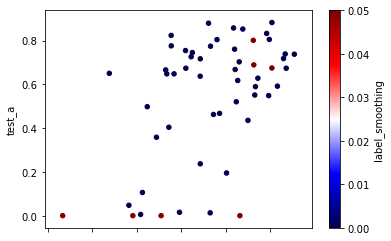

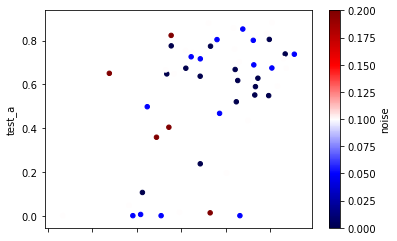

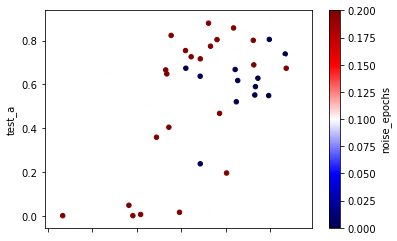

In [351]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
df = df[df.name.apply(lambda x: '1001' in x)]

for mdp, df2 in df.groupby('mdp'):
#     if mdp == 'gam': # skip gam mdp since model misspecification
#         continue
    df2 = df2.sort_values('val_a', ascending=False)
    print(mdp, df2.shape)
    
    for k in ['disc_lr', 'airl_obj', 'shaping', 'label_smoothing', 'noise', 'noise_epochs']:
        df2.plot.scatter('val_a', 'test_a', c=k, cmap='seismic')
    plt.show()

## 1004 (current) linear in lmdp / gammdp

In [354]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1004' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_a', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

linear (24, 48)


name  \
255  1004_lmdp_scurrent_linear_dlr0.0004_sh1_ug20_s63_bs512_dns0            
270  1004_lmdp_scurrent_linear_dlr0.0004_sh1_ug20_s31_bs512_dn0.1_dns0.1    
232  1004_lmdp_scurrent_linear_dlr0.0004_sh1_ug20_s187_bs512_dn0.1_dns0.1   
237  1004_lmdp_scurrent_linear_dlr0.0004_sh0_ug20_s84_bs512_dn0.1_dns0.1    
250  1004_lmdp_scurrent_linear_dlr0.0004_sh0_ug20_s129_bs512_dns0           
274  1004_lmdp_scurrent_linear_dlr0.0002_sh1_ug20_s129_bs512_dns0           
266  1004_lmdp_scurrent_linear_dlr0.0002_sh0_ug20_s197_bs512_dns0           
269  1004_lmdp_scurrent_linear_dlr0.0002_sh0_ug20_s149_bs512_dns0           
264  1004_lmdp_scurrent_linear_dlr0.0002_sh0_ug20_s105_bs512_dn0.1_dns0.2   
272  1004_lmdp_scurrent_linear_dlr0.0002_sh0_ug20_s192_bs512_dns0           

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
255  31     5023         0.96790  1.6586      0               0.69115           
270  87     13815        0.97245  1.7643      0               0.69158           
232  23     3767         0.98135  1.7160      0               0.69356           
237  12     2040         0.98960  1.6549      0               0.69136           
250  27     4395         0.99645  1.7094      0               0.69353           
274  74     11774        0.98175  1.7573      0               0.69263           
266  42     6750         0.98190  1.7359      0               0.69183           
269  50     8006         0.98410  1.6729      0               0.69251           
264  47     7535         0.97960  1.7535      0               0.69242           
272  54     8634         0.98045  1.7917      0               0.69191           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
255  0.60706         0.94861  1.6904       0.010779         AIRLLightning   
270  0.60498         0.94319  1.6565       0.010044         AIRLLightning   
232  0.48822         0.92499  1.6724       0.025228         AIRLLightning   
237  0.62323         0.88671  1.6793       0.001719         AIRLLightning   
250  0.51318         0.86530  1.6876       0.005143         AIRLLightning   
274  0.59131         0.84788  1.6527       0.025102         AIRLLightning   
266  0.67188         0.81822  1.6626       0.008579         AIRLLightning   
269  0.58789         0.81380  1.6702       0.012633         AIRLLightning   
264  0.56451         0.80238  1.6772       0.017378         AIRLLightning   
272  0.66785         0.77866  1.6398       0.029106         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
255  1     None    63    0              normal  0                  
270  1     None    31    0              normal  0                  
232  1     None    187   0              normal  0                  
237  1     None    84    0              normal  0                  
250  1     None    129   0              normal  0                  
274  1     None    129   0              normal  0                  
266  1     None    197   0              normal  0                  
269  1     None    149   0              normal  0                  
264  1     None    105   0              normal  0                  
272  1     None    192   0              normal  0                  

    load_from_hparams  notsave_epochs  batch_size  gamma  noise  noise_epochs  \
255  None              0               512         0.9    0.0    0.0            
270  None              0               512         0.9    0.1    0.1            
232  None              0               512         0.9    0.1    0.1            
237  None              0               512         0.9    0.1    0.1            
250  None              0               512         0.9    0.0    0.0            
274  None              0               512         0.9    0.0    0.0            
266  None              0               512         0.9    0.0    0.0            
269  None              0               512         0.9    0.0    0.0            
264

## 1004 (current) GAM in lmdp / gammdp

In [358]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1004' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_a', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (27, 58)


name  \
390  1004_gammdp_scurrent_gam_dlr0.0002_sh1_nl2_nt200_ad1_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s148_bs512_dns0           
382  1004_gammdp_scurrent_gam_dlr0.0002_sh1_nl1_nt400_ad0_td1_od0.0_ld0.3_cs1.0_an3000_ug20_s129_bs512_dns0           
364  1004_gammdp_scurrent_gam_dlr0.0004_sh1_nl1_nt200_ad1_td2_od0.0_ld0.0_cs1.0_an3000_ug20_s73_bs512_dn0.1_dns0.2    
330  1004_gammdp_scurrent_gam_dlr0.0004_sh0_nl1_nt200_ad1_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s19_bs512_dn0.1_dns0.2    
334  1004_gammdp_scurrent_gam_dlr0.0004_sh0_nl1_nt200_ad1_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s108_bs512_dn0.1_dns0.1   
337  1004_gammdp_scurrent_gam_dlr0.0002_sh0_nl2_nt100_ad0_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s170_bs512_dns0           
381  1004_gammdp_scurrent_gam_dlr0.0004_sh0_nl2_nt100_ad1_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s14_bs512_dns0            
340  1004_gammdp_scurrent_gam_dlr0.0002_sh1_nl2_nt100_ad1_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s141_bs512_dns0           
380  1004_gammdp_scurrent_gam_dlr0.0002_sh1_nl1_nt100_ad1_td2_od0.1_ld0.0_cs0.5_an3000_ug20_s61_bs512_dns0            
326  1004_gammdp_scurrent_gam_dlr0.0002_sh1_nl1_nt400_ad1_td2_od0.1_ld0.0_cs1.0_an3000_ug20_s162_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
390  69     10989        0.98135 -0.94802     0               0.69951           
382  83     13187        0.98130 -0.94616     0               0.69717           
364  44     7064         0.99455 -0.93364     0               0.68646           
330  65     10361        0.99440 -0.94308     0               0.70039           
334  40     6436         0.98445 -0.91070     0               0.70021           
337  36     5808         0.99850 -0.88530     0               0.69899           
381  64     10204        0.98135 -0.94802     0               0.68704           
340  21     3453         0.98130 -0.94463     0               0.69299           
380  55     8791         0.99390 -0.90088     0               0.69723           
326  11     1883         0.98230 -0.99907     0               0.71080           

     train_disc_auc   test_a  test_reward  test_reward_std  \
390  0.51819         0.97555 -0.93084      0.011745          
382  0.44482         0.97555 -0.93084      0.011745          
364  0.53729         0.97555 -0.93084      0.011745          
330  0.39532         0.97555 -0.93224      0.010728          
334  0.44202         0.97555 -0.93084      0.011745          
337  0.37378         0.97483 -0.95846      0.011395          
381  0.53516         0.97480 -0.96825      0.019353          
340  0.51440         0.97098 -1.00570      0.015697          
380  0.46173         0.96950 -0.97311      0.006289          
326  0.42706         0.96733 -0.93978      0.001640          

                       arch  gpus backend  seed  random_search     qos  \
390  AIRL_NODEGAM_Lightning  1     None    148   0              normal   
382  AIRL_NODEGAM_Lightning  1     None    129   0              normal   
364  AIRL_NODEGAM_Lightning  1     None    73    0              normal   
330  AIRL_NODEGAM_Lightning  1     None    19    0              normal   
334  AIRL_NODEGAM_Lightning  1     None    108   0              normal   
337  AIRL_NODEGAM_Lightning  1     None    170   0              normal   
381  AIRL_NODEGAM_Lightning  1     None    14    0              normal   
340  AIRL_NODEGAM_Lightning  1     None    141   0              normal   
380  AIRL_NODEGAM_Lightning  1     None    61    0              normal   
326  AIRL_NODEGAM_Lightning  1     None    162   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
390  0                 None              0               512.0       0.9     
382  0                 None              0               512.0       0.9     
364  0                 None              0               512.0       0.9     
330  0                 None              0               512.0       0.9     
334  0               

linear (21, 58)


name  \
344  1004_lmdp_scurrent_gam_dlr0.0002_sh1_nl1_nt400_ad0_td2_od0.1_ld0.3_cs1.0_an3000_ug20_s81_bs512_dns0            
318  1004_lmdp_scurrent_gam_dlr0.0004_sh1_nl1_nt200_ad0_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s194_bs512_dn0.1_dns0.2   
387  1004_lmdp_scurrent_gam_dlr0.0002_sh1_nl2_nt100_ad1_td2_od0.1_ld0.3_cs1.0_an3000_ug20_s87_bs512_dns0            
385  1004_lmdp_scurrent_gam_dlr0.0004_sh1_nl1_nt400_ad0_td1_od0.0_ld0.3_cs1.0_an3000_ug20_s143_bs512_dns0           
313  1004_lmdp_scurrent_gam_dlr0.0002_sh1_nl1_nt200_ad1_td2_od0.0_ld0.3_cs1.0_an3000_ug20_s135_bs512_dn0.1_dns0.2   
323  1004_lmdp_scurrent_gam_dlr0.0002_sh0_nl2_nt400_ad0_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s51_bs512_dns0            
311  1004_lmdp_scurrent_gam_dlr0.0002_sh0_nl2_nt400_ad1_td2_od0.0_ld0.3_cs1.0_an3000_ug20_s97_bs512_dn0.1_dns0.2    
362  1004_lmdp_scurrent_gam_dlr0.0002_sh0_nl1_nt400_ad1_td1_od0.1_ld0.3_cs1.0_an3000_ug20_s138_bs512_dns0           
355  1004_lmdp_scurrent_gam_dlr0.0004_sh0_nl2_nt200_ad0_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s129_bs512_dns0           
391  1004_lmdp_scurrent_gam_dlr0.0002_sh0_nl2_nt100_ad1_td1_od0.0_ld0.0_cs1.0_an3000_ug20_s46_bs512_dn0.1_dns0.1    

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
344  31     5023         0.95365  1.7043      0               0.69899           
318  23     3767         0.94440  1.7838      0               0.69113           
387  49     7849         0.93740  1.7426      0               0.68779           
385  87     13815        0.94235  1.7290      0               0.69191           
313  2      470          0.86035  1.7154      0               0.74051           
323  27     4395         0.87785  1.7278      0               0.69714           
311  16     2668         0.89580  1.6727      0               0.61561           
362  70     11146        0.96640  1.7003      0               0.68269           
355  50     8006         0.94000  1.7328      0               0.68008           
391  84     13344        0.90355  1.6602      0               0.68672           

     train_disc_auc   test_a  test_reward  test_reward_std  \
344  0.48853         0.88153  1.6815       0.021709          
318  0.55084         0.87053  1.6686       0.011968          
387  0.58856         0.86247  1.6697       0.029262          
385  0.54382         0.86153  1.6760       0.018761          
313  0.19208         0.83510  1.6385       0.022592          
323  0.48975         0.82740  1.6703       0.013341          
311  0.84174         0.81649  1.6060       0.016291          
362  0.61896         0.76896  1.5987       0.008135          
355  0.66632         0.76596  1.7008       0.010755          
391  0.62268         0.76353  1.5125       0.011947          

                       arch  gpus backend  seed  random_search     qos  \
344  AIRL_NODEGAM_Lightning  1     None    81    0              normal   
318  AIRL_NODEGAM_Lightning  1     None    194   0              normal   
387  AIRL_NODEGAM_Lightning  1     None    87    0              normal   
385  AIRL_NODEGAM_Lightning  1     None    143   0              normal   
313  AIRL_NODEGAM_Lightning  1     None    135   0              normal   
323  AIRL_NODEGAM_Lightning  1     None    51    0              normal   
311  AIRL_NODEGAM_Lightning  1     None    97    0              normal   
362  AIRL_NODEGAM_Lightning  1     None    138   0              normal   
355  AIRL_NODEGAM_Lightning  1     None    129   0              normal   
391  AIRL_NODEGAM_Lightning  1     None    46    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
344  0                 None              0               512.0       0.9     
318  0                 None              0               512.0       0.9     
387  0                 None              0               512.0       0.9     
385  0                 None              0               512.0       0.9     
313  0                 None              

## 1010 FCNN in lmdp / gammdp

In [389]:
df = pd.read_csv('./results/AIRL_FCNN_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1010' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_a', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (25, 42)


name  \
82  1010_gammdp_fcnn_dlr0.0002_sh0_dnl5_dnh32_ddr0.3_ug20_s139_bs512_dn0.0_dns0     
98  1010_gammdp_fcnn_dlr0.0002_sh1_dnl2_dnh64_ddr0.3_ug20_s130_bs512_dn0.1_dns0.2   
62  1010_gammdp_fcnn_dlr0.0004_sh0_dnl2_dnh32_ddr0.1_ug20_s16_bs512_dn0.1_dns0.1    
8   1010_gammdp_fcnn_dlr0.0004_sh1_dnl5_dnh64_ddr0.3_ug20_s160_bs512_dn0.1_dns0.1   
65  1010_gammdp_fcnn_dlr0.0002_sh1_dnl2_dnh128_ddr0.1_ug20_s44_bs512_dn0.0_dns0     
77  1010_gammdp_fcnn_dlr0.0002_sh1_dnl5_dnh32_ddr0.1_ug20_s17_bs512_dn0.0_dns0      
0   1010_gammdp_fcnn_dlr0.0004_sh0_dnl4_dnh256_ddr0.1_ug20_s49_bs512_dn0.0_dns0     
30  1010_gammdp_fcnn_dlr0.0004_sh0_dnl5_dnh64_ddr0.1_ug20_s185_bs512_dn0.0_dns0     
72  1010_gammdp_fcnn_dlr0.0002_sh1_dnl2_dnh64_ddr0.1_ug20_s28_bs512_dn0.0_dns0      
78  1010_gammdp_fcnn_dlr0.0002_sh0_dnl3_dnh64_ddr0.5_ug20_s46_bs512_dn0.1_dns0.1    

    epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
82  45     7221         0.98645 -0.94910     0               0.69420           
98  71     11303        0.99875 -0.89093     0               0.70120           
62  31     5023         0.98220 -0.92689     0               0.69487           
8   4      784          0.98490 -0.99012     0               0.70138           
65  32     5180         0.98705 -0.91560     0               0.70867           
77  33     5337         0.97710 -0.96221     0               0.69260           
0   2      470          0.94410 -2.29000     0               0.69287           
30  16     2668         0.97060 -0.92663     0               0.69752           
72  38     6122         0.98240 -0.94579     0               0.69532           
78  35     5651         0.99920 -0.90927     0               0.69540           

    train_disc_auc   test_a  test_reward  test_reward_std  \
82  0.47150         0.97387 -0.94686      0.010178          
98  0.42883         0.96430 -0.99864      0.009900          
62  0.49512         0.96251 -1.01380      0.011869          
8   0.51282         0.95850 -0.95337      0.014197          
65  0.45892         0.95840 -0.96505      0.017150          
77  0.50311         0.95492 -1.01840      0.026060          
0   0.51892         0.93392 -1.06870      0.012860          
30  0.51550         0.93243 -1.07130      0.017821          
72  0.49615         0.93220 -1.11280      0.006669          
78  0.47107         0.93093 -1.07180      0.021027          

                   arch  gpus backend  seed  random_search     qos  \
82  AIRL_FCNN_Lightning  1     None    139   0              normal   
98  AIRL_FCNN_Lightning  1     None    130   0              normal   
62  AIRL_FCNN_Lightning  1     None    16    0              normal   
8   AIRL_FCNN_Lightning  1     None    160   0              normal   
65  AIRL_FCNN_Lightning  1     None    44    0              normal   
77  AIRL_FCNN_Lightning  1     None    17    0              normal   
0   AIRL_FCNN_Lightning  1     None    49    0              normal   
30  AIRL_FCNN_Lightning  1     None    185   0              normal   
72  AIRL_FCNN_Lightning  1     None    28    0              normal   
78  AIRL_FCNN_Lightning  1     None    46    0              normal   

    ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
82  0                 None              0               512         0.9     
98  0                 None              0               512         0.9     
62  0                 None              0               512         0.9     
8   0                 None              0               512         0.9     
65  0                 None              0               512         0.9     
77  0                 None              0               512         0.9     
0   0                 None              0               512         0.9     
30  0                 None              0               512         0.9     
72  0                 None              0               512         0.9     
78  0                 None              0      

linear (25, 42)


name  \
115  1010_lmdp_fcnn_dlr0.0002_sh1_dnl4_dnh32_ddr0.3_ug20_s5_bs512_dn0.0_dns0       
131  1010_lmdp_fcnn_dlr0.0002_sh0_dnl2_dnh64_ddr0.5_ug20_s191_bs512_dn0.1_dns0.2   
48   1010_lmdp_fcnn_dlr0.0004_sh1_dnl4_dnh32_ddr0.5_ug20_s25_bs512_dn0.0_dns0      
18   1010_lmdp_fcnn_dlr0.0004_sh0_dnl3_dnh32_ddr0.3_ug20_s33_bs512_dn0.0_dns0      
47   1010_lmdp_fcnn_dlr0.0002_sh1_dnl3_dnh64_ddr0.5_ug20_s84_bs512_dn0.0_dns0      
110  1010_lmdp_fcnn_dlr0.0002_sh1_dnl2_dnh32_ddr0.1_ug20_s155_bs512_dn0.1_dns0.2   
64   1010_lmdp_fcnn_dlr0.0004_sh0_dnl2_dnh64_ddr0.1_ug20_s119_bs512_dn0.0_dns0     
71   1010_lmdp_fcnn_dlr0.0002_sh1_dnl2_dnh128_ddr0.5_ug20_s108_bs512_dn0.0_dns0    
25   1010_lmdp_fcnn_dlr0.0002_sh1_dnl2_dnh64_ddr0.5_ug20_s27_bs512_dn0.0_dns0      
104  1010_lmdp_fcnn_dlr0.0004_sh1_dnl2_dnh128_ddr0.5_ug20_s69_bs512_dn0.0_dns0     

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
115  81     12873        0.96350  1.7134      0               0.68867           
131  53     8477         0.95430  1.7073      0               0.69807           
48   15     2511         0.90725  1.7491      0               0.69312           
18   17     2825         0.89650  1.6473      0               0.69401           
47   18     2982         0.91940  1.6762      0               0.67351           
110  64     10204        0.80145  1.7471      0               0.68477           
64   39     6279         0.87375  1.6842      0               0.74347           
71   27     4395         0.91290  1.7270      0               0.68537           
25   15     2511         0.90580  1.7239      0               0.69571           
104  85     13501        0.82525  1.6147      0               0.64997           

     train_disc_auc   test_a  test_reward  test_reward_std  \
115  0.61389         0.92116  1.6873       0.009191          
131  0.48352         0.91320  1.6983       0.010100          
48   0.51361         0.84499  1.6516       0.004161          
18   0.50171         0.80101  1.6336       0.009109          
47   0.65027         0.79072  1.6596       0.013973          
110  0.59637         0.75256  1.6662       0.015549          
64   0.45544         0.74291  1.5229       0.012904          
71   0.57086         0.74122  1.5964       0.012336          
25   0.51050         0.73864  1.6088       0.023930          
104  0.66235         0.69469  1.5701       0.001707          

                    arch  gpus backend  seed  random_search     qos  \
115  AIRL_FCNN_Lightning  1     None    5     0              normal   
131  AIRL_FCNN_Lightning  1     None    191   0              normal   
48   AIRL_FCNN_Lightning  1     None    25    0              normal   
18   AIRL_FCNN_Lightning  1     None    33    0              normal   
47   AIRL_FCNN_Lightning  1     None    84    0              normal   
110  AIRL_FCNN_Lightning  1     None    155   0              normal   
64   AIRL_FCNN_Lightning  1     None    119   0              normal   
71   AIRL_FCNN_Lightning  1     None    108   0              normal   
25   AIRL_FCNN_Lightning  1     None    27    0              normal   
104  AIRL_FCNN_Lightning  1     None    69    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
115  0                 None              0               512         0.9     
131  0                 None              0               512         0.9     
48   0                 None              0               512         0.9     
18   0                 None              0               512         0.9     
47   0                 None              0               512         0.9     
110  0                 None              0               512         0.9     
64   0                 None              0               512         0.9     
71   0                 None              0               512         0.9     
25   0                 None              0               512         0.9     
104  0        

## 1011 FCNN (current) in lmdp / gammdp

In [440]:
df = pd.read_csv('./results/AIRL_FCNN_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1011' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (25, 42)


name  \
89   1011_gammdp_fcnn_scurrent_dlr0.0004_sh0_dnl2_dnh64_ddr0.3_ug20_s144_bs512_dn0.0_dns0      
56   1011_gammdp_fcnn_scurrent_dlr0.0002_sh1_dnl4_dnh32_ddr0.5_ug20_s127_bs512_dn0.0_dns0      
10   1011_gammdp_fcnn_scurrent_dlr0.0004_sh1_dnl2_dnh64_ddr0.1_ug20_s183_bs512_dn0.0_dns0      
45   1011_gammdp_fcnn_scurrent_dlr0.0002_sh0_dnl3_dnh128_ddr0.3_ug20_s126_bs512_dn0.0_dns0     
43   1011_gammdp_fcnn_scurrent_dlr0.0002_sh0_dnl4_dnh64_ddr0.5_ug20_s157_bs512_dn0.1_dns0.2    
106  1011_gammdp_fcnn_scurrent_dlr0.0004_sh1_dnl5_dnh32_ddr0.5_ug20_s59_bs512_dn0.0_dns0       
63   1011_gammdp_fcnn_scurrent_dlr0.0004_sh1_dnl5_dnh32_ddr0.3_ug20_s174_bs512_dn0.0_dns0      
58   1011_gammdp_fcnn_scurrent_dlr0.0002_sh1_dnl4_dnh32_ddr0.1_ug20_s140_bs512_dn0.1_dns0.2    
109  1011_gammdp_fcnn_scurrent_dlr0.0002_sh1_dnl2_dnh64_ddr0.3_ug20_s21_bs512_dn0.0_dns0       
28   1011_gammdp_fcnn_scurrent_dlr0.0002_sh0_dnl3_dnh128_ddr0.3_ug20_s179_bs512_dn0.1_dns0.1   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
89   41     6593         0.99455 -0.89514     0               0.69141           
56   13     2197         0.98190 -0.96084     0               0.68937           
10   7      1255         0.99420 -0.91336     0               0.68347           
45   13     2197         0.99360 -0.95151     0               0.70305           
43   14     2354         0.99010 -0.92406     0               0.69376           
106  33     5337         0.98080 -0.90629     0               0.69079           
63   19     3139         0.98925 -0.94765     0               0.69617           
58   14     2354         0.99415 -0.94915     0               0.69198           
109  56     8948         0.98735 -0.87880     0               0.69100           
28   11     1883         0.97955 -0.94324     0               0.72011           

     train_disc_auc   test_a  test_reward  test_reward_std  \
89   0.50037         0.99069 -0.91851      0.011716          
56   0.57324         0.97555 -0.93084      0.011745          
10   0.53937         0.97555 -0.93084      0.011745          
45   0.45160         0.97115 -0.95168      0.012562          
43   0.49963         0.95815 -0.97163      0.008732          
106  0.54175         0.96201 -0.98611      0.025858          
63   0.49774         0.95568 -1.01530      0.030501          
58   0.54193         0.93690 -1.01820      0.008331          
109  0.50458         0.94112 -1.03010      0.010157          
28   0.43109         0.94021 -1.03410      0.004648          

                    arch  gpus backend  seed  random_search     qos  \
89   AIRL_FCNN_Lightning  1     None    144   0              normal   
56   AIRL_FCNN_Lightning  1     None    127   0              normal   
10   AIRL_FCNN_Lightning  1     None    183   0              normal   
45   AIRL_FCNN_Lightning  1     None    126   0              normal   
43   AIRL_FCNN_Lightning  1     None    157   0              normal   
106  AIRL_FCNN_Lightning  1     None    59    0              normal   
63   AIRL_FCNN_Lightning  1     None    174   0              normal   
58   AIRL_FCNN_Lightning  1     None    140   0              normal   
109  AIRL_FCNN_Lightning  1     None    21    0              normal   
28   AIRL_FCNN_Lightning  1     None    179   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
89   0                 None              0               512         0.9     
56   0                 None              0               512         0.9     
10   0                 None              0               512         0.9     
45   0                 None              0               512         0.9     
43   0                 None              0               512         0.9     
106  0                 None              0               512         0.9     
63   0                 None              0               512         0.9     
58   0                 None              0        

linear (25, 42)


name  \
114  1011_lmdp_fcnn_scurrent_dlr0.0002_sh1_dnl2_dnh64_ddr0.3_ug20_s0_bs512_dn0.1_dns0.1     
113  1011_lmdp_fcnn_scurrent_dlr0.0004_sh1_dnl2_dnh64_ddr0.3_ug20_s85_bs512_dn0.0_dns0      
85   1011_lmdp_fcnn_scurrent_dlr0.0004_sh0_dnl2_dnh64_ddr0.1_ug20_s188_bs512_dn0.1_dns0.2   
127  1011_lmdp_fcnn_scurrent_dlr0.0002_sh0_dnl2_dnh32_ddr0.1_ug20_s66_bs512_dn0.1_dns0.1    
133  1011_lmdp_fcnn_scurrent_dlr0.0002_sh1_dnl2_dnh64_ddr0.3_ug20_s63_bs512_dn0.0_dns0      
108  1011_lmdp_fcnn_scurrent_dlr0.0002_sh0_dnl2_dnh256_ddr0.5_ug20_s42_bs512_dn0.1_dns0.1   
51   1011_lmdp_fcnn_scurrent_dlr0.0002_sh0_dnl2_dnh256_ddr0.5_ug20_s14_bs512_dn0.0_dns0     
75   1011_lmdp_fcnn_scurrent_dlr0.0004_sh0_dnl3_dnh64_ddr0.5_ug20_s78_bs512_dn0.0_dns0      
123  1011_lmdp_fcnn_scurrent_dlr0.0004_sh1_dnl4_dnh32_ddr0.3_ug20_s58_bs512_dn0.1_dns0.1    
69   1011_lmdp_fcnn_scurrent_dlr0.0002_sh1_dnl3_dnh128_ddr0.3_ug20_s53_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
114  46     7378         0.95155  1.6866      0               0.69616           
113  93     14757        0.88290  1.6560      0               0.69592           
85   22     3610         0.91790  1.7817      0               0.68283           
127  70     11146        0.91810  1.6397      0               0.68831           
133  40     6436         0.93995  1.7569      0               0.68045           
108  89     14129        0.85625  1.6216      0               0.68777           
51   17     2825         0.84280  1.6066      0               0.70370           
75   33     5337         0.89790  1.6807      0               0.68680           
123  69     10989        0.90130  1.7085      0               0.70194           
69   29     4709         0.86845  1.6559      0               0.70814           

     train_disc_auc   test_a  test_reward  test_reward_std  \
114  0.47699         0.87342  1.6635       0.010400          
113  0.50665         0.81554  1.6626       0.018425          
85   0.61969         0.86294  1.6315       0.018576          
127  0.56763         0.90360  1.6153       0.017477          
133  0.62549         0.83722  1.6088       0.023930          
108  0.58563         0.84922  1.6088       0.023930          
51   0.51477         0.74240  1.6015       0.001126          
75   0.61365         0.80914  1.5919       0.012008          
123  0.46350         0.68718  1.5611       0.002442          
69   0.45612         0.60830  1.5409       0.008077          

                    arch  gpus backend  seed  random_search     qos  \
114  AIRL_FCNN_Lightning  1     None    0     0              normal   
113  AIRL_FCNN_Lightning  1     None    85    0              normal   
85   AIRL_FCNN_Lightning  1     None    188   0              normal   
127  AIRL_FCNN_Lightning  1     None    66    0              normal   
133  AIRL_FCNN_Lightning  1     None    63    0              normal   
108  AIRL_FCNN_Lightning  1     None    42    0              normal   
51   AIRL_FCNN_Lightning  1     None    14    0              normal   
75   AIRL_FCNN_Lightning  1     None    78    0              normal   
123  AIRL_FCNN_Lightning  1     None    58    0              normal   
69   AIRL_FCNN_Lightning  1     None    53    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
114  0                 None              0               512         0.9     
113  0                 None              0               512         0.9     
85   0                 None              0               512         0.9     
127  0                 None              0               512         0.9     
133  0                 None              0               512         0.9     
108  0                 None              0               512         0.9     
51   0                 None              0               512         0.9     
75   0                 None              0               512         0.9     
12

# AIRL Simulation Gamma=0.5

## 1012 linear in lmdp / gammdp

In [483]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1012' in x)]

for mdp, df2 in df.groupby('mdp'):
#     df2 = df2.sort_values('val_a', ascending=False)
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(15))

gam (25, 48)


name  \
339  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s139_bs512_dn0.1_dns0.1   
322  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s0_bs512_dn0.0_dns0       
342  1012_gammdp_linear_g0.5_dlr0.0002_sh0_ug20_s14_bs512_dn0.0_dns0      
332  1012_gammdp_linear_g0.5_dlr0.0004_sh1_ug20_s136_bs512_dn0.1_dns0.1   
320  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s102_bs512_dn0.0_dns0     
340  1012_gammdp_linear_g0.5_dlr0.0004_sh1_ug20_s0_bs512_dn0.1_dns0.2     
326  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s33_bs512_dn0.1_dns0.1    
338  1012_gammdp_linear_g0.5_dlr0.0004_sh0_ug20_s16_bs512_dn0.1_dns0.2    
319  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s159_bs512_dn0.0_dns0     
312  1012_gammdp_linear_g0.5_dlr0.0004_sh0_ug20_s31_bs512_dn0.0_dns0      
344  1012_gammdp_linear_g0.5_dlr0.0004_sh0_ug20_s29_bs512_dn0.0_dns0      
341  1012_gammdp_linear_g0.5_dlr0.0004_sh1_ug20_s13_bs512_dn0.0_dns0      
318  1012_gammdp_linear_g0.5_dlr0.0004_sh1_ug20_s175_bs512_dn0.1_dns0.1   
305  1012_gammdp_linear_g0.5_dlr0.0002_sh1_ug20_s146_bs512_dn0.1_dns0.1   
301  1012_gammdp_linear_g0.5_dlr0.0004_sh1_ug20_s102_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
339  87     13815        0.91170 -0.98074     0               0.69328           
322  68     10832        0.84210 -0.98882     0               0.70323           
342  58     9262         0.95925 -0.95665     0               0.69285           
332  68     10832        0.97235 -0.95029     0               0.69836           
320  64     10204        0.79110 -0.99170     0               0.68862           
340  68     10832        0.96905 -1.00810     0               0.69392           
326  55     8791         0.61865 -1.11330     0               0.69091           
338  60     9576         0.96910 -1.04710     0               0.69272           
319  87     13815        0.91625 -0.86273     0               0.69201           
312  36     5808         0.96910 -1.01160     0               0.69293           
344  58     9262         0.96990 -1.02300     0               0.69374           
341  65     10361        0.72790 -1.03930     0               0.69417           
318  63     10047        0.96910 -1.01160     0               0.69189           
305  32     5180         0.96825 -1.01410     0               0.69268           
301  19     3139         0.96970 -1.01140     0               0.70714           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
339  0.50067         0.48044 -0.91988      0.006106         AIRLLightning   
322  0.17853         0.75128 -0.92972      0.001848         AIRLLightning   
342  0.54810         0.78894 -0.98971      0.004501         AIRLLightning   
332  0.32739         0.92720 -1.00260      0.012316         AIRLLightning   
320  0.60120         0.68601 -1.01230      0.009518         AIRLLightning   
340  0.53656         0.73319 -1.02930      0.008433         AIRLLightning   
326  0.57660         0.39806 -1.03680      0.001746         AIRLLightning   
338  0.59155         0.57300 -1.03730      0.005457         AIRLLightning   
319  0.61731         0.61510 -1.06260      0.004105         AIRLLightning   
312  0.57874         0.80005 -1.06640      0.008886         AIRLLightning   
344  0.43457         0.29214 -1.06690      0.007995         AIRLLightning   
341  0.46283         0.69964 -1.17630      0.004667         AIRLLightning   
318  0.53790         0.34990 -1.25580      0.011136         AIRLLightning   
305  0.49408         0.23341 -1.26030      0.016667         AIRLLightning   
301  0.40039         0.76476 -1.26220      0.010232         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
339  1     None    139   0              normal  0                  
322  1     None    0     0              normal  0                  
342  1     None    14    0              normal  0                  
332  1     None    136   0              normal  0               

linear (25, 48)


name  epoch  \
308  1012_lmdp_linear_g0.5_dlr0.0002_sh0_ug20_s66_bs512_dn0.1_dns0.2   22      
297  1012_lmdp_linear_g0.5_dlr0.0004_sh1_ug20_s12_bs512_dn0.0_dns0     10      
300  1012_lmdp_linear_g0.5_dlr0.0004_sh0_ug20_s116_bs512_dn0.0_dns0    8       
316  1012_lmdp_linear_g0.5_dlr0.0004_sh1_ug20_s179_bs512_dn0.1_dns0.2  39      
315  1012_lmdp_linear_g0.5_dlr0.0004_sh1_ug20_s8_bs512_dn0.0_dns0      83      
307  1012_lmdp_linear_g0.5_dlr0.0004_sh0_ug20_s40_bs512_dn0.1_dns0.1   21      
317  1012_lmdp_linear_g0.5_dlr0.0002_sh1_ug20_s21_bs512_dn0.0_dns0     64      
303  1012_lmdp_linear_g0.5_dlr0.0002_sh1_ug20_s31_bs512_dn0.1_dns0.1   26      
329  1012_lmdp_linear_g0.5_dlr0.0002_sh1_ug20_s13_bs512_dn0.0_dns0     95      
323  1012_lmdp_linear_g0.5_dlr0.0002_sh1_ug20_s67_bs512_dn0.1_dns0.1   71      
296  1012_lmdp_linear_g0.5_dlr0.0004_sh0_ug20_s94_bs512_dn0.1_dns0.2   5       
306  1012_lmdp_linear_g0.5_dlr0.0002_sh0_ug20_s151_bs512_dn0.1_dns0.2  35      
321  1012_lmdp_linear_g0.5_dlr0.0002_sh0_ug20_s195_bs512_dn0.1_dns0.2  52      
304  1012_lmdp_linear_g0.5_dlr0.0002_sh0_ug20_s151_bs512_dn0.0_dns0    24      
324  1012_lmdp_linear_g0.5_dlr0.0004_sh1_ug20_s28_bs512_dn0.1_dns0.2   59      

     global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
308  3610         0.99950  0.34174     0               0.69230           
297  1726         1.00000  0.34079     0               0.71318           
300  1412         0.99510  0.34079     0               0.69420           
316  6279         0.98555  0.34079     0               0.69358           
315  13187        0.99540  0.34079     0               0.69739           
307  3453         0.98525  0.34877     0               0.69470           
317  10204        0.97660  0.33562     0               0.69823           
303  4238         0.99430  0.34147     0               0.69259           
329  15071        0.99360  0.33573     0               0.68756           
323  11303        0.99360  0.34390     0               0.68832           
296  941          1.00000  0.34079     0               0.67672           
306  5651         0.99540  0.34079     0               0.69640           
321  8320         0.98995  0.34079     0               0.69498           
304  3924         0.99575  0.34079     0               0.69824           
324  9419         0.98600  0.34079     0               0.68956           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
308  0.56854         0.96739  0.34310      0.003088         AIRLLightning   
297  0.20325         0.97159  0.34282      0.002878         AIRLLightning   
300  0.48010         0.86522  0.34259      0.001319         AIRLLightning   
316  0.51617         0.97733  0.34191      0.002529         AIRLLightning   
315  0.34418         0.97164  0.34191      0.002529         AIRLLightning   
307  0.24915         0.97678  0.34191      0.002529         AIRLLightning   
317  0.35999         0.93219  0.33998      0.002034         AIRLLightning   
303  0.46289         0.82009  0.33796      0.004534         AIRLLightning   
329  0.62878         0.98957  0.33775      0.003438         AIRLLightning   
323  0.60065         0.82049  0.33393      0.008780         AIRLLightning   
296  0.63171         0.80295  0.33207      0.001714         AIRLLightning   
306  0.36707         0.85957  0.33129      0.002285         AIRLLightning   
321  0.35675         0.87516  0.33122      0.001785         AIRLLightning   
304  0.32458         0.85417  0.32949      0.003537         AIRLLightning   
324  0.63641         0.72668  0.32630      0.008262         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
308  1     None    66    0              normal  0                  
297  1     None    12    0              normal  0                  
300  1     None    116   0              normal  0                  
316  1     None    179   0              normal  0                  
315  1     None    8     0

In [403]:
# for mdp, df2 in df.groupby('mdp'):
#     if mdp == 'gam': # skip gam mdp since model misspecification
#         continue
#     df2 = df2.sort_values('val_a', ascending=False)
#     print(mdp, df2.shape)
    
#     for k in ['disc_lr', 'airl_obj', 'shaping', 'label_smoothing', 'noise', 'noise_epochs']:
#         df2.plot.scatter(k, 'test_a')
#     plt.show()

## 1012 GAM in lmdp / gammdp

In [428]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1012' in x)]

for mdp, df2 in df.groupby('mdp'):
#     df2 = df2.sort_values('val_a', ascending=False)
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (20, 58)


name  \
420  1012_gammdp_gam_g0.5_dlr0.0004_sh1_nl1_nt400_ad1_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s174_bs512_dn0.0_dns0     
398  1012_gammdp_gam_g0.5_dlr0.0002_sh0_nl2_nt400_ad1_td2_od0.1_ld0.0_cs0.5_an3000_ug20_s180_bs512_dn0.1_dns0.2   
396  1012_gammdp_gam_g0.5_dlr0.0002_sh0_nl1_nt400_ad1_td2_od0.0_ld0.0_cs1.0_an3000_ug20_s5_bs512_dn0.1_dns0.2     
392  1012_gammdp_gam_g0.5_dlr0.0002_sh0_nl2_nt200_ad0_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s82_bs512_dn0.0_dns0      
429  1012_gammdp_gam_g0.5_dlr0.0004_sh1_nl2_nt400_ad1_td1_od0.1_ld0.3_cs0.5_an3000_ug20_s166_bs512_dn0.0_dns0     
402  1012_gammdp_gam_g0.5_dlr0.0004_sh0_nl1_nt400_ad0_td1_od0.0_ld0.0_cs1.0_an3000_ug20_s90_bs512_dn0.0_dns0      
410  1012_gammdp_gam_g0.5_dlr0.0002_sh0_nl1_nt100_ad1_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s110_bs512_dn0.1_dns0.1   
407  1012_gammdp_gam_g0.5_dlr0.0002_sh1_nl1_nt200_ad0_td2_od0.0_ld0.3_cs1.0_an3000_ug20_s197_bs512_dn0.1_dns0.2   
394  1012_gammdp_gam_g0.5_dlr0.0002_sh1_nl1_nt100_ad0_td2_od0.0_ld0.0_cs1.0_an3000_ug20_s68_bs512_dn0.0_dns0      
393  1012_gammdp_gam_g0.5_dlr0.0004_sh0_nl1_nt100_ad0_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s136_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
420  47     7535         1.00000 -0.36364     0               0.70864           
398  19     3139         1.00000 -0.36364     0               0.69463           
396  25     4081         1.00000 -0.36364     0               0.69801           
392  10     1726         1.00000 -0.36364     0               0.70229           
429  45     7221         0.99985 -0.36542     0               0.70996           
402  36     5808         0.99995 -0.36542     0               0.69608           
410  72     11460        1.00000 -0.36364     0               0.69550           
407  33     5337         0.99990 -0.36670     0               0.70531           
394  9      1569         0.99885 -0.36705     0               0.70849           
393  15     2511         0.99900 -0.36788     0               0.69185           

     train_disc_auc   test_a  test_reward  test_reward_std  \
420  0.31439         0.99979 -0.35664      0.001414          
398  0.50317         0.99976 -0.35764      0.003134          
396  0.43610         0.99953 -0.36070      0.001151          
392  0.33337         0.99861 -0.36266      0.005570          
429  0.49695         0.99577 -0.36577      0.002522          
402  0.44653         0.99665 -0.36819      0.004083          
410  0.34753         0.71962 -0.37043      0.004587          
407  0.57715         0.96665 -0.37514      0.003538          
394  0.35223         0.98778 -0.37553      0.010052          
393  0.54218         0.99508 -0.37609      0.005455          

                       arch  gpus backend  seed  random_search     qos  \
420  AIRL_NODEGAM_Lightning  1     None    174   0              normal   
398  AIRL_NODEGAM_Lightning  1     None    180   0              normal   
396  AIRL_NODEGAM_Lightning  1     None    5     0              normal   
392  AIRL_NODEGAM_Lightning  1     None    82    0              normal   
429  AIRL_NODEGAM_Lightning  1     None    166   0              normal   
402  AIRL_NODEGAM_Lightning  1     None    90    0              normal   
410  AIRL_NODEGAM_Lightning  1     None    110   0              normal   
407  AIRL_NODEGAM_Lightning  1     None    197   0              normal   
394  AIRL_NODEGAM_Lightning  1     None    68    0              normal   
393  AIRL_NODEGAM_Lightning  1     None    136   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
420  0                 None              0               512.0       0.5     
398  0                 None              0               512.0       0.5     
396  0                 None              0               512.0       0.5     
392  0                 None              0               512.0       0.5     
429  0                 None              0               512.

linear (20, 58)


name  \
424  1012_lmdp_gam_g0.5_dlr0.0004_sh1_nl1_nt200_ad0_td1_od0.0_ld0.3_cs1.0_an3000_ug20_s19_bs512_dn0.0_dns0      
431  1012_lmdp_gam_g0.5_dlr0.0004_sh1_nl1_nt200_ad1_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s115_bs512_dn0.1_dns0.2   
414  1012_lmdp_gam_g0.5_dlr0.0004_sh1_nl2_nt200_ad0_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s168_bs512_dn0.0_dns0     
417  1012_lmdp_gam_g0.5_dlr0.0004_sh1_nl2_nt100_ad0_td1_od0.0_ld0.3_cs0.5_an3000_ug20_s181_bs512_dn0.0_dns0     
405  1012_lmdp_gam_g0.5_dlr0.0002_sh0_nl2_nt100_ad0_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s75_bs512_dn0.0_dns0      
426  1012_lmdp_gam_g0.5_dlr0.0002_sh0_nl2_nt100_ad0_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s118_bs512_dn0.1_dns0.1   
406  1012_lmdp_gam_g0.5_dlr0.0002_sh0_nl2_nt100_ad0_td1_od0.1_ld0.0_cs0.5_an3000_ug20_s39_bs512_dn0.0_dns0      
421  1012_lmdp_gam_g0.5_dlr0.0004_sh0_nl2_nt100_ad0_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s15_bs512_dn0.1_dns0.2    
428  1012_lmdp_gam_g0.5_dlr0.0004_sh1_nl2_nt100_ad0_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s188_bs512_dn0.0_dns0     
416  1012_lmdp_gam_g0.5_dlr0.0002_sh0_nl1_nt400_ad0_td1_od0.0_ld0.3_cs1.0_an3000_ug20_s59_bs512_dn0.0_dns0      

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
424  71     11303        0.98575  0.34079     0               0.69008           
431  46     7378         0.99950  0.34079     0               0.69607           
414  31     5023         0.99940  0.34079     0               0.69317           
417  34     5494         0.99940  0.34079     0               0.69624           
405  34     5494         0.98310  0.34079     0               0.68925           
426  52     8320         0.99490  0.34079     0               0.69414           
406  18     2982         0.99945  0.34079     0               0.67778           
421  92     14600        0.98210  0.33161     0               0.69274           
428  64     10204        0.99885  0.34279     0               0.69805           
416  52     8320         0.98570  0.34079     0               0.69687           

     train_disc_auc   test_a  test_reward  test_reward_std  \
424  0.66461         0.97783  0.34219      0.002683          
431  0.36847         0.98621  0.34191      0.002529          
414  0.51154         0.97723  0.34191      0.002527          
417  0.54120         0.97645  0.33976      0.003545          
405  0.59729         0.96273  0.33613      0.004233          
426  0.48773         0.83194  0.33501      0.001059          
406  0.65009         0.92770  0.33377      0.003534          
421  0.51465         0.66666  0.33368      0.002637          
428  0.36591         0.75530  0.32966      0.002736          
416  0.46454         0.79505  0.32948      0.004433          

                       arch  gpus backend  seed  random_search     qos  \
424  AIRL_NODEGAM_Lightning  1     None    19    0              normal   
431  AIRL_NODEGAM_Lightning  1     None    115   0              normal   
414  AIRL_NODEGAM_Lightning  1     None    168   0              normal   
417  AIRL_NODEGAM_Lightning  1     None    181   0              normal   
405  AIRL_NODEGAM_Lightning  1     None    75    0              normal   
426  AIRL_NODEGAM_Lightning  1     None    118   0              normal   
406  AIRL_NODEGAM_Lightning  1     None    39    0              normal   
421  AIRL_NODEGAM_Lightning  1     None    15    0              normal   
428  AIRL_NODEGAM_Lightning  1     None    188   0              normal   
416  AIRL_NODEGAM_Lightning  1     None    59    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
424  0                 None              0               512.0       0.5     
431  0                 None              0               512.0       0.5     
414  0                 None              0               512.0       0.5     
417  0                 None              0               512.0       0.5     
405  0                 None              0               512.0       0.5     
426

In [405]:
# df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '1001' in x)]

# for mdp, df2 in df.groupby('mdp'):
# #     if mdp == 'gam': # skip gam mdp since model misspecification
# #         continue
#     df2 = df2.sort_values('val_a', ascending=False)
#     print(mdp, df2.shape)
    
#     for k in ['disc_lr', 'airl_obj', 'shaping', 'label_smoothing', 'noise', 'noise_epochs']:
#         df2.plot.scatter('val_a', 'test_a', c=k, cmap='seismic')
#     plt.show()

## 1013 (current) linear in lmdp / gammdp

In [482]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1013' in x)]

for mdp, df2 in df.groupby('mdp'):
#     df2 = df2.sort_values('test_a', ascending=False)
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (20, 48)


name  \
375  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh1_ug20_s171_bs512_dn0.0_dns0     
370  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh0_ug20_s120_bs512_dn0.1_dns0.2   
382  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh1_ug20_s76_bs512_dn0.1_dns0.2    
374  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh1_ug20_s9_bs512_dn0.0_dns0       
385  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh0_ug20_s90_bs512_dn0.1_dns0.2    
377  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh1_ug20_s22_bs512_dn0.0_dns0      
384  1013_gammdp_scurrent_linear_g0.5_dlr0.0004_sh0_ug20_s181_bs512_dn0.1_dns0.1   
378  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh0_ug20_s71_bs512_dn0.0_dns0      
373  1013_gammdp_scurrent_linear_g0.5_dlr0.0004_sh1_ug20_s37_bs512_dn0.0_dns0      
371  1013_gammdp_scurrent_linear_g0.5_dlr0.0002_sh1_ug20_s110_bs512_dn0.1_dns0.1   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
375  64     10204        0.71820 -1.1592      0               0.69445           
370  13     2197         0.52970 -1.1929      0               0.69324           
382  39     6279         0.96715 -1.0205      0               0.67851           
374  95     15071        0.67565 -1.0544      0               0.69257           
385  52     8320         0.54505 -1.1036      0               0.69374           
377  77     12245        0.85610 -1.3034      0               0.68799           
384  43     6907         0.96150 -1.0375      0               0.69355           
378  22     3610         0.93850 -1.0187      0               0.69341           
373  95     15071        0.18745 -1.3518      0               0.69186           
371  10     1726         0.08735 -1.5076      0               0.66901           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
375  0.50256         0.49946 -0.97974      0.009239         AIRLLightning   
370  0.47681         0.29717 -1.00350      0.002668         AIRLLightning   
382  0.73260         0.36130 -1.08530      0.002882         AIRLLightning   
374  0.57031         0.40605 -1.13520      0.007807         AIRLLightning   
385  0.35065         0.46249 -1.14150      0.005250         AIRLLightning   
377  0.59808         0.50220 -1.14230      0.004073         AIRLLightning   
384  0.46973         0.49534 -1.22090      0.009126         AIRLLightning   
378  0.43970         0.39611 -1.34530      0.007516         AIRLLightning   
373  0.51758         0.12151 -1.39180      0.001890         AIRLLightning   
371  0.75903         0.03361 -1.46260      0.006282         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
375  1     None    171   0              normal  0                  
370  1     None    120   0              normal  0                  
382  1     None    76    0              normal  0                  
374  1     None    9     0              normal  0                  
385  1     None    90    0              normal  0                  
377  1     None    22    0              normal  0                  
384  1     None    181   0              normal  0                  
378  1     None    71    0              normal  0                  
373  1     None    37    0              normal  0                  
371  1     None    110   0              normal  0                  

    load_from_hparams  notsave_epochs  batch_size  gamma  noise  noise_epochs  \
375  None              0               512         0.5    0.0    0.0            
370  None              0               512         0.5    0.1    0.2            
382  None              0               512         0.5    0.1    0.2            
374  None              0               512         0.5    0.0    0.0            
385  None              0               512         0.5    0.1    0.2            
377  None              0               512         0.5    0.0    0.0            
384  None              0               512         0.5    0.1    0.1            
378  None     

linear (20, 48)


name  \
355  1013_lmdp_scurrent_linear_g0.5_dlr0.0002_sh0_ug20_s70_bs512_dn0.0_dns0      
346  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh0_ug20_s177_bs512_dn0.0_dns0     
360  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh0_ug20_s108_bs512_dn0.0_dns0     
365  1013_lmdp_scurrent_linear_g0.5_dlr0.0002_sh0_ug20_s110_bs512_dn0.0_dns0     
351  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh1_ug20_s194_bs512_dn0.1_dns0.2   
349  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh1_ug20_s29_bs512_dn0.0_dns0      
354  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh1_ug20_s8_bs512_dn0.0_dns0       
362  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh0_ug20_s81_bs512_dn0.1_dns0.2    
353  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh1_ug20_s8_bs512_dn0.1_dns0.2     
363  1013_lmdp_scurrent_linear_g0.5_dlr0.0004_sh0_ug20_s89_bs512_dn0.0_dns0      

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
355  30     4866         0.99515  0.34079     0               0.69382           
346  11     1883         0.99530  0.34079     0               0.68683           
360  26     4238         0.99945  0.34079     0               0.69363           
365  71     11303        0.99940  0.34079     0               0.69196           
351  77     12245        0.98675  0.33649     0               0.68928           
349  96     15228        0.99770  0.34030     0               0.69071           
354  84     13344        0.99430  0.34089     0               0.69979           
362  39     6279         0.98600  0.34174     0               0.69307           
353  84     13344        0.99440  0.34126     0               0.69207           
363  58     9262         0.99575  0.34079     0               0.69210           

     train_disc_auc   test_a  test_reward  test_reward_std           arch  \
355  0.44183         0.96715  0.34256      0.002425         AIRLLightning   
346  0.62604         0.96811  0.34191      0.002529         AIRLLightning   
360  0.39203         0.96745  0.34191      0.002529         AIRLLightning   
365  0.61340         0.99826  0.34191      0.002529         AIRLLightning   
351  0.61450         0.98357  0.34180      0.004008         AIRLLightning   
349  0.58063         0.99718  0.34130      0.002806         AIRLLightning   
354  0.41321         0.92365  0.34071      0.002856         AIRLLightning   
362  0.52155         0.82285  0.33935      0.001131         AIRLLightning   
353  0.54333         0.91612  0.33534      0.002043         AIRLLightning   
363  0.65088         0.92461  0.33514      0.003462         AIRLLightning   

     gpus backend  seed  random_search     qos  ignore_prev_runs  \
355  1     None    70    0              normal  0                  
346  1     None    177   0              normal  0                  
360  1     None    108   0              normal  0                  
365  1     None    110   0              normal  0                  
351  1     None    194   0              normal  0                  
349  1     None    29    0              normal  0                  
354  1     None    8     0              normal  0                  
362  1     None    81    0              normal  0                  
353  1     None    8     0              normal  0                  
363  1     None    89    0              normal  0                  

    load_from_hparams  notsave_epochs  batch_size  gamma  noise  noise_epochs  \
355  None              0               512         0.5    0.0    0.0            
346  None              0               512         0.5    0.0    0.0            
360  None              0               512         0.5    0.0    0.0            
365  None              0               512         0.5    0.0    0.0            
351  None              0               512         0.5    0.1    0.2            
349  None              0               512         0.5    0.0    0.0            
354  None              0               512         0.5    0.0    0.0            
362  None              0          

## 1013 (current) GAM in lmdp / gammdp

In [429]:
df = pd.read_csv('./results/AIRL_NODEGAM_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1013' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (25, 58)


name  \
435  1013_gammdp_scurrent_gam_g0.5_dlr0.0002_sh0_nl1_nt400_ad0_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s110_bs512_dn0.0_dns0     
442  1013_gammdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl1_nt400_ad1_td1_od0.1_ld0.0_cs0.5_an3000_ug20_s84_bs512_dn0.0_dns0      
440  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl2_nt400_ad0_td2_od0.1_ld0.0_cs1.0_an3000_ug20_s191_bs512_dn0.0_dns0     
437  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl1_nt100_ad0_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s145_bs512_dn0.0_dns0     
439  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh0_nl1_nt400_ad1_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s155_bs512_dn0.1_dns0.1   
443  1013_gammdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl1_nt400_ad1_td2_od0.0_ld0.0_cs0.5_an3000_ug20_s154_bs512_dn0.1_dns0.2   
448  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl2_nt200_ad1_td2_od0.1_ld0.3_cs0.5_an3000_ug20_s82_bs512_dn0.1_dns0.2    
472  1013_gammdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl1_nt100_ad1_td2_od0.0_ld0.3_cs1.0_an3000_ug20_s119_bs512_dn0.1_dns0.1   
451  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl1_nt100_ad1_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s14_bs512_dn0.1_dns0.2    
458  1013_gammdp_scurrent_gam_g0.5_dlr0.0004_sh0_nl2_nt100_ad0_td1_od0.1_ld0.3_cs1.0_an3000_ug20_s127_bs512_dn0.0_dns0     

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
435  13     2197         1.00000 -0.36364     0               0.69954           
442  23     3767         1.00000 -0.36364     0               0.69451           
440  14     2354         0.99995 -0.35982     0               0.71073           
437  13     2197         1.00000 -0.36364     0               0.69247           
439  23     3767         1.00000 -0.36364     0               0.69568           
443  26     4238         0.99605 -0.36821     0               0.70991           
448  15     2511         0.99995 -0.36914     0               0.69163           
472  78     12402        1.00000 -0.36288     0               0.69670           
451  31     5023         1.00000 -0.36364     0               0.70556           
458  60     9576         1.00000 -0.36364     0               0.69328           

     train_disc_auc   test_a  test_reward  test_reward_std  \
435  0.45001         0.99918 -0.35726      0.004284          
442  0.51514         0.99979 -0.35773      0.003205          
440  0.37054         0.99237 -0.35839      0.006026          
437  0.55542         1.00000 -0.35848      0.002637          
439  0.48840         0.99906 -0.36033      0.001071          
443  0.28717         0.99561 -0.36102      0.007920          
448  0.55035         0.99853 -0.36174      0.002577          
472  0.42029         0.99774 -0.36241      0.002335          
451  0.44440         0.99574 -0.36340      0.002680          
458  0.48364         0.94741 -0.36456      0.006313          

                       arch  gpus backend  seed  random_search     qos  \
435  AIRL_NODEGAM_Lightning  1     None    110   0              normal   
442  AIRL_NODEGAM_Lightning  1     None    84    0              normal   
440  AIRL_NODEGAM_Lightning  1     None    191   0              normal   
437  AIRL_NODEGAM_Lightning  1     None    145   0              normal   
439  AIRL_NODEGAM_Lightning  1     None    155   0              normal   
443  AIRL_NODEGAM_Lightning  1     None    154   0              normal   
448  AIRL_NODEGAM_Lightning  1     None    82    0              normal   
472  AIRL_NODEGAM_Lightning  1     None    119   0              normal   
451  AIRL_NODEGAM_Lightning  1     None    14    0              normal   
458  AIRL_NODEGAM_Lightning  1     None    127   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
435  0                 None              0               512.0       0.5     
442  0                 None              0               512.0       0.5     
440  0                 None              0               512.0       0.5     
437  0                 None              0       

linear (25, 58)


name  \
444  1013_lmdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl1_nt400_ad1_td1_od0.1_ld0.0_cs1.0_an3000_ug20_s148_bs512_dn0.1_dns0.1   
481  1013_lmdp_scurrent_gam_g0.5_dlr0.0004_sh0_nl1_nt100_ad1_td1_od0.1_ld0.3_cs0.5_an3000_ug20_s8_bs512_dn0.1_dns0.1     
452  1013_lmdp_scurrent_gam_g0.5_dlr0.0004_sh0_nl2_nt100_ad0_td1_od0.0_ld0.0_cs0.5_an3000_ug20_s77_bs512_dn0.0_dns0      
454  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl2_nt200_ad0_td1_od0.1_ld0.0_cs0.5_an3000_ug20_s157_bs512_dn0.1_dns0.1   
480  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl2_nt200_ad0_td1_od0.0_ld0.3_cs1.0_an3000_ug20_s100_bs512_dn0.0_dns0     
447  1013_lmdp_scurrent_gam_g0.5_dlr0.0004_sh1_nl1_nt100_ad1_td2_od0.0_ld0.0_cs1.0_an3000_ug20_s175_bs512_dn0.0_dns0     
462  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl2_nt200_ad1_td2_od0.1_ld0.0_cs0.5_an3000_ug20_s52_bs512_dn0.0_dns0      
449  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh0_nl2_nt200_ad1_td1_od0.1_ld0.3_cs0.5_an3000_ug20_s131_bs512_dn0.0_dns0     
475  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh0_nl1_nt100_ad0_td1_od0.0_ld0.3_cs0.5_an3000_ug20_s184_bs512_dn0.1_dns0.2   
476  1013_lmdp_scurrent_gam_g0.5_dlr0.0002_sh1_nl1_nt400_ad1_td2_od0.0_ld0.3_cs0.5_an3000_ug20_s196_bs512_dn0.0_dns0     

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
444  32     5180         0.99975  0.34079     0               0.69850           
481  49     7849         0.99950  0.35134     0               0.69126           
452  27     4395         0.99530  0.34079     0               0.69318           
454  26     4238         0.99490  0.34079     0               0.68762           
480  57     9105         0.98620  0.34079     0               0.69598           
447  27     4395         0.99920  0.34079     0               0.68756           
462  22     3610         0.99415  0.34263     0               0.68754           
449  34     5494         0.99920  0.34079     0               0.70532           
475  62     9890         0.99550  0.34079     0               0.69734           
476  49     7849         0.99950  0.34079     0               0.70215           

     train_disc_auc   test_a  test_reward  test_reward_std  \
444  0.47772         0.97713  0.34440      0.004124          
481  0.60010         0.97723  0.34243      0.002912          
452  0.47421         0.99267  0.34213      0.005734          
454  0.57123         0.99421  0.34191      0.002529          
480  0.49200         0.97622  0.34191      0.002529          
447  0.62482         0.89729  0.34005      0.004823          
462  0.57611         0.95759  0.33902      0.003557          
449  0.46576         0.96125  0.33885      0.004080          
475  0.45233         0.81525  0.33808      0.001632          
476  0.50549         0.99309  0.33694      0.001991          

                       arch  gpus backend  seed  random_search     qos  \
444  AIRL_NODEGAM_Lightning  1     None    148   0              normal   
481  AIRL_NODEGAM_Lightning  1     None    8     0              normal   
452  AIRL_NODEGAM_Lightning  1     None    77    0              normal   
454  AIRL_NODEGAM_Lightning  1     None    157   0              normal   
480  AIRL_NODEGAM_Lightning  1     None    100   0              normal   
447  AIRL_NODEGAM_Lightning  1     None    175   0              normal   
462  AIRL_NODEGAM_Lightning  1     None    52    0              normal   
449  AIRL_NODEGAM_Lightning  1     None    131   0              normal   
475  AIRL_NODEGAM_Lightning  1     None    184   0              normal   
476  AIRL_NODEGAM_Lightning  1     None    196   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
444  0                 None              0               512.0       0.5     
481  0                 None              0               512.0       0.5     
452  0                 None              0               512.0       0.5     
454  0                 None              0               512.0       

## 1012 FCNN in lmdp / gammdp

In [437]:
df = pd.read_csv('./results/AIRL_FCNN_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1012' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (25, 42)


name  \
137  1012_gammdp_fcnn_g0.5_dlr0.0002_sh1_dnl5_dnh64_ddr0.5_ug20_s130_bs512_dn0.1_dns0.2    
118  1012_gammdp_fcnn_g0.5_dlr0.0002_sh1_dnl3_dnh128_ddr0.3_ug20_s164_bs512_dn0.1_dns0.2   
138  1012_gammdp_fcnn_g0.5_dlr0.0004_sh0_dnl2_dnh32_ddr0.1_ug20_s4_bs512_dn0.1_dns0.2      
143  1012_gammdp_fcnn_g0.5_dlr0.0002_sh0_dnl2_dnh128_ddr0.5_ug20_s134_bs512_dn0.1_dns0.2   
148  1012_gammdp_fcnn_g0.5_dlr0.0004_sh0_dnl2_dnh64_ddr0.1_ug20_s26_bs512_dn0.1_dns0.2     
145  1012_gammdp_fcnn_g0.5_dlr0.0002_sh0_dnl2_dnh64_ddr0.1_ug20_s92_bs512_dn0.1_dns0.2     
139  1012_gammdp_fcnn_g0.5_dlr0.0004_sh0_dnl5_dnh256_ddr0.5_ug20_s138_bs512_dn0.1_dns0.1   
146  1012_gammdp_fcnn_g0.5_dlr0.0002_sh1_dnl2_dnh256_ddr0.1_ug20_s16_bs512_dn0.1_dns0.1    
147  1012_gammdp_fcnn_g0.5_dlr0.0002_sh1_dnl4_dnh32_ddr0.1_ug20_s190_bs512_dn0.1_dns0.2    
87   1012_gammdp_fcnn_g0.5_dlr0.0002_sh0_dnl5_dnh64_ddr0.5_ug20_s183_bs512_dn0.0_dns0      

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
137  31     5023         0.99990 -0.36364     0               0.69550           
118  21     3453         1.00000 -0.36855     0               0.70483           
138  95     15071        1.00000 -0.36364     0               0.69829           
143  68     10832        0.99995 -0.36823     0               0.69210           
148  83     13187        0.99905 -0.35251     0               0.68810           
145  66     10518        0.99830 -0.36804     0               0.69683           
139  50     8006         1.00000 -0.36364     0               0.72320           
146  67     10675        0.99845 -0.36529     0               0.71801           
147  67     10675        0.99915 -0.36832     0               0.69512           
87   6      1098         1.00000 -0.36364     0               0.69972           

     train_disc_auc   test_a  test_reward  test_reward_std  \
137  0.43896         0.99980 -0.35660      0.003944          
118  0.41058         0.99980 -0.35762      0.001563          
138  0.40967         0.99289 -0.36091      0.001882          
143  0.53497         0.99519 -0.36361      0.010544          
148  0.56952         0.87034 -0.36941      0.001726          
145  0.47491         0.99430 -0.37091      0.006661          
139  0.36725         0.98189 -0.37269      0.002715          
146  0.39990         0.99201 -0.37496      0.000335          
147  0.48480         0.99188 -0.37552      0.003515          
87   0.45251         0.99257 -0.39402      0.004424          

                    arch  gpus backend  seed  random_search     qos  \
137  AIRL_FCNN_Lightning  1     None    130   0              normal   
118  AIRL_FCNN_Lightning  1     None    164   0              normal   
138  AIRL_FCNN_Lightning  1     None    4     0              normal   
143  AIRL_FCNN_Lightning  1     None    134   0              normal   
148  AIRL_FCNN_Lightning  1     None    26    0              normal   
145  AIRL_FCNN_Lightning  1     None    92    0              normal   
139  AIRL_FCNN_Lightning  1     None    138   0              normal   
146  AIRL_FCNN_Lightning  1     None    16    0              normal   
147  AIRL_FCNN_Lightning  1     None    190   0              normal   
87   AIRL_FCNN_Lightning  1     None    183   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
137  0                 None              0               512         0.5     
118  0                 None              0               512         0.5     
138  0                 None              0               512         0.5     
143  0                 None              0               512         0.5     
148  0                 None              0               512         0.5     
145  0                 None              0               512         0.5     
139  0                 None              0               512         0.5     
146  0                 None              0               512         0.5     
147  0      

linear (25, 42)


name  \
102  1012_lmdp_fcnn_g0.5_dlr0.0002_sh1_dnl2_dnh64_ddr0.3_ug20_s37_bs512_dn0.1_dns0.2    
83   1012_lmdp_fcnn_g0.5_dlr0.0002_sh0_dnl2_dnh32_ddr0.5_ug20_s115_bs512_dn0.1_dns0.2   
105  1012_lmdp_fcnn_g0.5_dlr0.0002_sh0_dnl3_dnh64_ddr0.3_ug20_s39_bs512_dn0.0_dns0      
67   1012_lmdp_fcnn_g0.5_dlr0.0004_sh1_dnl3_dnh128_ddr0.5_ug20_s44_bs512_dn0.0_dns0     
99   1012_lmdp_fcnn_g0.5_dlr0.0004_sh0_dnl3_dnh32_ddr0.3_ug20_s67_bs512_dn0.1_dns0.2    
81   1012_lmdp_fcnn_g0.5_dlr0.0002_sh0_dnl4_dnh32_ddr0.5_ug20_s188_bs512_dn0.1_dns0.2   
119  1012_lmdp_fcnn_g0.5_dlr0.0002_sh0_dnl3_dnh32_ddr0.3_ug20_s164_bs512_dn0.0_dns0     
95   1012_lmdp_fcnn_g0.5_dlr0.0002_sh0_dnl4_dnh64_ddr0.1_ug20_s74_bs512_dn0.1_dns0.1    
96   1012_lmdp_fcnn_g0.5_dlr0.0004_sh0_dnl2_dnh256_ddr0.1_ug20_s127_bs512_dn0.0_dns0    
126  1012_lmdp_fcnn_g0.5_dlr0.0002_sh1_dnl4_dnh64_ddr0.3_ug20_s121_bs512_dn0.1_dns0.2   

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
102  67     10675        0.99545  0.33810     0               0.69564           
83   28     4552         0.99960  0.34079     0               0.69540           
105  87     13815        0.99945  0.34263     0               0.70557           
67   28     4552         0.99805  0.33197     0               0.69802           
99   38     6122         0.99935  0.34079     0               0.69094           
81   21     3453         0.98555  0.34079     0               0.69245           
119  55     8791         0.99965  0.34079     0               0.69090           
95   24     3924         0.99455  0.33888     0               0.70171           
96   40     6436         0.98850  0.34406     0               0.68375           
126  83     13187        0.99555  0.34079     0               0.69169           

     train_disc_auc   test_a  test_reward  test_reward_std  \
102  0.45575         0.99324  0.34323      0.004326          
83   0.42963         0.99783  0.34191      0.002529          
105  0.33337         0.99920  0.34184      0.002513          
67   0.46497         0.90483  0.34113      0.004147          
99   0.53876         0.88177  0.34045      0.001975          
81   0.55914         0.95776  0.34041      0.006647          
119  0.58624         0.97016  0.33991      0.000926          
95   0.50146         0.97891  0.33925      0.002083          
96   0.59332         0.97602  0.33859      0.000427          
126  0.54810         0.83523  0.33550      0.003138          

                    arch  gpus backend  seed  random_search     qos  \
102  AIRL_FCNN_Lightning  1     None    37    0              normal   
83   AIRL_FCNN_Lightning  1     None    115   0              normal   
105  AIRL_FCNN_Lightning  1     None    39    0              normal   
67   AIRL_FCNN_Lightning  1     None    44    0              normal   
99   AIRL_FCNN_Lightning  1     None    67    0              normal   
81   AIRL_FCNN_Lightning  1     None    188   0              normal   
119  AIRL_FCNN_Lightning  1     None    164   0              normal   
95   AIRL_FCNN_Lightning  1     None    74    0              normal   
96   AIRL_FCNN_Lightning  1     None    127   0              normal   
126  AIRL_FCNN_Lightning  1     None    121   0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
102  0                 None              0               512         0.5     
83   0                 None              0               512         0.5     
105  0                 None              0               512         0.5     
67   0                 None              0               512         0.5     
99   0                 None              0               512         0.5     
81   0                 None              0               512         0.5     
119  0                 None              0               512         0.5     
95   0                 None              0               512         0.5     
96   0                 None              0

## 1013 FCNN (current) in lmdp / gammdp

In [438]:
df = pd.read_csv('./results/AIRL_FCNN_Lightning_results.csv')
# df = df[df.name.apply(lambda x: '0719' not in x)]
# df = df[df.name.apply(lambda x: '0715' not in x)]

# df = df[df.name.apply(lambda x: 'eps' in x)]
df = df[df.name.apply(lambda x: '1013' in x)]

for mdp, df2 in df.groupby('mdp'):
    df2 = df2.sort_values('test_reward', ascending=False)
    print(mdp, df2.shape)
    display(df2.head(10))

gam (25, 42)


name  \
169  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl3_dnh32_ddr0.1_ug20_s62_bs512_dn0.0_dns0       
158  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh1_dnl5_dnh64_ddr0.1_ug20_s87_bs512_dn0.1_dns0.1     
173  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl2_dnh256_ddr0.5_ug20_s14_bs512_dn0.1_dns0.2    
180  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl5_dnh64_ddr0.3_ug20_s133_bs512_dn0.0_dns0      
185  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0004_sh1_dnl4_dnh32_ddr0.1_ug20_s169_bs512_dn0.0_dns0      
176  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0004_sh1_dnl2_dnh128_ddr0.1_ug20_s101_bs512_dn0.1_dns0.1   
196  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh1_dnl5_dnh32_ddr0.1_ug20_s137_bs512_dn0.0_dns0      
191  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0004_sh1_dnl5_dnh256_ddr0.5_ug20_s127_bs512_dn0.1_dns0.1   
184  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0004_sh0_dnl5_dnh128_ddr0.5_ug20_s30_bs512_dn0.0_dns0      
187  1013_gammdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl5_dnh64_ddr0.3_ug20_s53_bs512_dn0.0_dns0       

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
169  31     5023         0.99930 -0.35873     0               0.69809           
158  12     2040         1.00000 -0.36397     0               0.70685           
173  33     5337         0.99995 -0.36950     0               0.69914           
180  84     13344        0.99915 -0.37108     0               0.69433           
185  63     10047        0.99900 -0.35144     0               0.69320           
176  54     8634         0.99955 -0.36425     0               0.68646           
196  85     13501        0.99910 -0.34663     0               0.69486           
191  65     10361        1.00000 -0.36364     0               0.69214           
184  50     8006         1.00000 -0.36364     0               0.70267           
187  85     13501        0.99935 -0.35473     0               0.69259           

     train_disc_auc   test_a  test_reward  test_reward_std  \
169  0.44415         0.99467 -0.35999      0.008134          
158  0.45734         0.99542 -0.36152      0.006528          
173  0.44678         0.99636 -0.36180      0.002732          
180  0.45581         0.99577 -0.36241      0.006458          
185  0.55042         0.99594 -0.36409      0.005481          
176  0.56995         0.93991 -0.36411      0.005063          
196  0.45563         0.99569 -0.37475      0.004429          
191  0.51727         0.99211 -0.38970      0.003208          
184  0.47363         0.78331 -0.39494      0.004111          
187  0.50323         0.94360 -0.39710      0.005765          

                    arch  gpus backend  seed  random_search     qos  \
169  AIRL_FCNN_Lightning  1     None    62    0              normal   
158  AIRL_FCNN_Lightning  1     None    87    0              normal   
173  AIRL_FCNN_Lightning  1     None    14    0              normal   
180  AIRL_FCNN_Lightning  1     None    133   0              normal   
185  AIRL_FCNN_Lightning  1     None    169   0              normal   
176  AIRL_FCNN_Lightning  1     None    101   0              normal   
196  AIRL_FCNN_Lightning  1     None    137   0              normal   
191  AIRL_FCNN_Lightning  1     None    127   0              normal   
184  AIRL_FCNN_Lightning  1     None    30    0              normal   
187  AIRL_FCNN_Lightning  1     None    53    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
169  0                 None              0               512         0.5     
158  0                 None              0               512         0.5     
173  0                 None              0               512         0.5     
180  0                 None              0               512         0.5     
185  0                 None              0               512         0.5     
176  0                 None              0               512         0.5     
196  0                 None              0               512         0.5     


linear (25, 42)


name  \
174  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0004_sh1_dnl4_dnh64_ddr0.5_ug20_s50_bs512_dn0.1_dns0.2    
171  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0004_sh1_dnl2_dnh256_ddr0.5_ug20_s149_bs512_dn0.0_dns0    
177  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh1_dnl4_dnh128_ddr0.3_ug20_s128_bs512_dn0.0_dns0    
168  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl3_dnh128_ddr0.5_ug20_s46_bs512_dn0.0_dns0     
188  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl3_dnh32_ddr0.5_ug20_s82_bs512_dn0.0_dns0      
194  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl4_dnh32_ddr0.1_ug20_s119_bs512_dn0.1_dns0.1   
181  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl2_dnh256_ddr0.5_ug20_s5_bs512_dn0.1_dns0.1    
178  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh1_dnl4_dnh64_ddr0.3_ug20_s4_bs512_dn0.0_dns0       
199  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0002_sh0_dnl3_dnh32_ddr0.1_ug20_s3_bs512_dn0.1_dns0.2     
193  1013_lmdp_fcnn_scurrent_g0.5_dlr0.0004_sh0_dnl4_dnh32_ddr0.5_ug20_s68_bs512_dn0.0_dns0      

     epoch  global_step    val_a  val_reward  val_reward_std  train_disc_loss  \
174  14     2354         0.98965  0.34079     0               0.72371           
171  32     5180         0.99965  0.34129     0               0.68839           
177  26     4238         0.99555  0.34079     0               0.70449           
168  23     3767         0.99555  0.34079     0               0.69176           
188  29     4709         0.99900  0.34079     0               0.69223           
194  87     13815        0.99675  0.33677     0               0.69631           
181  82     13030        0.99985  0.34079     0               0.69191           
178  35     5651         0.98705  0.34236     0               0.68539           
199  75     11931        0.99285  0.34670     0               0.69289           
193  77     12245        0.99565  0.34079     0               0.70276           

     train_disc_auc   test_a  test_reward  test_reward_std  \
174  0.37439         0.97377  0.34454      0.003306          
171  0.56042         0.95259  0.34225      0.000472          
177  0.40894         0.98845  0.34117      0.004502          
168  0.53156         0.95795  0.33987      0.004015          
188  0.51215         0.82963  0.33986      0.005235          
194  0.44635         0.96111  0.33913      0.001120          
181  0.51843         0.94709  0.33872      0.003249          
178  0.65308         0.97350  0.33683      0.006464          
199  0.49567         0.96988  0.33646      0.001619          
193  0.35620         0.83396  0.33426      0.003720          

                    arch  gpus backend  seed  random_search     qos  \
174  AIRL_FCNN_Lightning  1     None    50    0              normal   
171  AIRL_FCNN_Lightning  1     None    149   0              normal   
177  AIRL_FCNN_Lightning  1     None    128   0              normal   
168  AIRL_FCNN_Lightning  1     None    46    0              normal   
188  AIRL_FCNN_Lightning  1     None    82    0              normal   
194  AIRL_FCNN_Lightning  1     None    119   0              normal   
181  AIRL_FCNN_Lightning  1     None    5     0              normal   
178  AIRL_FCNN_Lightning  1     None    4     0              normal   
199  AIRL_FCNN_Lightning  1     None    3     0              normal   
193  AIRL_FCNN_Lightning  1     None    68    0              normal   

     ignore_prev_runs load_from_hparams  notsave_epochs  batch_size  gamma  \
174  0                 None              0               512         0.5     
171  0                 None              0               512         0.5     
177  0                 None              0               512         0.5     
168  0                 None              0               512         0.5     
188  0                 None              0               512         0.5     
194  0                 None              0               512         0.5     
181  0                 None              0               512         0.5     
178  0                 None   

# Behavior Cloning

## GRU

In [204]:
df = pd.read_csv('results/BC_MIMIC3_Lightning_results.csv')
df = df[df.name.apply(lambda x: x.startswith('0909'))]
df = df.sort_values('val_acc', ascending=False)
df.head(10)

name  \
115  0909_bc_s55_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh256_fnl4_fdr0.5       
132  0909_bc_s30_lr0.0005_wd1e-06_bs64_nh64_nl1_dr0.0_fnh256_fnl4_fdr0.3       
134  0909_bc_s96_lr0.001_wd0.0001_bs128_nh64_nl1_dr0.0_fnh512_fnl4_fdr0.5      
111  0909_bc_s8_lr0.001_wd1e-05_bs128_nh64_nl1_dr0.0_fnh256_fnl4_fdr0.5        
116  0909_bc_s35_lr0.001_wd1e-06_bs64_nh128_nl1_dr0.0_fnh384_fnl3_fdr0.5       
112  0909_bc_s6_lr0.0005_wd1e-05_bs64_nh128_nl1_dr0.0_fnh384_fnl3_fdr0.3       
105  0909_bc_s134_lr0.002_wd0.0_bs256_nh128_nl1_dr0.0_fnh128_fnl3_fdr0.5       
138  0909_bc_s183_lr0.0005_wd0.0_bs64_nh128_nl1_dr0.0_fnh384_fnl3_fdr0.5       
136  0909_bc_s84_lr0.001_wd1e-06_bs256_nh64_nl1_dr0.0_fnh128_fnl2_fdr0.5       
125  0909_bc_s119_lr0.0005_wd0.0001_bs128_nh256_nl1_dr0.0_fnh256_fnl3_fdr0.5   

     epoch  global_step  val_loss  val_acc  train_loss  train_acc  test_loss  \
115  25     1247         0.66742   0.81576  0.61085     0.82759    0.67393     
132  26     2564         0.66922   0.81513  1.51930     0.64286    0.66994     
134  31     1535         0.66188   0.81498  1.43290     0.62857    0.66902     
111  20     1007         0.67285   0.81493  1.69800     0.41176    0.67886     
116  11     1139         0.67178   0.81491  0.66440     0.87037    0.67671     
112  15     1519         0.66665   0.81486  2.86480     0.27660    0.67342     
105  21     527          0.66637   0.81486  0.63968     0.82183    0.67108     
138  31     3039         0.66721   0.81486  0.41574     0.91667    0.67294     
136  42     1031         0.67003   0.81484  0.65123     0.81425    0.67400     
125  25     1247         0.66611   0.81484  1.82200     0.57143    0.67291     

     test_acc                 arch  gpus backend  seed  random_search  \
115  0.81053   BC_MIMIC3_Lightning  1     None    55    0               
132  0.81092   BC_MIMIC3_Lightning  1     None    30    0               
134  0.81107   BC_MIMIC3_Lightning  1     None    96    0               
111  0.81039   BC_MIMIC3_Lightning  1     None    8     0               
116  0.81125   BC_MIMIC3_Lightning  1     None    35    0               
112  0.81086   BC_MIMIC3_Lightning  1     None    6     0               
105  0.81031   BC_MIMIC3_Lightning  1     None    134   0               
138  0.80973   BC_MIMIC3_Lightning  1     None    183   0               
136  0.80946   BC_MIMIC3_Lightning  1     None    84    0               
125  0.81082   BC_MIMIC3_Lightning  1     None    119   0               

     ignore_prev_runs load_from_hparams  epochs  patience      lr        wd  \
115  0                 None              200     50        0.0010  0.000010   
132  0                 None              200     50        0.0005  0.000001   
134  0                 None              200     50        0.0010  0.000100   
111  0                 None              200     50        0.0010  0.000010   
116  0                 None              200     50        0.0010  0.000001   
112  0                 None              200     50        0.0005  0.000010   
105  0                 None              200     50        0.0020  0.000000   
138  0                 None              200     50        0.0005  0.000000   
136  0                 None              200     50        0.0010  0.000001   
125  0                 None              200     50        0.0005  0.000100   

     batch_size  n_hidden  n_layer  dropout  fc_n_hidden  fc_n_layer  \
115  128         64        1        0        256          4            
132  64          64        1        0        256          4            
134  128         64        1        0        512          4            
111  128         64        1        0        256          4            
116  64          128       1        0        384          3            
112  64          128       1        0        384          3            
105  256         128       1        0        128          3            
138  64          128       1        0        384          3 

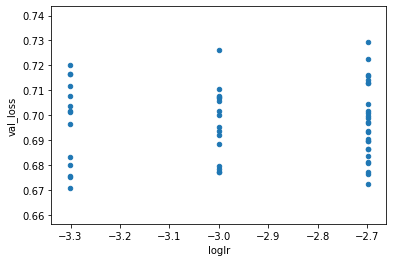

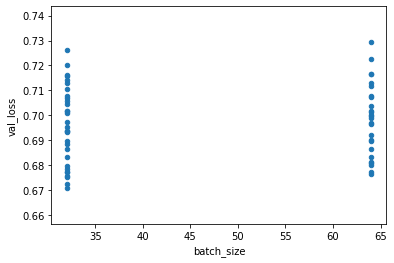

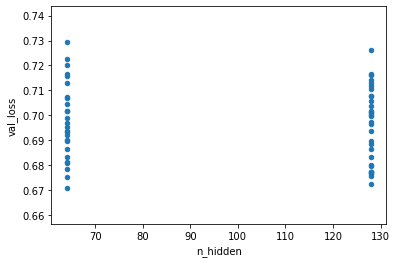

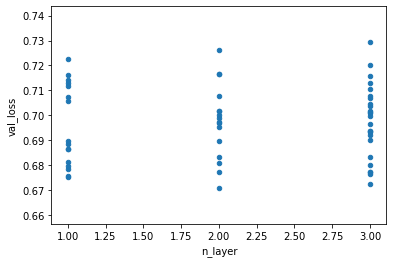

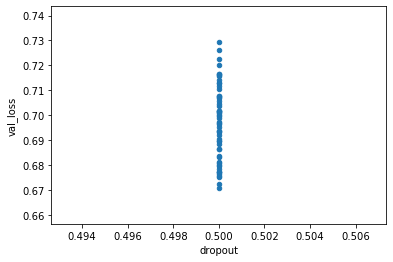

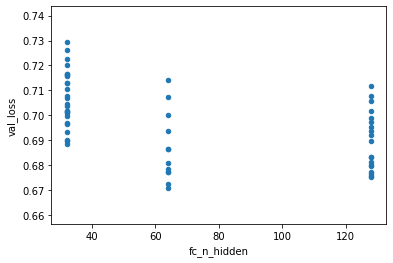

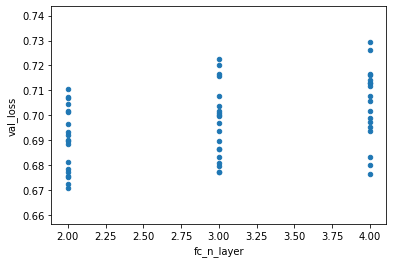

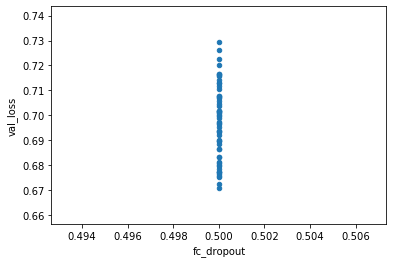

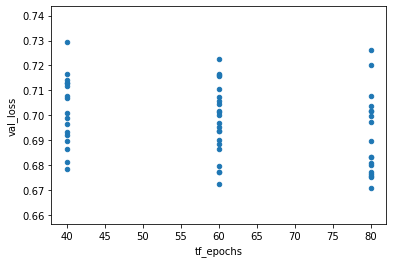

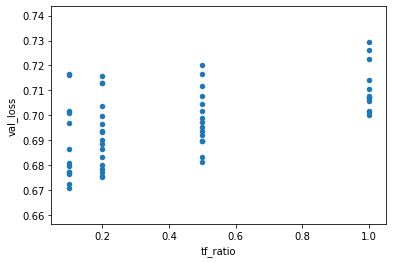

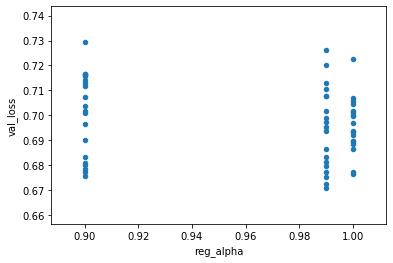

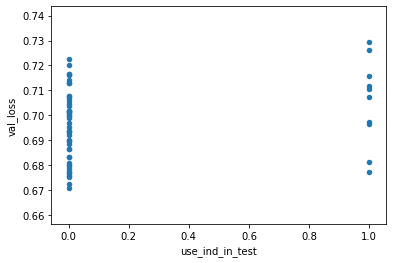

In [29]:
df['loglr'] = np.log10(df['lr'])
for k in ['loglr', 'batch_size', 'n_hidden', 'n_layer', 'dropout', 'fc_n_hidden', 'fc_n_layer', 'fc_dropout', 'tf_epochs', 
          'tf_ratio', 'reg_alpha', 'use_ind_in_test']:
    df.plot.scatter(k, 'val_loss')

In [ ]:
make_perma

## MLP

In [205]:
df = pd.read_csv('results/BC_MIMIC3_MLP_Lightning_results.csv')
# df = df[df.name.apply(lambda x: x.startswith('0813'))]
df = df.sort_values('val_acc', ascending=False)
df.head(10)

name  epoch  \
77  0909_bc_mlp_s107_lr0.002_wd1e-05_bs64_fnh384_fnl4_fdr0.5     143     
85  0909_bc_mlp_s27_lr0.002_wd0.0_bs256_fnh256_fnl3_fdr0.5       250     
69  0909_bc_mlp_s159_lr0.002_wd0.0_bs64_fnh512_fnl4_fdr0.5       114     
75  0909_bc_mlp_s7_lr0.001_wd1e-06_bs256_fnh512_fnl3_fdr0.5      146     
49  0909_bc_mlp_s64_lr0.002_wd1e-06_bs256_fnh256_fnl4_fdr0.3     68      
58  0909_bc_mlp_s30_lr0.001_wd0.0_bs64_fnh256_fnl4_fdr0.3        89      
47  0909_bc_mlp_s54_lr0.001_wd0.0_bs256_fnh384_fnl3_fdr0.3       51      
72  0909_bc_mlp_s145_lr0.002_wd1e-05_bs64_fnh256_fnl4_fdr0.5     130     
53  0909_bc_mlp_s3_lr0.001_wd1e-06_bs64_fnh256_fnl4_fdr0.3       69      
42  0909_bc_mlp_s195_lr0.001_wd0.0001_bs256_fnh384_fnl4_fdr0.15  37      

    global_step  val_loss  val_acc  train_loss  train_acc  test_loss  \
77  13679        0.68517   0.81172  0.57969     0.884620   0.69135     
85  6023         0.68624   0.81169  0.66283     0.813690   0.69249     
69  10924        0.69236   0.81152  2.41090     0.314290   0.69742     
75  3527         0.68796   0.81142  0.67045     0.813440   0.69421     
49  1655         0.68918   0.81142  0.61577     0.835860   0.69409     
58  8549         0.68725   0.81140  0.60281     0.828570   0.69260     
47  1247         0.69266   0.81137  0.67223     0.814340   0.69852     
72  12444        0.68650   0.81137  2.46810     0.266670   0.69247     
53  6649         0.69016   0.81135  4.39820     0.042857   0.69472     
42  911          0.69385   0.81132  0.70771     0.798070   0.70009     

    test_acc                     arch  gpus backend  seed  random_search  \
77  0.80664   BC_MIMIC3_MLP_Lightning  1     None    107   0               
85  0.80647   BC_MIMIC3_MLP_Lightning  1     None    27    0               
69  0.80708   BC_MIMIC3_MLP_Lightning  1     None    159   0               
75  0.80639   BC_MIMIC3_MLP_Lightning  1     None    7     0               
49  0.80660   BC_MIMIC3_MLP_Lightning  1     None    64    0               
58  0.80698   BC_MIMIC3_MLP_Lightning  1     None    30    0               
47  0.80611   BC_MIMIC3_MLP_Lightning  1     None    54    0               
72  0.80692   BC_MIMIC3_MLP_Lightning  1     None    145   0               
53  0.80621   BC_MIMIC3_MLP_Lightning  1     None    3     0               
42  0.80605   BC_MIMIC3_MLP_Lightning  1     None    195   0               

    ignore_prev_runs load_from_hparams  epochs  patience     lr        wd  \
77  0                 None              300     50        0.002  0.000010   
85  0                 None              300     50        0.002  0.000000   
69  0                 None              300     50        0.002  0.000000   
75  0                 None              300     50        0.001  0.000001   
49  0                 None              300     50        0.002  0.000001   
58  0                 None              300     50        0.001  0.000000   
47  0                 None              300     50        0.001  0.000000   
72  0                 None              300     50        0.002  0.000010   
53  0                 None              300     50        0.001  0.000001   
42  0                 None              300     50        0.001  0.000100   

    batch_size  fc_n_hidden  fc_n_layer  fc_dropout  
77  64          384          4           0.50        
85  256         256          3           0.50        
69  64          512          4           0.50        
75  256         512          3           0.50        
49  256         256          4           0.30        
58  64          256          4           0.30        
47  256         384          3           0.30        
72  64          256          4           0.50        
53  64          256          4           0.30        
42  256         384          4           0.15

# OLD

In [11]:
df.groupby(['expert_pol']).apply(lambda x: x.sort_values('val_a', ascending=False).iloc[:5])

name  \
expert_pol                                                                                                                     
eps0.07    223  0718_gammdp_nodegam_eps0.07_s321_lr0.0005_bs512_ud20_dn0.05_dns10_nl1_nt200_ad1_td2_od0.0_ld0.5_cs0.5_an2000   
           206  0718_gammdp_nodegam_eps0.07_s321_lr0.0003_bs512_ud30_dn0.0_dns10_nl1_nt50_ad0_td2_od0.0_ld0.5_cs1.0_an5000     
           209  0718_gammdp_nodegam_eps0.07_s321_lr0.0005_bs512_ud30_dn0.1_dns20_nl2_nt20_ad0_td2_od0.0_ld0.0_cs0.5_an5000     
           205  0718_gammdp_nodegam_eps0.07_s321_lr0.0005_bs512_ud30_dn0.0_dns20_nl1_nt50_ad0_td2_od0.0_ld0.5_cs0.5_an2000     
           201  0718_gammdp_nodegam_eps0.07_s321_lr0.0005_bs512_ud30_dn0.05_dns10_nl2_nt100_ad1_td1_od0.0_ld0.3_cs1.0_an3000   
optimal    160  0717_gammdp_nodegam_s321_lr0.0005_bs512_ud20_dn0.05_dns20_nl1_nt100_ad1_td1_od0.0_ld0.3_cs0.5_an3000           
           128  0717_gammdp_nodegam_s321_lr0.0005_bs512_ud50_dn0.0_dns10_nl2_nt20_ad1_td2_od0.0_ld0.5_cs0.5_an5000             
           129  0717_gammdp_nodegam_s321_lr0.0003_bs512_ud50_dn0.1_dns20_nl3_nt20_ad0_td2_od0.0_ld0.2_cs1.0_an2000             
           145  0717_gammdp_nodegam_s321_lr0.0003_bs512_ud30_dn0.0_dns20_nl1_nt20_ad0_td3_od0.0_ld0.2_cs0.5_an3000             
           143  0717_gammdp_nodegam_s321_lr0.0005_bs512_ud30_dn0.05_dns10_nl1_nt100_ad0_td3_od0.0_ld0.5_cs0.5_an2000           

                epoch  global_step    val_a  val_reward  val_reward_std  \
expert_pol                                                                
eps0.07    223  18     2982         0.92675 -4.2922      0                
           206  49     7849         0.92665 -4.2886      0                
           209  44     7064         0.92665 -4.2886      0                
           205  18     2982         0.92665 -4.2886      0                
           201  40     6436         0.92665 -4.2886      0                
optimal    160  17     2825         0.99550 -4.2886      0                
           128  20     3296         0.99550 -4.2886      0                
           129  8      1412         0.99550 -4.2889      0                
           145  25     4081         0.99550 -4.2886      0                
           143  6      1098         0.99550 -4.2886      0                

                train_loss   test_a  test_reward  test_reward_std  \
expert_pol                                                          
eps0.07    223 -0.205650    0.91733 -4.4161       0.003205          
           206 -0.044197    0.92718 -4.3155       0.004100          
           209  0.720680    0.91805 -4.4164       0.001961          
           205 -0.043436    0.91765 -4.4141       0.003309          
           201 -0.907670    0.90611 -4.4284       0.010660          
optimal    160 -0.125610    0.98427 -4.2822       0.005044          
           128 -0.701580    0.99551 -4.3392       0.008651          
           129  0.005787    0.99537 -4.3085       0.007793          
           145 -0.009679    0.98343 -4.4158       0.008750          
           143 -0.148760    0.99391 -4.3350       0.002192          

                                  arch  epochs  gpus backend  seed  \
expert_pol                                                           
eps0.07    223  AIRL_NODEGAM_Lightning  50      1     None    321    
           206  AIRL_NODEGAM_Lightning  50      1     None    321    
           209  AIRL_NODEGAM_Lightning  50      1     None    321    
           205  AIRL_NODEGAM_Lightning  50      1     None    321    
           201  AIRL_NODEGAM_Lightning  50      1     None    321    
optimal    160  AIRL_NODEGAM_Lightning  50      1     None    321    
           128  AIRL_NODEGAM_Lightning  50      1     None    321    
           129  AIRL_NODEGAM_Lightning  50      1     None    321    
           145  AIRL_NODEGAM_Lightning  50      1     None    321    
           143  AIRL_NODEGAM_Lightning  50      1     None    321    

            

Since this document has wrong columns, re-parse the value from their name

In [48]:
def parse(name_col, prefix):
    def tmp(x):
        try:
            return [float(k[len(prefix):]) for k in x.split('_') if k.startswith(prefix)][0]
        except:
            return [(k[len(prefix):]) for k in x.split('_') if k.startswith(prefix)][0]
        
    return name_col.apply(tmp)

In [41]:
for k in ['lr', 'ud', 'dn', 'dns', 'nl', 'nt', 'ad', 'd', 'dropout', 'ld', 'cs', 'an', 'bs']:
    df[k] = parse(df.name, k)

In [44]:
def tmp(x):
    tmp = x.split('_')[2]
    if tmp.startswith('eps'):
        return tmp
    return 'optimal'

df['expert_pol'] = df.name.apply(tmp)

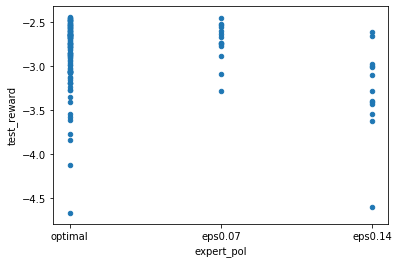

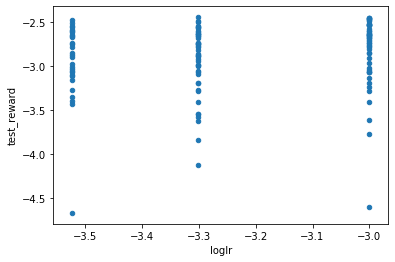

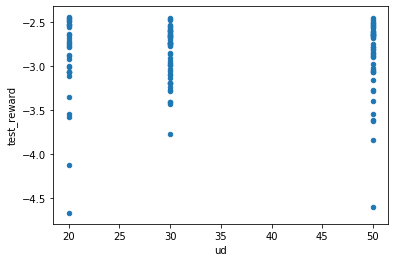

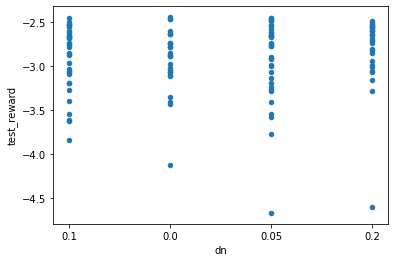

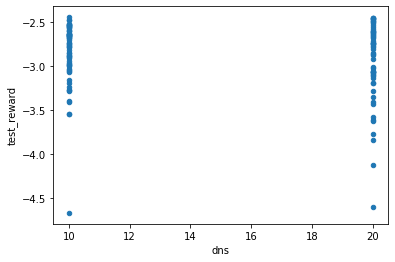

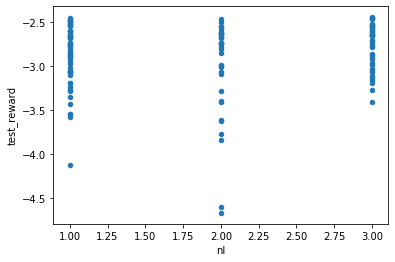

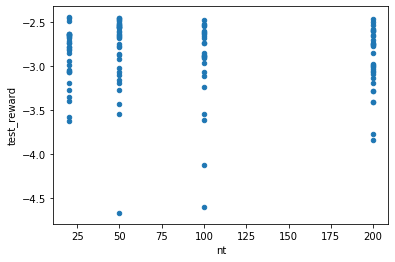

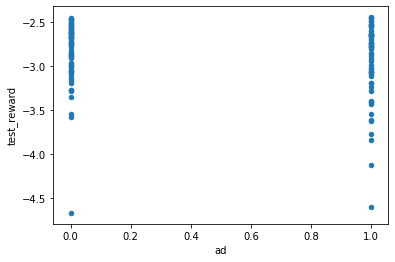

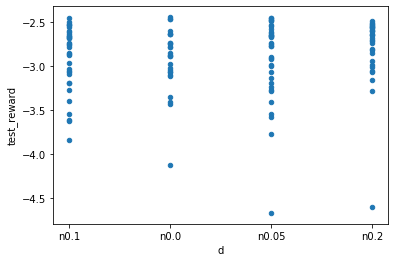

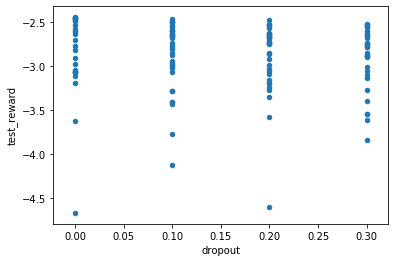

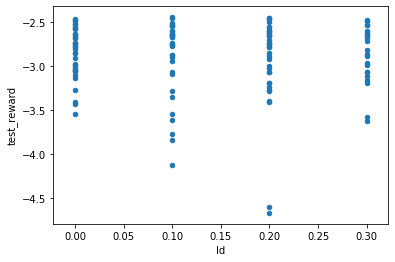

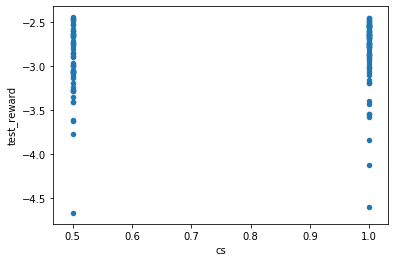

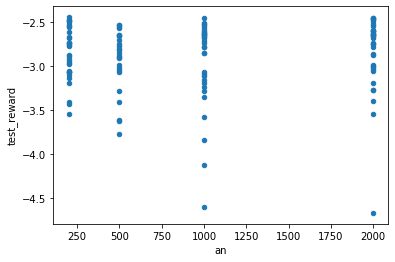

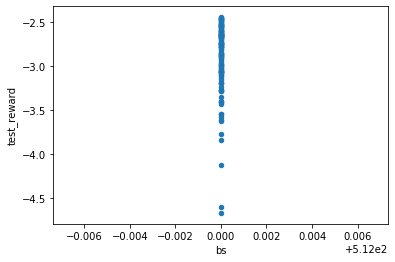

In [46]:
df['loglr'] = np.log10(df['lr'])
for k in ['expert_pol', 'loglr', 'ud', 'dn', 'dns', 'nl', 'nt', 'ad', 'd', 'dropout', 'ld', 'cs', 'an', 'bs']:
    df.plot.scatter(k, 'test_reward')

In [12]:
df = pd.read_csv('./results/AIRLLightning_results.csv')
df = df[df.name.apply(lambda x: x.startswith('0717'))]
df = df.sort_values('val_a', ascending=False)
df

name  epoch  \
58  0717_lmdp_linear_s321_lr0.0005_bs512_ud50_dn0.2_dns20     46      
65  0717_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.1_dns10      47      
67  0717_lmdp_linear_s321_lr0.0003_bs512_ud30_dn0.2_dns20     34      
55  0717_lmdp_linear_s321_lr0.001_bs512_ud50_dn0.2_dns20      49      
68  0717_lmdp_linear_s321_lr0.0005_bs512_ud30_dn0.05_dns20    22      
60  0717_lmdp_linear_s321_lr0.0003_bs512_ud50_dn0.2_dns10     43      
62  0717_lmdp_linear_s321_lr0.0003_bs512_ud30_dn0.0_dns10     16      
64  0717_lmdp_linear_s321_lr0.001_bs512_ud30_dn0.05_dns20     41      
74  0717_lmdp_linear_s321_lr0.001_bs512_ud20_dn0.0_dns20      11      
73  0717_lmdp_linear_s321_lr0.001_bs512_ud20_dn0.1_dns20      20      
66  0717_lmdp_linear_s321_lr0.0003_bs512_ud30_dn0.05_dns10    36      
78  0717_lmdp_linear_s321_lr0.0003_bs512_ud20_dn0.1_dns10     22      
76  0717_lmdp_linear_s321_lr0.0005_bs512_ud20_dn0.05_dns20    19      
71  0717_lmdp_linear_s321_lr0.0003_bs512_ud20_dn0.2_dns20     43      
59  0717_lmdp_linear_s321_lr0.0005_bs512_ud50_dn0.05_dns20    10      
79  0717_lmdp_linear_s321_lr0.001_bs512_ud20_dn0.0_dns10      13      
69  0717_lmdp_linear_s321_lr0.0003_bs512_ud20_dn0.05_dns10    27      
72  0717_lmdp_linear_s321_lr0.0003_bs512_ud20_dn0.2_dns10     19      
61  0717_gammdp_linear_s321_lr0.0003_bs512_ud50_dn0.0_dns20   13      
84  0717_gammdp_linear_s321_lr0.0005_bs512_ud30_dn0.1_dns20   8       
77  0717_gammdp_linear_s321_lr0.0003_bs512_ud20_dn0.0_dns10   14      
85  0717_gammdp_linear_s321_lr0.0003_bs512_ud20_dn0.05_dns10  11      
86  0717_gammdp_linear_s321_lr0.0005_bs512_ud30_dn0.2_dns20   8       
80  0717_gammdp_linear_s321_lr0.0005_bs512_ud20_dn0.1_dns20   9       
70  0717_gammdp_linear_s321_lr0.001_bs512_ud20_dn0.1_dns20    5       
83  0717_gammdp_linear_s321_lr0.0003_bs512_ud50_dn0.0_dns10   14      
88  0717_gammdp_linear_s321_lr0.0005_bs512_ud20_dn0.2_dns20   5       
89  0717_gammdp_linear_s321_lr0.001_bs512_ud20_dn0.1_dns10    3       
87  0717_gammdp_linear_s321_lr0.0005_bs512_ud20_dn0.0_dns20   10      
81  0717_gammdp_linear_s321_lr0.0005_bs512_ud50_dn0.05_dns20  13      
75  0717_gammdp_linear_s321_lr0.001_bs512_ud20_dn0.0_dns20    3       
82  0717_gammdp_linear_s321_lr0.0005_bs512_ud50_dn0.05_dns10  10      
63  0717_gammdp_linear_s321_lr0.001_bs512_ud30_dn0.1_dns10    3       
57  0717_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.0_dns10    5       
56  0717_gammdp_linear_s321_lr0.001_bs512_ud50_dn0.0_dns20    4       

    global_step    val_a  val_reward  val_reward_std  train_loss   test_a  \
58  7378         0.85185 -2.7635      0               0.000188    0.36245   
65  7535         0.81285 -2.8384      0              -0.003890    0.70073   
67  5494         0.80105 -2.7686      0              -0.013615    0.46526   
55  7849         0.80010 -2.7467      0               0.024012    0.78900   
68  3610         0.77645 -2.7601      0               0.000065    0.58223   
60  6907         0.76085 -2.7294      0               0.013287    0.68745   
62  2668         0.75445 -2.8169      0               0.011432    0.36577   
64  6593         0.75065 -2.7367      0              -0.029381    0.58318   
74  1883         0.74635 -2.7638      0              -0.000521    0.58130   
73  3296         0.74570 -2.7591      0               0.027924    0.71487   
66  5808         0.74480 -2.6652      0               0.015048    0.43316   
78  3610         0.74420 -2.8155      0              -0.000590    0.47667   
76  3139         0.74375 -2.7709      0               0.027807    0.47531   
71  6907         0.74230 -2.7312      0              -0.011012    0.73408   
59  1726         0.74220 -2.7245      0               0.015179    0.31520   
79  2197         0.74210 -2.8206      0               0.013764    0.42698   
69  4395         0.74200 -2.7981      0               0.016592    0.47348   
72  3139         0.74185 -2.7936      0               0.025036    0.58149   
61  2197         0.53530 -4.4200    

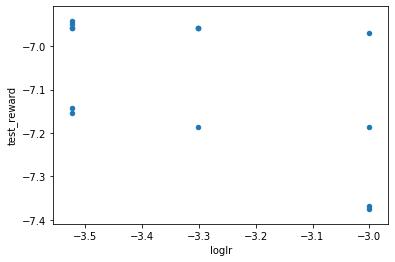

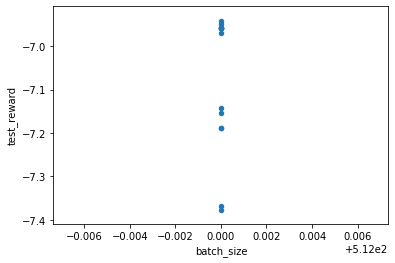

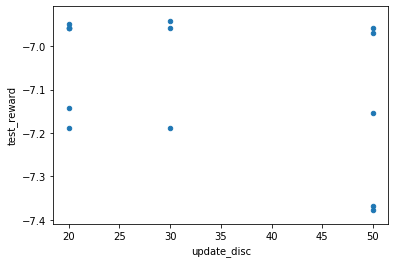

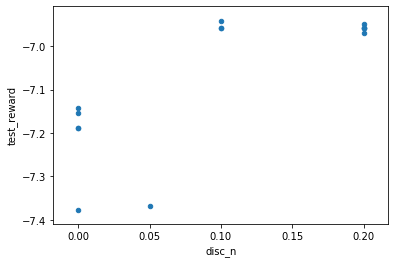

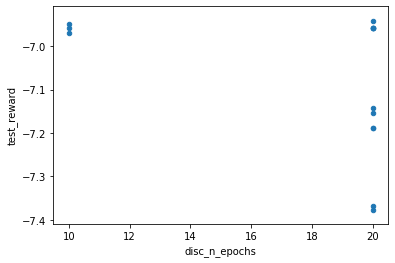

In [6]:
df['loglr'] = np.log10(df['lr'])
df.plot.scatter('loglr', 'test_reward')
df.plot.scatter('batch_size', 'test_reward')
df.plot.scatter('update_disc', 'test_reward')
df.plot.scatter('disc_n', 'test_reward')
df.plot.scatter('disc_n_epochs', 'test_reward')

## MMA

In [4]:
from IPython.display import HTML

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = -1

def show_link(df, download_link=False):
    if download_link:
        df.name.apply(lambda x: None if pexists(f'./loss_figs/{x}.jpg') else os.system(f'rsync -avzL v:/h/kingsley/node/loss_figs/{x}.jpg ./loss_figs/'))

    return HTML(df.to_html(
        render_links=True,
        escape=False,
    ))

/h/kingsley/anaconda3/envs/cu101/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [4]:
df = pd.read_csv('./results/mma_new1.csv')
df['name'] = df['name'].astype(str)
identifier = 'mma_0703_{mdp}'

df['a_fig'] = df.apply(lambda r: f'<a href="/view/irl_nodegam/results/figures/{r["name"]}/a_match.jpg">link</a>', axis=1)
df['r_fig'] = df.apply(lambda r: f'<a href="/view/irl_nodegam/results/figures/{r["name"]}/r.jpg">link</a>', axis=1)
df['ba_fig'] = df.apply(lambda r: f'<a href="/view/irl_nodegam/results/figures/{r["name"]}/best_a_match.jpg">link</a>', axis=1)
df['br_fig'] = df.apply(lambda r: f'<a href="/view/irl_nodegam/results/figures/{r["name"]}/best_r.jpg">link</a>', axis=1)
show_link(df)

FileNotFoundError: [Errno 2] No such file or directory: './results/mma_new1.csv'